In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.models import Sequential

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Visualization

In [2]:
train_dir = '../data/train_set/'
val_dir = '../data/val_set/'

In [6]:
train_df = pd.read_csv('../data/train_labels.csv', dtype=str)
# train_df['path'] = train_df['img_name'].map(lambda x : os.path.join(train_dir, x))
val_df = pd.read_csv('../data/val_labels.csv', dtype=str)
# val_df['path'] = val_df['img_name'].map(lambda x : os.path.join(val_dir, x))

In [7]:
train_df.head()

img_name label
0  train_101733.jpg   211
1  train_101734.jpg   211
2  train_101735.jpg   211
3  train_101736.jpg   211
4  train_101737.jpg   211

In [8]:
val_df.head()

img_name label
0  val_010323.jpg   247
1  val_010324.jpg   234
2  val_010325.jpg   222
3  val_010326.jpg   240
4  val_010327.jpg   218

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
batch_size = 32
size = (256, 256)

In [14]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                   directory=train_dir,
                                                   x_col='img_name',
                                                   y_col='label',
                                                   shuffle=True,
                                                   batch_size=batch_size,
                                                   target_size=size,
                                                   class_mode='input',
                                                   )
val_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                   directory=val_dir,
                                                   x_col='img_name',
                                                   y_col='label',
                                                   shuffle=False,
                                                   batch_size=batch_size,
                                                   target_size=size,
                                                   class_mode='input',
                                                   )

C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:273: UserWarning: Found 245 invalid image filename(s) in x_col="img_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 118230 validated image filenames.
Found 11994 validated image filenames.


In [35]:
len(train_generator)

3695

In [22]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=))

## Machine Learning Models

In [25]:
def loaddata(traindir, valdir):
    def load(d):
        datasets = []
        for fn in os.listdir(d):
            fp = os.path.join(d, fn)
            if os.path.isfile(fp):
                datasets.append(fp)
        return datasets
    return load(traindir), load(valdir)

In [26]:
train_data, val_data = loaddata('../data/train_set', '../data/val_set')

In [12]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def show_img(img, ax=None, title=None):
    if ax is not None:
        ax.imshow(img)
        ax.axis('off')
        if title is not None:
            ax.set_title(title)
    else:
        plt.title(title)
        plt.imshow(img)
        plt.axis('off')

def show_img_by_path(imgpath, **argkw):
    show_img(Image.open(imgpath),**argkw)

def show_imgsets(imgsets, shape=(2, 5), **argkw):
    if not isinstance(imgsets, list):
        return

    rows, cols = shape
    size = rows * cols
    imgsets = np.array(imgsets[:size]).reshape(shape)

    fig, axs = plt.subplots(rows, cols, **argkw)

    for row in range(rows):
        for col in range(cols):
            show_img_by_path(imgsets[row, col], ax=axs[row, col])

def randsample(imgsets, shape=(2, 5), **argkw):
    imgsets = random.choices(imgsets, k=shape[0]*shape[1])

    show_imgsets(imgsets, shape=shape, **argkw)

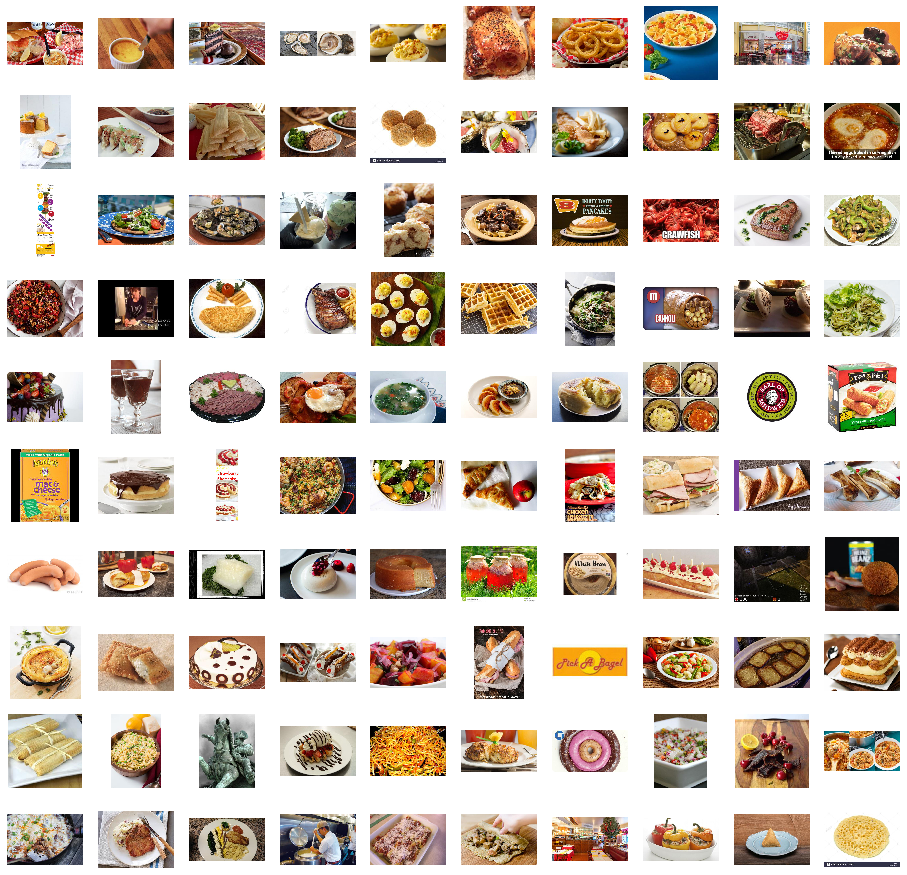

In [13]:
randsample(train_data, shape=(10, 10), figsize=(16, 16))

In [14]:
train_df.shape, val_df.shape

((118475, 3), (11994, 3))

## Preprocessing

In [74]:
train_dir = '../data/train_set/'
val_dir = '../data/val_set/'

In [75]:
train_df = pd.read_csv('../data/train_labels.csv')
train_df['path'] = train_df['img_name'].map(lambda x : os.path.join(train_dir, x))
val_df = pd.read_csv('../data/val_labels.csv')
val_df['path'] = val_df['img_name'].map(lambda x : os.path.join(val_dir, x))

In [76]:
train_df

img_name  label                                path
0       train_101733.jpg    211  ../data/train_set/train_101733.jpg
1       train_101734.jpg    211  ../data/train_set/train_101734.jpg
2       train_101735.jpg    211  ../data/train_set/train_101735.jpg
3       train_101736.jpg    211  ../data/train_set/train_101736.jpg
4       train_101737.jpg    211  ../data/train_set/train_101737.jpg
...                  ...    ...                                 ...
118470  train_101728.jpg    123  ../data/train_set/train_101728.jpg
118471  train_101729.jpg    123  ../data/train_set/train_101729.jpg
118472  train_101730.jpg    123  ../data/train_set/train_101730.jpg
118473  train_101731.jpg    123  ../data/train_set/train_101731.jpg
118474  train_101732.jpg    123  ../data/train_set/train_101732.jpg

[118475 rows x 3 columns]

In [77]:
train_df.set_index('label', drop=True, inplace=True)

In [78]:
train_df.sort_index(ascending=True, inplace=True)

In [79]:
train_df

img_name                                path
label                                                      
0      train_059962.jpg  ../data/train_set/train_059962.jpg
0      train_059542.jpg  ../data/train_set/train_059542.jpg
0      train_059541.jpg  ../data/train_set/train_059541.jpg
0      train_059540.jpg  ../data/train_set/train_059540.jpg
0      train_059539.jpg  ../data/train_set/train_059539.jpg
...                 ...                                 ...
250    train_119903.jpg  ../data/train_set/train_119903.jpg
250    train_119902.jpg  ../data/train_set/train_119902.jpg
250    train_119901.jpg  ../data/train_set/train_119901.jpg
250    train_119899.jpg  ../data/train_set/train_119899.jpg
250    train_119870.jpg  ../data/train_set/train_119870.jpg

[118475 rows x 2 columns]

In [87]:
for i in range(251):
    fromimage = train_df.loc[i]['img_name'].values
    for img in fromimage:
        dis = os.path.join(f'../data/train_{i}')
        f_src = os.path.join(train_dir, img)

In [94]:
import shutil
import traceback
for i in range(251):
    fromimage = train_df.loc[i]['img_name'].values
    for img in fromimage:
        print(img)
        try:
            dis = os.path.join(f'../data/train_{i}')
            f_src = os.path.join(train_dir, img)
            if not os.path.exists(dis):
                os.mkdir(dis)
            f_dis = os.path.join(dis, img)
            shutil.move(f_src, f_dis)
        except Exception as e:
            print('move_file ERROR')
            traceback.print_exc()

train_059962.jpg
move_file ERROR
train_059542.jpg
move_file ERROR
train_059541.jpg
move_file ERROR
train_059540.jpg
move_file ERROR
train_059539.jpg
move_file ERROR
train_059538.jpg
move_file ERROR
train_059537.jpg
move_file ERROR
train_059536.jpg
move_file ERROR
train_059535.jpg
move_file ERROR
train_059534.jpg
move_file ERROR
train_059533.jpg
move_file ERROR
train_059532.jpg
move_file ERROR
train_059531.jpg
move_file ERROR
train_059530.jpg
move_file ERROR
train_059529.jpg
move_file ERROR
train_059528.jpg
move_file ERROR
train_059544.jpg
move_file ERROR
train_059545.jpg
move_file ERROR
train_059546.jpg
move_file ERROR
train_059547.jpg
move_file ERROR
train_059563.jpg
move_file ERROR
train_059562.jpg
move_file ERROR
train_059561.jpg
move_file ERROR
train_059560.jpg
move_file ERROR
train_059559.jpg
move_file ERROR
train_059558.jpg
move_file ERROR
train_059557.jpg
move_file ERROR
train_059527.jpg
move_file ERROR
train_059556.jpg
move_file ERROR
train_059554.jpg
move_file ERROR
train_0595

Traceback (most recent call last):
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_059962.jpg' -> '../data/train_0\\train_059962.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_059962.jpg'
Traceback (most recent call la

move_file ERROR
train_059622.jpg
move_file ERROR
train_059621.jpg
move_file ERROR
train_059620.jpg
move_file ERROR
train_059619.jpg
move_file ERROR
train_059618.jpg
move_file ERROR
train_059617.jpg
move_file ERROR
train_059616.jpg
move_file ERROR
train_059615.jpg
move_file ERROR
train_059614.jpg
move_file ERROR
train_059613.jpg
move_file ERROR
train_059612.jpg
move_file ERROR
train_059611.jpg
move_file ERROR
train_059610.jpg
move_file ERROR
train_059609.jpg
move_file ERROR
train_059608.jpg
move_file ERROR
train_059623.jpg
move_file ERROR
train_059624.jpg
move_file ERROR
train_059625.jpg
move_file ERROR
train_059626.jpg
move_file ERROR
train_059642.jpg
move_file ERROR
train_059641.jpg
move_file ERROR
train_059640.jpg
move_file ERROR
train_059639.jpg
move_file ERROR
train_059638.jpg
move_file ERROR
train_059637.jpg
move_file ERROR
train_059636.jpg
move_file ERROR
train_059607.jpg
move_file ERROR
train_059635.jpg
move_file ERROR
train_059633.jpg
move_file ERROR
train_059632.jpg
move_file 

Traceback (most recent call last):
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_059567.jpg' -> '../data/train_0\\train_059567.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_059567.jpg'
Traceback (most recent call la

train_059595.jpg
move_file ERROR
train_059486.jpg
move_file ERROR
train_059485.jpg
move_file ERROR
train_059484.jpg
move_file ERROR
train_059397.jpg
move_file ERROR
train_059398.jpg
move_file ERROR
train_059399.jpg
move_file ERROR
train_059400.jpg
move_file ERROR
train_059401.jpg
move_file ERROR
train_059402.jpg
move_file ERROR
train_059403.jpg
move_file ERROR
train_059404.jpg
move_file ERROR
train_059405.jpg
move_file ERROR
train_059406.jpg
move_file ERROR
train_059407.jpg
move_file ERROR
train_059408.jpg
move_file ERROR
train_059409.jpg
move_file ERROR
train_059410.jpg
move_file ERROR
train_059411.jpg
move_file ERROR
train_059396.jpg
move_file ERROR
train_059395.jpg
move_file ERROR
train_059394.jpg
move_file ERROR
train_059393.jpg
move_file ERROR
train_059330.jpg
move_file ERROR
train_059329.jpg
move_file ERROR
train_059379.jpg
move_file ERROR
train_059380.jpg
move_file ERROR
train_059381.jpg
move_file ERROR
train_059382.jpg
move_file ERROR
train_059383.jpg
move_file ERROR
train_0594

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_059588.jpg'
Traceback (most recent call last):
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_059595.jpg' -> '../data/train_0\\train_059595.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call la

  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_059462.jpg' -> '../data/train_0\\train_059462.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_059462.jpg'
Traceback (most recent call last):
  File "C:\Users\Darren\Anacon

train_059461.jpg
move_file ERROR
train_059460.jpg
move_file ERROR
train_059459.jpg
move_file ERROR
train_059457.jpg
move_file ERROR
train_059456.jpg
move_file ERROR
train_059464.jpg
move_file ERROR
train_059455.jpg
move_file ERROR
train_059453.jpg
move_file ERROR
train_059452.jpg
move_file ERROR
train_059961.jpg
move_file ERROR
train_059378.jpg
move_file ERROR
train_059377.jpg
move_file ERROR
train_059376.jpg
move_file ERROR
train_059375.jpg
move_file ERROR
train_059454.jpg
move_file ERROR
train_059374.jpg
move_file ERROR
train_059465.jpg
move_file ERROR
train_059467.jpg
move_file ERROR
train_059483.jpg
move_file ERROR
train_059482.jpg
move_file ERROR
train_059481.jpg
move_file ERROR
train_059480.jpg
move_file ERROR
train_059479.jpg
move_file ERROR
train_059478.jpg
move_file ERROR
train_059477.jpg
move_file ERROR
train_059466.jpg
move_file ERROR
train_059476.jpg
move_file ERROR
train_059474.jpg
move_file ERROR
train_059473.jpg
move_file ERROR
train_059472.jpg
move_file ERROR
train_0594

FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_059646.jpg' -> '../data/train_0\\train_059646.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_059646.jpg'
Traceback (most recent call last):
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2

train_059860.jpg
move_file ERROR
train_059859.jpg
move_file ERROR
train_059858.jpg
move_file ERROR
train_059857.jpg
move_file ERROR
train_059856.jpg
move_file ERROR
train_059855.jpg
move_file ERROR
train_059854.jpg
move_file ERROR
train_059853.jpg
move_file ERROR
train_059852.jpg
move_file ERROR
train_059851.jpg
move_file ERROR
train_059850.jpg
move_file ERROR
train_059849.jpg
move_file ERROR
train_059848.jpg
move_file ERROR
train_059847.jpg
move_file ERROR
train_059846.jpg
move_file ERROR
train_059861.jpg
move_file ERROR
train_059862.jpg
move_file ERROR
train_059863.jpg
move_file ERROR
train_059864.jpg
move_file ERROR
train_059880.jpg
move_file ERROR
train_059879.jpg
move_file ERROR
train_059878.jpg
move_file ERROR
train_059877.jpg
move_file ERROR
train_059876.jpg
move_file ERROR
train_059875.jpg
move_file ERROR
train_059874.jpg
move_file ERROR
train_059845.jpg
move_file ERROR
train_059873.jpg
move_file ERROR
train_059871.jpg
move_file ERROR
train_059870.jpg
move_file ERROR
train_0598

Traceback (most recent call last):
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_059936.jpg' -> '../data/train_0\\train_059936.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_059936.jpg'
Traceback (most recent call la

train_059935.jpg
move_file ERROR
train_059934.jpg
move_file ERROR
train_059941.jpg
move_file ERROR
train_059933.jpg
move_file ERROR
train_059931.jpg
move_file ERROR
train_059930.jpg
move_file ERROR
train_059929.jpg
move_file ERROR
train_059928.jpg
move_file ERROR
train_059927.jpg
move_file ERROR
train_059926.jpg
move_file ERROR
train_059925.jpg
move_file ERROR
train_059932.jpg
move_file ERROR
train_059924.jpg
move_file ERROR
train_059942.jpg
move_file ERROR
train_059944.jpg
move_file ERROR
train_059960.jpg
move_file ERROR
train_059959.jpg
move_file ERROR
train_059958.jpg
move_file ERROR
train_059957.jpg
move_file ERROR
train_059956.jpg
move_file ERROR
train_059955.jpg
move_file ERROR
train_059954.jpg
move_file ERROR
train_059943.jpg
move_file ERROR
train_059953.jpg
move_file ERROR
train_059951.jpg
move_file ERROR
train_059950.jpg
move_file ERROR
train_059949.jpg
move_file ERROR
train_059948.jpg
move_file ERROR
train_059947.jpg
move_file ERROR
train_059946.jpg
move_file ERROR
train_0599

Traceback (most recent call last):
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_059702.jpg' -> '../data/train_0\\train_059702.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_059702.jpg'
Traceback (most recent call la

move_file ERROR
train_059701.jpg
move_file ERROR
train_059700.jpg
move_file ERROR
train_059699.jpg
move_file ERROR
train_059698.jpg
move_file ERROR
train_059697.jpg
move_file ERROR
train_059696.jpg
move_file ERROR
train_059703.jpg
move_file ERROR
train_059695.jpg
move_file ERROR
train_059693.jpg
move_file ERROR
train_059692.jpg
move_file ERROR
train_059691.jpg
move_file ERROR
train_059690.jpg
move_file ERROR
train_059689.jpg
move_file ERROR
train_059688.jpg
move_file ERROR
train_059687.jpg
move_file ERROR
train_059694.jpg
move_file ERROR
train_059686.jpg
move_file ERROR
train_059704.jpg
move_file ERROR
train_059706.jpg
move_file ERROR
train_059722.jpg
move_file ERROR
train_059721.jpg
move_file ERROR
train_059720.jpg
move_file ERROR
train_059719.jpg
move_file ERROR
train_059718.jpg
move_file ERROR
train_059717.jpg
move_file ERROR
train_059716.jpg
move_file ERROR
train_059705.jpg
move_file ERROR
train_059715.jpg
move_file ERROR
train_059713.jpg
move_file ERROR
train_059712.jpg
move_file 

  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_059724.jpg' -> '../data/train_0\\train_059724.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_059724.jpg'
Traceback (most recent call last):
  File "C:\Users\Darren\Anacon

train_059675.jpg
move_file ERROR
train_059726.jpg
move_file ERROR
train_059781.jpg
move_file ERROR
train_059780.jpg
move_file ERROR
train_059779.jpg
move_file ERROR
train_059778.jpg
move_file ERROR
train_059777.jpg
move_file ERROR
train_059776.jpg
move_file ERROR
train_059775.jpg
move_file ERROR
train_059782.jpg
move_file ERROR
train_059774.jpg
move_file ERROR
train_059772.jpg
move_file ERROR
train_059771.jpg
move_file ERROR
train_059770.jpg
move_file ERROR
train_059769.jpg
move_file ERROR
train_059768.jpg
move_file ERROR
train_059767.jpg
move_file ERROR
train_059766.jpg
move_file ERROR
train_059773.jpg
move_file ERROR
train_059765.jpg
move_file ERROR
train_059783.jpg
move_file ERROR
train_059785.jpg
move_file ERROR
train_059801.jpg
move_file ERROR
train_059725.jpg
move_file ERROR
train_059800.jpg
move_file ERROR
train_059799.jpg
move_file ERROR
train_059798.jpg
move_file ERROR
train_059797.jpg
move_file ERROR
train_059796.jpg
move_file ERROR
train_059784.jpg
move_file ERROR
train_0597

Traceback (most recent call last):
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_059749.jpg' -> '../data/train_0\\train_059749.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_059749.jpg'
Traceback (most recent call la


train_089879.jpg
train_089878.jpg
train_089877.jpg
train_089876.jpg
train_089875.jpg
train_089874.jpg
train_089873.jpg
train_089872.jpg
train_089858.jpg
train_089871.jpg
train_089869.jpg
train_089868.jpg
train_089867.jpg
train_089866.jpg
train_089865.jpg
train_089864.jpg
train_089863.jpg
train_089862.jpg
train_089861.jpg
train_089860.jpg
train_089870.jpg
train_089779.jpg
train_089831.jpg
train_089829.jpg
train_089802.jpg
train_089801.jpg
train_089800.jpg
train_089799.jpg
train_089798.jpg
train_089797.jpg
train_089796.jpg
train_089795.jpg
train_089794.jpg
train_089793.jpg
train_089803.jpg
train_089792.jpg
train_089790.jpg
train_089789.jpg
train_089788.jpg
train_089787.jpg
train_089786.jpg
train_089785.jpg
train_089784.jpg
train_089783.jpg
train_089782.jpg
train_089781.jpg
train_089791.jpg
train_089830.jpg
train_089804.jpg
train_089806.jpg
train_089828.jpg
train_089827.jpg
train_089826.jpg
train_089825.jpg
train_089824.jpg
train_089823.jpg
train_089822.jpg
train_089821.jpg
train_089820.

train_062693.jpg
train_062692.jpg
train_062691.jpg
train_062690.jpg
train_062689.jpg
train_062688.jpg
train_062701.jpg
train_062687.jpg
train_062685.jpg
train_062684.jpg
train_062683.jpg
train_062682.jpg
train_062681.jpg
train_062680.jpg
train_062679.jpg
train_062678.jpg
train_062677.jpg
train_062676.jpg
train_062675.jpg
train_062674.jpg
train_062673.jpg
train_062686.jpg
train_062702.jpg
train_062703.jpg
train_062704.jpg
train_062733.jpg
train_062732.jpg
train_062731.jpg
train_062730.jpg
train_062729.jpg
train_062728.jpg
train_062727.jpg
train_062726.jpg
train_062725.jpg
train_062724.jpg
train_062723.jpg
train_062722.jpg
train_062721.jpg
train_062720.jpg
train_062719.jpg
train_062718.jpg
train_062717.jpg
train_062716.jpg
train_062715.jpg
train_062714.jpg
train_062713.jpg
train_062712.jpg
train_062711.jpg
train_062710.jpg
train_062709.jpg
train_062708.jpg
train_062707.jpg
train_062706.jpg
train_062705.jpg
train_062735.jpg
train_062542.jpg
train_062432.jpg
train_062540.jpg
train_062421.j

train_067538.jpg
train_067522.jpg
train_067523.jpg
train_067524.jpg
train_067525.jpg
train_067526.jpg
train_067527.jpg
train_067528.jpg
train_067520.jpg
train_067529.jpg
train_067531.jpg
train_067532.jpg
train_067533.jpg
train_067534.jpg
train_067535.jpg
train_067536.jpg
train_067537.jpg
train_067530.jpg
train_067480.jpg
train_067479.jpg
train_067478.jpg
train_067422.jpg
train_067423.jpg
train_067424.jpg
train_067425.jpg
train_067426.jpg
train_067427.jpg
train_067428.jpg
train_067429.jpg
train_067430.jpg
train_067431.jpg
train_067432.jpg
train_067433.jpg
train_067434.jpg
train_067435.jpg
train_067436.jpg
train_067421.jpg
train_067420.jpg
train_067419.jpg
train_067418.jpg
train_067266.jpg
train_067403.jpg
train_067404.jpg
train_067405.jpg
train_067406.jpg
train_067407.jpg
train_067408.jpg
train_067437.jpg
train_067409.jpg
train_067411.jpg
train_067412.jpg
train_067413.jpg
train_067414.jpg
train_067415.jpg
train_067416.jpg
train_067417.jpg
train_067410.jpg
train_067438.jpg
train_067439.j

train_040026.jpg
train_040025.jpg
train_040024.jpg
train_040023.jpg
train_040105.jpg
train_040106.jpg
train_040107.jpg
train_040108.jpg
train_040190.jpg
train_040189.jpg
train_040188.jpg
train_040187.jpg
train_040186.jpg
train_040185.jpg
train_040184.jpg
train_040183.jpg
train_040182.jpg
train_040181.jpg
train_040180.jpg
train_040191.jpg
train_040179.jpg
train_040177.jpg
train_040176.jpg
train_040175.jpg
train_040174.jpg
train_040173.jpg
train_040172.jpg
train_040171.jpg
train_040170.jpg
train_040169.jpg
train_040168.jpg
train_040167.jpg
train_040178.jpg
train_040192.jpg
train_040193.jpg
train_040194.jpg
train_040219.jpg
train_040218.jpg
train_040217.jpg
train_040216.jpg
train_040215.jpg
train_040214.jpg
train_040213.jpg
train_040212.jpg
train_040211.jpg
train_040210.jpg
train_040209.jpg
train_040208.jpg
train_040207.jpg
train_040206.jpg
train_040205.jpg
train_040204.jpg
train_040203.jpg
train_040202.jpg
train_040201.jpg
train_040200.jpg
train_040199.jpg
train_040198.jpg
train_040197.j

train_069384.jpg
train_069385.jpg
train_069386.jpg
train_069387.jpg
train_069388.jpg
train_069375.jpg
train_069389.jpg
train_069391.jpg
train_069392.jpg
train_069393.jpg
train_069394.jpg
train_069395.jpg
train_069396.jpg
train_069397.jpg
train_069398.jpg
train_069399.jpg
train_069400.jpg
train_069401.jpg
train_069402.jpg
train_069403.jpg
train_069390.jpg
train_069404.jpg
train_069374.jpg
train_069372.jpg
train_069345.jpg
train_069242.jpg
train_069346.jpg
train_069347.jpg
train_069348.jpg
train_069349.jpg
train_069350.jpg
train_069351.jpg
train_069352.jpg
train_069353.jpg
train_069354.jpg
train_069355.jpg
train_069356.jpg
train_069373.jpg
train_069357.jpg
train_069359.jpg
train_069360.jpg
train_069361.jpg
train_069362.jpg
train_069363.jpg
train_069364.jpg
train_069365.jpg
train_069366.jpg
train_069367.jpg
train_069368.jpg
train_069369.jpg
train_069370.jpg
train_069371.jpg
train_069358.jpg
train_069405.jpg
train_069406.jpg
train_069344.jpg
train_069308.jpg
train_069307.jpg
train_069306.j

train_024288.jpg
train_024289.jpg
train_024290.jpg
train_024291.jpg
train_024292.jpg
train_024293.jpg
train_024294.jpg
train_024295.jpg
train_024296.jpg
train_024297.jpg
train_024298.jpg
train_024299.jpg
train_024300.jpg
train_024275.jpg
train_024274.jpg
train_024273.jpg
train_024272.jpg
train_024246.jpg
train_024247.jpg
train_024248.jpg
train_024249.jpg
train_024250.jpg
train_024251.jpg
train_024252.jpg
train_024253.jpg
train_024254.jpg
train_024255.jpg
train_024256.jpg
train_024257.jpg
train_024301.jpg
train_024258.jpg
train_024260.jpg
train_024261.jpg
train_024262.jpg
train_024263.jpg
train_024264.jpg
train_024265.jpg
train_024266.jpg
train_024267.jpg
train_024268.jpg
train_024269.jpg
train_024270.jpg
train_024271.jpg
train_024259.jpg
train_024361.jpg
train_024302.jpg
train_024304.jpg
train_024335.jpg
train_024336.jpg
train_024337.jpg
train_024338.jpg
train_024339.jpg
train_024340.jpg
train_024341.jpg
train_024342.jpg
train_024343.jpg
train_024478.jpg
train_024345.jpg
train_024346.j

train_085401.jpg
train_085400.jpg
train_085399.jpg
train_085405.jpg
train_085414.jpg
train_085379.jpg
train_085377.jpg
train_085358.jpg
train_085357.jpg
train_085355.jpg
train_085354.jpg
train_085353.jpg
train_085352.jpg
train_085359.jpg
train_085351.jpg
train_085349.jpg
train_085348.jpg
train_085347.jpg
train_085346.jpg
train_085345.jpg
train_085285.jpg
train_085350.jpg
train_085378.jpg
train_085360.jpg
train_085362.jpg
train_085376.jpg
train_085375.jpg
train_085374.jpg
train_085373.jpg
train_085372.jpg
train_085371.jpg
train_085361.jpg
train_085370.jpg
train_085368.jpg
train_085367.jpg
train_085366.jpg
train_085365.jpg
train_085364.jpg
train_085363.jpg
train_085369.jpg
train_085560.jpg
train_085537.jpg
train_085562.jpg
train_085787.jpg
train_085786.jpg
train_085785.jpg
train_085784.jpg
train_085783.jpg
train_085782.jpg
train_085781.jpg
train_085780.jpg
train_085779.jpg
train_085788.jpg
train_085778.jpg
train_085776.jpg
train_085775.jpg
train_085774.jpg
train_085773.jpg
train_085772.j

train_008837.jpg
train_008836.jpg
train_008835.jpg
train_008834.jpg
train_008833.jpg
train_008845.jpg
train_008832.jpg
train_008860.jpg
train_008862.jpg
train_008760.jpg
train_008761.jpg
train_008762.jpg
train_008763.jpg
train_008764.jpg
train_008765.jpg
train_008766.jpg
train_008767.jpg
train_008768.jpg
train_008769.jpg
train_008878.jpg
train_008877.jpg
train_008861.jpg
train_008876.jpg
train_008874.jpg
train_008873.jpg
train_008872.jpg
train_008871.jpg
train_008870.jpg
train_008869.jpg
train_008868.jpg
train_008867.jpg
train_008866.jpg
train_008865.jpg
train_008864.jpg
train_008863.jpg
train_008875.jpg
train_008831.jpg
train_008830.jpg
train_008829.jpg
train_008797.jpg
train_008796.jpg
train_008795.jpg
train_008794.jpg
train_008793.jpg
train_008792.jpg
train_008791.jpg
train_008790.jpg
train_008789.jpg
train_008788.jpg
train_008787.jpg
train_008786.jpg
train_008798.jpg
train_008785.jpg
train_008783.jpg
train_008782.jpg
train_008781.jpg
train_008780.jpg
train_008779.jpg
train_008778.j

train_006794.jpg
train_006793.jpg
train_006792.jpg
train_006790.jpg
train_006789.jpg
train_006788.jpg
train_006787.jpg
train_006791.jpg
train_007064.jpg
train_007063.jpg
train_007062.jpg
train_007061.jpg
train_007059.jpg
train_007058.jpg
train_007057.jpg
train_007055.jpg
train_007065.jpg
train_007056.jpg
train_076099.jpg
train_076098.jpg
train_076097.jpg
train_076096.jpg
train_076095.jpg
train_076092.jpg
train_076093.jpg
train_076091.jpg
train_076090.jpg
train_076100.jpg
train_076089.jpg
train_076094.jpg
train_076101.jpg
train_076111.jpg
train_076103.jpg
train_076104.jpg
train_076105.jpg
train_076106.jpg
train_076107.jpg
train_076108.jpg
train_076109.jpg
train_076110.jpg
train_076112.jpg
train_076113.jpg
train_076114.jpg
train_076115.jpg
train_076088.jpg
train_076102.jpg
train_076087.jpg
train_076066.jpg
train_076085.jpg
train_076057.jpg
train_076058.jpg
train_076059.jpg
train_076060.jpg
train_076061.jpg
train_076062.jpg
train_076063.jpg
train_076064.jpg
train_076065.jpg
train_076116.j

train_075894.jpg
train_075895.jpg
train_075896.jpg
train_075897.jpg
train_075898.jpg
train_075899.jpg
train_075900.jpg
train_075901.jpg
train_075902.jpg
train_075903.jpg
train_075904.jpg
train_075847.jpg
train_075846.jpg
train_075889.jpg
train_075844.jpg
train_075787.jpg
train_075788.jpg
train_075789.jpg
train_075790.jpg
train_075791.jpg
train_075792.jpg
train_075793.jpg
train_075786.jpg
train_075794.jpg
train_075796.jpg
train_075797.jpg
train_075798.jpg
train_075799.jpg
train_075800.jpg
train_075801.jpg
train_075802.jpg
train_075795.jpg
train_075803.jpg
train_075785.jpg
train_075782.jpg
train_075845.jpg
train_075767.jpg
train_075768.jpg
train_075769.jpg
train_075770.jpg
train_075771.jpg
train_075772.jpg
train_075783.jpg
train_075773.jpg
train_075775.jpg
train_075776.jpg
train_075777.jpg
train_075778.jpg
train_075779.jpg
train_075780.jpg
train_075781.jpg
train_075774.jpg
train_075804.jpg
train_075784.jpg
train_075806.jpg
train_075828.jpg
train_075829.jpg
train_075830.jpg
train_075831.j

train_033037.jpg
train_033038.jpg
train_033039.jpg
train_032781.jpg
train_033040.jpg
train_033028.jpg
train_033012.jpg
train_033011.jpg
train_033010.jpg
train_032981.jpg
train_032982.jpg
train_032983.jpg
train_032984.jpg
train_032985.jpg
train_032986.jpg
train_032987.jpg
train_032988.jpg
train_032989.jpg
train_032990.jpg
train_032991.jpg
train_032992.jpg
train_032993.jpg
train_032994.jpg
train_032995.jpg
train_032996.jpg
train_032997.jpg
train_032998.jpg
train_032999.jpg
train_033000.jpg
train_033001.jpg
train_033002.jpg
train_033003.jpg
train_033004.jpg
train_033005.jpg
train_033006.jpg
train_033007.jpg
train_033008.jpg
train_033009.jpg
train_032979.jpg
train_032912.jpg
train_032976.jpg
train_032817.jpg
train_032815.jpg
train_032816.jpg
train_032818.jpg
train_032819.jpg
train_032820.jpg
train_032821.jpg
train_032822.jpg
train_032823.jpg
train_032824.jpg
train_032825.jpg
train_032826.jpg
train_032827.jpg
train_032828.jpg
train_032829.jpg
train_032830.jpg
train_032831.jpg
train_032832.j

train_026559.jpg
train_026560.jpg
train_026571.jpg
train_026561.jpg
train_026563.jpg
train_026564.jpg
train_026565.jpg
train_026566.jpg
train_026567.jpg
train_026568.jpg
train_026569.jpg
train_026562.jpg
train_026512.jpg
train_026511.jpg
train_026510.jpg
train_026452.jpg
train_026453.jpg
train_026454.jpg
train_026455.jpg
train_026456.jpg
train_026457.jpg
train_026459.jpg
train_026451.jpg
train_026460.jpg
train_026462.jpg
train_026463.jpg
train_026464.jpg
train_026465.jpg
train_026466.jpg
train_026467.jpg
train_026468.jpg
train_026461.jpg
train_026469.jpg
train_026450.jpg
train_026448.jpg
train_026432.jpg
train_026433.jpg
train_026434.jpg
train_026435.jpg
train_026436.jpg
train_026437.jpg
train_026438.jpg
train_026449.jpg
train_026439.jpg
train_026441.jpg
train_026442.jpg
train_026443.jpg
train_026444.jpg
train_026445.jpg
train_026446.jpg
train_026447.jpg
train_026440.jpg
train_026590.jpg
train_026470.jpg
train_026473.jpg
train_026494.jpg
train_026495.jpg
train_026496.jpg
train_026497.j

train_069534.jpg
train_069533.jpg
train_069532.jpg
train_069531.jpg
train_069530.jpg
train_069529.jpg
train_069528.jpg
train_069521.jpg
train_069522.jpg
train_069523.jpg
train_069527.jpg
train_069526.jpg
train_069524.jpg
train_069629.jpg
train_069565.jpg
train_069838.jpg
train_069837.jpg
train_069836.jpg
train_069835.jpg
train_069834.jpg
train_069833.jpg
train_069832.jpg
train_069831.jpg
train_069830.jpg
train_069829.jpg
train_069828.jpg
train_069827.jpg
train_069826.jpg
train_069825.jpg
train_069824.jpg
train_069839.jpg
train_069840.jpg
train_069841.jpg
train_069842.jpg
train_069617.jpg
train_069618.jpg
train_069619.jpg
train_069620.jpg
train_069621.jpg
train_069622.jpg
train_069623.jpg
train_069823.jpg
train_069624.jpg
train_069626.jpg
train_069627.jpg
train_069847.jpg
train_069846.jpg
train_069845.jpg
train_069844.jpg
train_069843.jpg
train_069625.jpg
train_069616.jpg
train_069822.jpg
train_069820.jpg
train_069799.jpg
train_069798.jpg
train_069797.jpg
train_069796.jpg
train_069795.j

train_017937.jpg
train_017938.jpg
train_017924.jpg
train_017971.jpg
train_017972.jpg
train_017973.jpg
train_018006.jpg
train_018007.jpg
train_018008.jpg
train_018009.jpg
train_018010.jpg
train_018011.jpg
train_018012.jpg
train_018013.jpg
train_018014.jpg
train_018015.jpg
train_018016.jpg
train_018017.jpg
train_018018.jpg
train_018005.jpg
train_018019.jpg
train_018021.jpg
train_018022.jpg
train_018023.jpg
train_018024.jpg
train_018025.jpg
train_018026.jpg
train_018027.jpg
train_018028.jpg
train_018029.jpg
train_018030.jpg
train_018031.jpg
train_018032.jpg
train_018033.jpg
train_018020.jpg
train_018035.jpg
train_018004.jpg
train_018002.jpg
train_017974.jpg
train_017975.jpg
train_017976.jpg
train_017977.jpg
train_017978.jpg
train_017979.jpg
train_017902.jpg
train_017981.jpg
train_017982.jpg
train_017983.jpg
train_017984.jpg
train_017985.jpg
train_017986.jpg
train_018003.jpg
train_017987.jpg
train_017989.jpg
train_017990.jpg
train_017991.jpg
train_017992.jpg
train_017993.jpg
train_017994.j

train_023288.jpg
train_023287.jpg
train_023286.jpg
train_023285.jpg
train_023284.jpg
train_023283.jpg
train_023282.jpg
train_023281.jpg
train_023280.jpg
train_023279.jpg
train_023278.jpg
train_023276.jpg
train_023131.jpg
train_023068.jpg
train_023129.jpg
train_022981.jpg
train_022980.jpg
train_022979.jpg
train_022978.jpg
train_022977.jpg
train_022976.jpg
train_022975.jpg
train_022974.jpg
train_022973.jpg
train_022972.jpg
train_022971.jpg
train_022982.jpg
train_022970.jpg
train_022968.jpg
train_022967.jpg
train_022966.jpg
train_022965.jpg
train_022964.jpg
train_022963.jpg
train_022962.jpg
train_022961.jpg
train_022960.jpg
train_022959.jpg
train_022958.jpg
train_022969.jpg
train_022983.jpg
train_022984.jpg
train_022985.jpg
train_023011.jpg
train_023010.jpg
train_023009.jpg
train_023008.jpg
train_023007.jpg
train_023006.jpg
train_023005.jpg
train_023004.jpg
train_023002.jpg
train_023001.jpg
train_023000.jpg
train_022999.jpg
train_022998.jpg
train_022997.jpg
train_022996.jpg
train_022995.j

train_055067.jpg
train_055064.jpg
train_055063.jpg
train_055062.jpg
train_055061.jpg
train_055060.jpg
train_055142.jpg
train_055059.jpg
train_055057.jpg
train_055056.jpg
train_055055.jpg
train_055054.jpg
train_055053.jpg
train_055052.jpg
train_055051.jpg
train_055050.jpg
train_055049.jpg
train_055047.jpg
train_055058.jpg
train_055143.jpg
train_055144.jpg
train_055145.jpg
train_054948.jpg
train_054949.jpg
train_054950.jpg
train_054951.jpg
train_054952.jpg
train_054953.jpg
train_054954.jpg
train_054955.jpg
train_054956.jpg
train_054957.jpg
train_054958.jpg
train_054959.jpg
train_054960.jpg
train_054961.jpg
train_054962.jpg
train_054963.jpg
train_054964.jpg
train_054965.jpg
train_054966.jpg
train_054967.jpg
train_054969.jpg
train_054945.jpg
train_054944.jpg
train_054942.jpg
train_054940.jpg
train_054905.jpg
train_054906.jpg
train_054908.jpg
train_054909.jpg
train_054910.jpg
train_054912.jpg
train_054914.jpg
train_054915.jpg
train_054917.jpg
train_054918.jpg
train_054970.jpg
train_054920.j

train_090005.jpg
train_090102.jpg
train_090101.jpg
train_090100.jpg
train_090099.jpg
train_090098.jpg
train_090097.jpg
train_090096.jpg
train_090095.jpg
train_090094.jpg
train_090093.jpg
train_090092.jpg
train_090091.jpg
train_090090.jpg
train_090089.jpg
train_090088.jpg
train_090087.jpg
train_090085.jpg
train_090084.jpg
train_090083.jpg
train_090082.jpg
train_090081.jpg
train_090080.jpg
train_090079.jpg
train_090078.jpg
train_090077.jpg
train_090076.jpg
train_090075.jpg
train_090074.jpg
train_090073.jpg
train_090103.jpg
train_090004.jpg
train_090104.jpg
train_090105.jpg
train_090136.jpg
train_090135.jpg
train_090133.jpg
train_090132.jpg
train_090131.jpg
train_090130.jpg
train_090129.jpg
train_090128.jpg
train_090127.jpg
train_090126.jpg
train_090125.jpg
train_090124.jpg
train_090123.jpg
train_090122.jpg
train_090072.jpg
train_090121.jpg
train_090119.jpg
train_090118.jpg
train_090117.jpg
train_090116.jpg
train_090115.jpg
train_090114.jpg
train_090113.jpg
train_090112.jpg
train_090111.j

train_085046.jpg
train_085047.jpg
train_085048.jpg
train_085063.jpg
train_085062.jpg
train_085061.jpg
train_085060.jpg
train_085058.jpg
train_085057.jpg
train_085031.jpg
train_085056.jpg
train_085054.jpg
train_085053.jpg
train_085052.jpg
train_085051.jpg
train_085050.jpg
train_085049.jpg
train_085055.jpg
train_085030.jpg
train_085029.jpg
train_085028.jpg
train_085009.jpg
train_085008.jpg
train_085007.jpg
train_085006.jpg
train_085005.jpg
train_085004.jpg
train_085010.jpg
train_085003.jpg
train_085001.jpg
train_084999.jpg
train_084998.jpg
train_084997.jpg
train_084996.jpg
train_084995.jpg
train_085002.jpg
train_085065.jpg
train_085011.jpg
train_085013.jpg
train_085027.jpg
train_085026.jpg
train_085025.jpg
train_085024.jpg
train_085023.jpg
train_085022.jpg
train_085012.jpg
train_085021.jpg
train_085019.jpg
train_085018.jpg
train_085017.jpg
train_085016.jpg
train_085015.jpg
train_085014.jpg
train_085020.jpg
train_085066.jpg
train_085064.jpg
train_085068.jpg
train_085116.jpg
train_085115.j

train_027868.jpg
train_027869.jpg
train_027870.jpg
train_027871.jpg
train_027872.jpg
train_027873.jpg
train_027874.jpg
train_027864.jpg
train_027877.jpg
train_027903.jpg
train_027904.jpg
train_027932.jpg
train_027933.jpg
train_027934.jpg
train_027935.jpg
train_027936.jpg
train_027937.jpg
train_027938.jpg
train_027939.jpg
train_027940.jpg
train_027941.jpg
train_027931.jpg
train_027942.jpg
train_027944.jpg
train_027945.jpg
train_027946.jpg
train_027947.jpg
train_027948.jpg
train_027949.jpg
train_027950.jpg
train_027951.jpg
train_027952.jpg
train_027953.jpg
train_027943.jpg
train_027930.jpg
train_027929.jpg
train_027928.jpg
train_027905.jpg
train_027906.jpg
train_027907.jpg
train_027908.jpg
train_027909.jpg
train_027910.jpg
train_027911.jpg
train_027912.jpg
train_027913.jpg
train_027914.jpg
train_027915.jpg
train_027916.jpg
train_027917.jpg
train_027918.jpg
train_027919.jpg
train_027920.jpg
train_027921.jpg
train_027922.jpg
train_027923.jpg
train_027924.jpg
train_027925.jpg
train_027926.j

train_071326.jpg
train_071327.jpg
train_071328.jpg
train_071329.jpg
train_071330.jpg
train_071270.jpg
train_071240.jpg
train_071269.jpg
train_071267.jpg
train_071242.jpg
train_071243.jpg
train_071244.jpg
train_071245.jpg
train_071246.jpg
train_071247.jpg
train_071248.jpg
train_071249.jpg
train_071250.jpg
train_071251.jpg
train_071252.jpg
train_071253.jpg
train_071254.jpg
train_071255.jpg
train_071256.jpg
train_071257.jpg
train_071258.jpg
train_071259.jpg
train_071260.jpg
train_071261.jpg
train_071262.jpg
train_071263.jpg
train_071264.jpg
train_071265.jpg
train_071266.jpg
train_071268.jpg
train_071448.jpg
train_071554.jpg
train_071450.jpg
train_071631.jpg
train_071632.jpg
train_071633.jpg
train_071634.jpg
train_071635.jpg
train_071636.jpg
train_071637.jpg
train_071638.jpg
train_071639.jpg
train_071640.jpg
train_071641.jpg
train_071642.jpg
train_071643.jpg
train_071644.jpg
train_071645.jpg
train_071646.jpg
train_071647.jpg
train_071661.jpg
train_071660.jpg
train_071659.jpg
train_071658.j

train_024224.jpg
train_024225.jpg
train_024226.jpg
train_024227.jpg
train_024228.jpg
train_024229.jpg
train_024230.jpg
train_024231.jpg
train_024232.jpg
train_024233.jpg
train_024234.jpg
train_024235.jpg
train_024236.jpg
train_024237.jpg
train_024238.jpg
train_024239.jpg
train_024240.jpg
train_024241.jpg
train_024220.jpg
train_024148.jpg
train_024219.jpg
train_024217.jpg
train_024199.jpg
train_024200.jpg
train_024201.jpg
train_024203.jpg
train_024204.jpg
train_024205.jpg
train_024206.jpg
train_024207.jpg
train_024208.jpg
train_024209.jpg
train_024244.jpg
train_024243.jpg
train_024242.jpg
train_024047.jpg
train_024210.jpg
train_024211.jpg
train_024212.jpg
train_024213.jpg
train_024214.jpg
train_024215.jpg
train_024216.jpg
train_024218.jpg
train_024147.jpg
train_024245.jpg
train_024145.jpg
train_024058.jpg
train_024057.jpg
train_024056.jpg
train_024055.jpg
train_024054.jpg
train_024053.jpg
train_024052.jpg
train_024051.jpg
train_024050.jpg
train_024059.jpg
train_024049.jpg
train_024086.j

train_033918.jpg
train_033919.jpg
train_033920.jpg
train_033921.jpg
train_033922.jpg
train_033923.jpg
train_033924.jpg
train_033925.jpg
train_033926.jpg
train_033927.jpg
train_033928.jpg
train_033929.jpg
train_033930.jpg
train_033932.jpg
train_033899.jpg
train_033885.jpg
train_033897.jpg
train_033866.jpg
train_033865.jpg
train_033864.jpg
train_033863.jpg
train_033862.jpg
train_033861.jpg
train_033860.jpg
train_033859.jpg
train_033858.jpg
train_033857.jpg
train_033856.jpg
train_033855.jpg
train_033854.jpg
train_033853.jpg
train_033852.jpg
train_033851.jpg
train_033850.jpg
train_033849.jpg
train_033848.jpg
train_033847.jpg
train_033846.jpg
train_033845.jpg
train_033844.jpg
train_033843.jpg
train_033842.jpg
train_033867.jpg
train_033868.jpg
train_033869.jpg
train_033870.jpg
train_033896.jpg
train_033895.jpg
train_033894.jpg
train_033893.jpg
train_033892.jpg
train_033891.jpg
train_033890.jpg
train_033889.jpg
train_033888.jpg
train_033887.jpg
train_033886.jpg
train_033954.jpg
train_033898.j

train_086876.jpg
train_086875.jpg
train_086874.jpg
train_086873.jpg
train_086872.jpg
train_086871.jpg
train_086870.jpg
train_086869.jpg
train_086868.jpg
train_086867.jpg
train_086883.jpg
train_086920.jpg
train_086921.jpg
train_086922.jpg
train_086974.jpg
train_086973.jpg
train_086972.jpg
train_086971.jpg
train_086970.jpg
train_086969.jpg
train_086975.jpg
train_086968.jpg
train_086966.jpg
train_086965.jpg
train_086964.jpg
train_086963.jpg
train_086962.jpg
train_086961.jpg
train_086967.jpg
train_086976.jpg
train_086977.jpg
train_086978.jpg
train_086993.jpg
train_086992.jpg
train_086991.jpg
train_086990.jpg
train_086989.jpg
train_086988.jpg
train_086987.jpg
train_086986.jpg
train_086985.jpg
train_086984.jpg
train_086983.jpg
train_086982.jpg
train_086981.jpg
train_086980.jpg
train_086979.jpg
train_086960.jpg
train_086959.jpg
train_086958.jpg
train_086957.jpg
train_086937.jpg
train_086936.jpg
train_086935.jpg
train_086934.jpg
train_086933.jpg
train_086932.jpg
train_086931.jpg
train_086930.j

train_056276.jpg
train_056277.jpg
train_056278.jpg
train_056031.jpg
train_056030.jpg
train_056029.jpg
train_056028.jpg
train_056027.jpg
train_056037.jpg
train_056257.jpg
train_056052.jpg
train_056054.jpg
train_056259.jpg
train_056196.jpg
train_056261.jpg
train_056262.jpg
train_056263.jpg
train_056264.jpg
train_056265.jpg
train_056266.jpg
train_056267.jpg
train_056268.jpg
train_056269.jpg
train_056270.jpg
train_056271.jpg
train_056053.jpg
train_056272.jpg
train_056274.jpg
train_056066.jpg
train_056065.jpg
train_056064.jpg
train_056063.jpg
train_056062.jpg
train_056061.jpg
train_056060.jpg
train_056059.jpg
train_056058.jpg
train_056057.jpg
train_056056.jpg
train_056055.jpg
train_056273.jpg
train_056195.jpg
train_056188.jpg
train_056193.jpg
train_056130.jpg
train_056129.jpg
train_056128.jpg
train_056127.jpg
train_056126.jpg
train_056125.jpg
train_056124.jpg
train_056123.jpg
train_056122.jpg
train_056121.jpg
train_056120.jpg
train_056119.jpg
train_056118.jpg
train_056117.jpg
train_056116.j

train_097623.jpg
train_097624.jpg
train_097646.jpg
train_097645.jpg
train_097644.jpg
train_097643.jpg
train_097642.jpg
train_097641.jpg
train_097640.jpg
train_097639.jpg
train_097638.jpg
train_097637.jpg
train_097600.jpg
train_097636.jpg
train_097634.jpg
train_097633.jpg
train_097632.jpg
train_097631.jpg
train_097630.jpg
train_097629.jpg
train_097628.jpg
train_097627.jpg
train_097626.jpg
train_097625.jpg
train_097635.jpg
train_097599.jpg
train_097598.jpg
train_097649.jpg
train_097680.jpg
train_097681.jpg
train_097682.jpg
train_097683.jpg
train_097684.jpg
train_097685.jpg
train_097686.jpg
train_097687.jpg
train_097688.jpg
train_097689.jpg
train_097679.jpg
train_097690.jpg
train_097692.jpg
train_097693.jpg
train_097694.jpg
train_097695.jpg
train_097696.jpg
train_097697.jpg
train_097698.jpg
train_097656.jpg
train_097657.jpg
train_097658.jpg
train_097691.jpg
train_097744.jpg
train_097678.jpg
train_097676.jpg
train_097650.jpg
train_097651.jpg
train_097652.jpg
train_097653.jpg
train_097654.j

train_022658.jpg
train_022659.jpg
train_022660.jpg
train_022661.jpg
train_022662.jpg
train_022663.jpg
train_022692.jpg
train_022664.jpg
train_022666.jpg
train_022667.jpg
train_022668.jpg
train_022669.jpg
train_022670.jpg
train_022671.jpg
train_022672.jpg
train_022665.jpg
train_022693.jpg
train_022694.jpg
train_022695.jpg
train_022716.jpg
train_022717.jpg
train_022718.jpg
train_022719.jpg
train_022720.jpg
train_022721.jpg
train_022722.jpg
train_022715.jpg
train_022723.jpg
train_022725.jpg
train_022726.jpg
train_022727.jpg
train_022728.jpg
train_022729.jpg
train_022730.jpg
train_022731.jpg
train_022724.jpg
train_022656.jpg
train_022714.jpg
train_022712.jpg
train_022696.jpg
train_022697.jpg
train_022698.jpg
train_022699.jpg
train_022700.jpg
train_022701.jpg
train_022702.jpg
train_022713.jpg
train_022703.jpg
train_022705.jpg
train_022706.jpg
train_022707.jpg
train_022708.jpg
train_022709.jpg
train_022710.jpg
train_022711.jpg
train_022704.jpg
train_022655.jpg
train_022654.jpg
train_022653.j

train_011841.jpg
train_011840.jpg
train_011839.jpg
train_011838.jpg
train_011837.jpg
train_011836.jpg
train_011834.jpg
train_011814.jpg
train_011773.jpg
train_011812.jpg
train_011789.jpg
train_011788.jpg
train_011787.jpg
train_011786.jpg
train_011785.jpg
train_011784.jpg
train_011783.jpg
train_011782.jpg
train_011781.jpg
train_011780.jpg
train_011779.jpg
train_011778.jpg
train_011777.jpg
train_011776.jpg
train_011775.jpg
train_011774.jpg
train_011853.jpg
train_011790.jpg
train_011791.jpg
train_011792.jpg
train_011793.jpg
train_011811.jpg
train_011810.jpg
train_011809.jpg
train_011808.jpg
train_011807.jpg
train_011806.jpg
train_011805.jpg
train_011804.jpg
train_011813.jpg
train_011803.jpg
train_011801.jpg
train_011800.jpg
train_011799.jpg
train_011798.jpg
train_011797.jpg
train_011796.jpg
train_011795.jpg
train_011794.jpg
train_011802.jpg
train_011854.jpg
train_011936.jpg
train_011856.jpg
train_011916.jpg
train_011915.jpg
train_011914.jpg
train_011913.jpg
train_011912.jpg
train_011911.j

train_094983.jpg
train_094984.jpg
train_094985.jpg
train_094986.jpg
train_094987.jpg
train_094988.jpg
train_094989.jpg
train_094990.jpg
train_094991.jpg
train_094992.jpg
train_094993.jpg
train_094994.jpg
train_094995.jpg
train_094996.jpg
train_094997.jpg
train_094998.jpg
train_094999.jpg
train_094976.jpg
train_094975.jpg
train_094974.jpg
train_094973.jpg
train_094948.jpg
train_094949.jpg
train_094950.jpg
train_094951.jpg
train_094952.jpg
train_094953.jpg
train_094954.jpg
train_094955.jpg
train_094956.jpg
train_094957.jpg
train_094958.jpg
train_095000.jpg
train_094959.jpg
train_094962.jpg
train_094963.jpg
train_094964.jpg
train_094965.jpg
train_094966.jpg
train_094967.jpg
train_094968.jpg
train_094969.jpg
train_094970.jpg
train_094971.jpg
train_094972.jpg
train_094960.jpg
train_095056.jpg
train_095001.jpg
train_095003.jpg
train_095032.jpg
train_095033.jpg
train_095034.jpg
train_095035.jpg
train_095036.jpg
train_095037.jpg
train_095038.jpg
train_095039.jpg
train_095040.jpg
train_095041.j

train_031569.jpg
train_031570.jpg
train_031681.jpg
train_031572.jpg
train_031573.jpg
train_031574.jpg
train_031575.jpg
train_031576.jpg
train_031577.jpg
train_031579.jpg
train_031751.jpg
train_031757.jpg
train_031753.jpg
train_031822.jpg
train_031823.jpg
train_031824.jpg
train_031825.jpg
train_031826.jpg
train_031827.jpg
train_031828.jpg
train_031829.jpg
train_031830.jpg
train_031831.jpg
train_031821.jpg
train_031832.jpg
train_031834.jpg
train_031835.jpg
train_031836.jpg
train_031837.jpg
train_031838.jpg
train_031839.jpg
train_031840.jpg
train_031841.jpg
train_031842.jpg
train_031843.jpg
train_031833.jpg
train_031820.jpg
train_031819.jpg
train_031818.jpg
train_031801.jpg
train_031802.jpg
train_031803.jpg
train_031804.jpg
train_031805.jpg
train_031806.jpg
train_031807.jpg
train_031808.jpg
train_031809.jpg
train_031810.jpg
train_031811.jpg
train_031812.jpg
train_031813.jpg
train_031744.jpg
train_031745.jpg
train_031746.jpg
train_031747.jpg
train_031748.jpg
train_031749.jpg
train_031814.j

train_098597.jpg
train_098598.jpg
train_098599.jpg
train_098600.jpg
train_098601.jpg
train_098602.jpg
train_098603.jpg
train_098604.jpg
train_098605.jpg
train_098606.jpg
train_098607.jpg
train_098609.jpg
train_098610.jpg
train_098611.jpg
train_098612.jpg
train_098613.jpg
train_098614.jpg
train_098615.jpg
train_098616.jpg
train_098643.jpg
train_098644.jpg
train_098635.jpg
train_098646.jpg
train_098674.jpg
train_098675.jpg
train_098676.jpg
train_098677.jpg
train_098678.jpg
train_098679.jpg
train_098645.jpg
train_098681.jpg
train_098682.jpg
train_098683.jpg
train_098684.jpg
train_098685.jpg
train_098686.jpg
train_098687.jpg
train_098688.jpg
train_098689.jpg
train_098690.jpg
train_098691.jpg
train_098692.jpg
train_098693.jpg
train_098694.jpg
train_098695.jpg
train_098696.jpg
train_098673.jpg
train_098672.jpg
train_098680.jpg
train_098670.jpg
train_098647.jpg
train_098648.jpg
train_098649.jpg
train_098671.jpg
train_098651.jpg
train_098652.jpg
train_098653.jpg
train_098654.jpg
train_098655.j

train_016209.jpg
train_016198.jpg
train_016185.jpg
train_016196.jpg
train_016218.jpg
train_016178.jpg
train_016179.jpg
train_016180.jpg
train_016181.jpg
train_016182.jpg
train_016183.jpg
train_016184.jpg
train_016197.jpg
train_016186.jpg
train_016188.jpg
train_016189.jpg
train_016190.jpg
train_016191.jpg
train_016192.jpg
train_016193.jpg
train_016194.jpg
train_016195.jpg
train_016187.jpg
train_016219.jpg
train_016420.jpg
train_016233.jpg
train_016355.jpg
train_016354.jpg
train_016353.jpg
train_016352.jpg
train_016351.jpg
train_016350.jpg
train_016349.jpg
train_016348.jpg
train_016347.jpg
train_016346.jpg
train_016345.jpg
train_016344.jpg
train_016343.jpg
train_016342.jpg
train_016341.jpg
train_016356.jpg
train_016339.jpg
train_016357.jpg
train_016359.jpg
train_016376.jpg
train_016375.jpg
train_016374.jpg
train_016373.jpg
train_016372.jpg
train_016371.jpg
train_016370.jpg
train_016369.jpg
train_016368.jpg
train_016367.jpg
train_016366.jpg
train_016365.jpg
train_016363.jpg
train_016361.j

train_063022.jpg
train_063021.jpg
train_063020.jpg
train_063047.jpg
train_063048.jpg
train_063049.jpg
train_063050.jpg
train_063078.jpg
train_063077.jpg
train_063076.jpg
train_063075.jpg
train_062954.jpg
train_063073.jpg
train_063072.jpg
train_063071.jpg
train_063070.jpg
train_063069.jpg
train_063068.jpg
train_063067.jpg
train_063066.jpg
train_063019.jpg
train_063065.jpg
train_063063.jpg
train_062940.jpg
train_063061.jpg
train_063060.jpg
train_063059.jpg
train_063058.jpg
train_063057.jpg
train_063056.jpg
train_063055.jpg
train_063054.jpg
train_063053.jpg
train_063052.jpg
train_063051.jpg
train_063064.jpg
train_063079.jpg
train_063018.jpg
train_063016.jpg
train_062983.jpg
train_062982.jpg
train_062981.jpg
train_062980.jpg
train_062979.jpg
train_062978.jpg
train_062977.jpg
train_062976.jpg
train_062975.jpg
train_062974.jpg
train_062973.jpg
train_062972.jpg
train_062971.jpg
train_062970.jpg
train_062969.jpg
train_062968.jpg
train_062967.jpg
train_062966.jpg
train_062965.jpg
train_062964.j

train_032052.jpg
train_032053.jpg
train_032054.jpg
train_032055.jpg
train_032056.jpg
train_032082.jpg
train_032057.jpg
train_032059.jpg
train_032060.jpg
train_032061.jpg
train_032062.jpg
train_032063.jpg
train_032064.jpg
train_032058.jpg
train_032049.jpg
train_032083.jpg
train_032085.jpg
train_032116.jpg
train_032115.jpg
train_032114.jpg
train_032113.jpg
train_032112.jpg
train_032111.jpg
train_032110.jpg
train_032109.jpg
train_032108.jpg
train_032107.jpg
train_032106.jpg
train_032105.jpg
train_032104.jpg
train_032103.jpg
train_032102.jpg
train_032101.jpg
train_032100.jpg
train_032086.jpg
train_032087.jpg
train_032088.jpg
train_032089.jpg
train_032090.jpg
train_032091.jpg
train_032084.jpg
train_032092.jpg
train_032094.jpg
train_032095.jpg
train_032096.jpg
train_032097.jpg
train_032098.jpg
train_032099.jpg
train_032093.jpg
train_032229.jpg
train_032228.jpg
train_032231.jpg
train_032429.jpg
train_032428.jpg
train_032427.jpg
train_032426.jpg
train_032425.jpg
train_032424.jpg
train_032430.j

train_055758.jpg
train_055757.jpg
train_055756.jpg
train_055755.jpg
train_055754.jpg
train_055753.jpg
train_055765.jpg
train_055722.jpg
train_055721.jpg
train_055720.jpg
train_055547.jpg
train_055548.jpg
train_055549.jpg
train_055550.jpg
train_055551.jpg
train_055553.jpg
train_055554.jpg
train_055555.jpg
train_055556.jpg
train_055557.jpg
train_055558.jpg
train_055559.jpg
train_055690.jpg
train_055560.jpg
train_055563.jpg
train_055564.jpg
train_055565.jpg
train_055566.jpg
train_055567.jpg
train_055568.jpg
train_055569.jpg
train_055570.jpg
train_055571.jpg
train_055572.jpg
train_055573.jpg
train_055574.jpg
train_055562.jpg
train_055576.jpg
train_055691.jpg
train_055693.jpg
train_055719.jpg
train_055718.jpg
train_055717.jpg
train_055716.jpg
train_055715.jpg
train_055714.jpg
train_055713.jpg
train_055712.jpg
train_055711.jpg
train_055710.jpg
train_055709.jpg
train_055708.jpg
train_055692.jpg
train_055707.jpg
train_055705.jpg
train_055704.jpg
train_055703.jpg
train_055702.jpg
train_055701.j

train_006324.jpg
train_006336.jpg
train_006334.jpg
train_006333.jpg
train_006332.jpg
train_006331.jpg
train_006330.jpg
train_006329.jpg
train_006328.jpg
train_006327.jpg
train_006326.jpg
train_006335.jpg
train_006299.jpg
train_006298.jpg
train_006297.jpg
train_006271.jpg
train_006270.jpg
train_006269.jpg
train_006268.jpg
train_006267.jpg
train_006266.jpg
train_006265.jpg
train_006264.jpg
train_006263.jpg
train_006272.jpg
train_006262.jpg
train_006260.jpg
train_006259.jpg
train_006258.jpg
train_006257.jpg
train_006256.jpg
train_006255.jpg
train_006254.jpg
train_006253.jpg
train_006252.jpg
train_006261.jpg
train_006273.jpg
train_006274.jpg
train_006275.jpg
train_006296.jpg
train_006295.jpg
train_006294.jpg
train_006293.jpg
train_006292.jpg
train_006291.jpg
train_006290.jpg
train_006289.jpg
train_006288.jpg
train_006287.jpg
train_005968.jpg
train_006285.jpg
train_006284.jpg
train_006283.jpg
train_006282.jpg
train_006281.jpg
train_006280.jpg
train_006279.jpg
train_006278.jpg
train_006277.j

train_088082.jpg
train_088083.jpg
train_088084.jpg
train_088085.jpg
train_088086.jpg
train_088073.jpg
train_088087.jpg
train_088089.jpg
train_088090.jpg
train_088091.jpg
train_088092.jpg
train_088094.jpg
train_088095.jpg
train_088096.jpg
train_088097.jpg
train_088098.jpg
train_088099.jpg
train_088100.jpg
train_088101.jpg
train_088088.jpg
train_088013.jpg
train_088063.jpg
train_088011.jpg
train_087926.jpg
train_087927.jpg
train_087928.jpg
train_087929.jpg
train_087930.jpg
train_087931.jpg
train_087932.jpg
train_087933.jpg
train_087934.jpg
train_087935.jpg
train_087936.jpg
train_087937.jpg
train_087925.jpg
train_087938.jpg
train_087940.jpg
train_087941.jpg
train_087942.jpg
train_087943.jpg
train_087944.jpg
train_087945.jpg
train_087946.jpg
train_087947.jpg
train_087948.jpg
train_087949.jpg
train_087950.jpg
train_087951.jpg
train_087939.jpg
train_087952.jpg
train_087924.jpg
train_087922.jpg
train_088132.jpg
train_087896.jpg
train_087897.jpg
train_087898.jpg
train_087899.jpg
train_087900.j

train_092224.jpg
train_092203.jpg
train_092202.jpg
train_092201.jpg
train_092178.jpg
train_092177.jpg
train_092176.jpg
train_092175.jpg
train_092174.jpg
train_092173.jpg
train_092172.jpg
train_092171.jpg
train_092170.jpg
train_092169.jpg
train_092168.jpg
train_092167.jpg
train_092166.jpg
train_092165.jpg
train_092164.jpg
train_092163.jpg
train_092162.jpg
train_092179.jpg
train_092180.jpg
train_092181.jpg
train_092182.jpg
train_092200.jpg
train_092199.jpg
train_092198.jpg
train_092197.jpg
train_092196.jpg
train_092195.jpg
train_092194.jpg
train_092193.jpg
train_092160.jpg
train_092192.jpg
train_092190.jpg
train_092189.jpg
train_092188.jpg
train_092187.jpg
train_092186.jpg
train_092185.jpg
train_092184.jpg
train_092183.jpg
train_092191.jpg
train_092074.jpg
train_051438.jpg
train_051619.jpg
train_051357.jpg
train_051356.jpg
train_051355.jpg
train_051354.jpg
train_051353.jpg
train_051352.jpg
train_051358.jpg
train_051351.jpg
train_051349.jpg
train_051348.jpg
train_051347.jpg
train_051346.j

train_021628.jpg
train_021627.jpg
train_021626.jpg
train_021625.jpg
train_021624.jpg
train_021622.jpg
train_021603.jpg
train_021753.jpg
train_021601.jpg
train_021738.jpg
train_021739.jpg
train_021740.jpg
train_021741.jpg
train_021742.jpg
train_021743.jpg
train_021744.jpg
train_021745.jpg
train_021746.jpg
train_021747.jpg
train_021748.jpg
train_021749.jpg
train_021750.jpg
train_021751.jpg
train_021752.jpg
train_021754.jpg
train_021642.jpg
train_021737.jpg
train_021736.jpg
train_021735.jpg
train_021734.jpg
train_021600.jpg
train_021599.jpg
train_021598.jpg
train_021597.jpg
train_021596.jpg
train_021595.jpg
train_021594.jpg
train_021593.jpg
train_021602.jpg
train_021592.jpg
train_021590.jpg
train_021589.jpg
train_021588.jpg
train_021587.jpg
train_021586.jpg
train_021731.jpg
train_021732.jpg
train_021733.jpg
train_021591.jpg
train_021643.jpg
train_021724.jpg
train_021645.jpg
train_021705.jpg
train_021704.jpg
train_021703.jpg
train_021702.jpg
train_021701.jpg
train_021700.jpg
train_021699.j

train_042670.jpg
train_042671.jpg
train_042672.jpg
train_042673.jpg
train_042674.jpg
train_042675.jpg
train_042676.jpg
train_042677.jpg
train_042678.jpg
train_042679.jpg
train_042680.jpg
train_042681.jpg
train_042682.jpg
train_042683.jpg
train_042684.jpg
train_042685.jpg
train_042687.jpg
train_042666.jpg
train_042710.jpg
train_042712.jpg
train_042736.jpg
train_042737.jpg
train_042738.jpg
train_042739.jpg
train_042740.jpg
train_042741.jpg
train_042742.jpg
train_042743.jpg
train_042744.jpg
train_042745.jpg
train_042746.jpg
train_042747.jpg
train_042748.jpg
train_042749.jpg
train_042750.jpg
train_042751.jpg
train_042752.jpg
train_042753.jpg
train_042754.jpg
train_042735.jpg
train_042711.jpg
train_042734.jpg
train_042732.jpg
train_042713.jpg
train_042714.jpg
train_042715.jpg
train_042716.jpg
train_042717.jpg
train_042718.jpg
train_042719.jpg
train_042720.jpg
train_042721.jpg
train_042722.jpg
train_042723.jpg
train_042724.jpg
train_042725.jpg
train_042726.jpg
train_042727.jpg
train_042728.j

train_015149.jpg
train_015150.jpg
train_015151.jpg
train_015152.jpg
train_015153.jpg
train_015154.jpg
train_015155.jpg
train_015157.jpg
train_015179.jpg
train_015213.jpg
train_015181.jpg
train_015203.jpg
train_015204.jpg
train_015205.jpg
train_015206.jpg
train_015207.jpg
train_015208.jpg
train_015209.jpg
train_015210.jpg
train_015211.jpg
train_015212.jpg
train_015214.jpg
train_015215.jpg
train_015216.jpg
train_015217.jpg
train_015218.jpg
train_015138.jpg
train_015219.jpg
train_015202.jpg
train_015180.jpg
train_015201.jpg
train_015199.jpg
train_015182.jpg
train_015183.jpg
train_015184.jpg
train_015185.jpg
train_015186.jpg
train_015187.jpg
train_015188.jpg
train_015189.jpg
train_015190.jpg
train_015191.jpg
train_015192.jpg
train_015193.jpg
train_015194.jpg
train_015195.jpg
train_015196.jpg
train_015197.jpg
train_015198.jpg
train_015200.jpg
train_015137.jpg
train_015066.jpg
train_015135.jpg
train_015075.jpg
train_015076.jpg
train_015077.jpg
train_015078.jpg
train_015079.jpg
train_015080.j

train_008008.jpg
train_008098.jpg
train_008097.jpg
train_008096.jpg
train_008095.jpg
train_008094.jpg
train_008093.jpg
train_008092.jpg
train_008091.jpg
train_008090.jpg
train_008089.jpg
train_008088.jpg
train_008087.jpg
train_008086.jpg
train_008085.jpg
train_008084.jpg
train_008083.jpg
train_008082.jpg
train_007883.jpg
train_008080.jpg
train_008079.jpg
train_008078.jpg
train_008077.jpg
train_008076.jpg
train_008075.jpg
train_008074.jpg
train_008073.jpg
train_008072.jpg
train_008099.jpg
train_008100.jpg
train_008101.jpg
train_008102.jpg
train_008130.jpg
train_008129.jpg
train_008128.jpg
train_008127.jpg
train_008126.jpg
train_008125.jpg
train_008124.jpg
train_008123.jpg
train_008122.jpg
train_008121.jpg
train_008120.jpg
train_008119.jpg
train_008118.jpg
train_008071.jpg
train_008117.jpg
train_008115.jpg
train_008114.jpg
train_008113.jpg
train_008112.jpg
train_008111.jpg
train_008110.jpg
train_008109.jpg
train_008108.jpg
train_008107.jpg
train_008106.jpg
train_008105.jpg
train_008104.j

train_081988.jpg
train_081987.jpg
train_081986.jpg
train_081985.jpg
train_081984.jpg
train_081983.jpg
train_081982.jpg
train_081650.jpg
train_081651.jpg
train_081652.jpg
train_081653.jpg
train_081677.jpg
train_081678.jpg
train_081679.jpg
train_081680.jpg
train_081681.jpg
train_081682.jpg
train_081683.jpg
train_081684.jpg
train_081685.jpg
train_081686.jpg
train_081687.jpg
train_081688.jpg
train_081689.jpg
train_081690.jpg
train_081691.jpg
train_081693.jpg
train_081694.jpg
train_081695.jpg
train_081696.jpg
train_081676.jpg
train_081789.jpg
train_081675.jpg
train_081673.jpg
train_081654.jpg
train_081655.jpg
train_081656.jpg
train_081657.jpg
train_081658.jpg
train_081659.jpg
train_081660.jpg
train_081661.jpg
train_081662.jpg
train_081663.jpg
train_081664.jpg
train_081665.jpg
train_081666.jpg
train_081667.jpg
train_081668.jpg
train_081669.jpg
train_081670.jpg
train_081671.jpg
train_081672.jpg
train_081674.jpg
train_082001.jpg
train_081790.jpg
train_081792.jpg
train_081901.jpg
train_081902.j

train_036189.jpg
train_036188.jpg
train_036187.jpg
train_036186.jpg
train_036185.jpg
train_036184.jpg
train_036183.jpg
train_036182.jpg
train_036181.jpg
train_036180.jpg
train_036179.jpg
train_036178.jpg
train_036177.jpg
train_036176.jpg
train_036174.jpg
train_036155.jpg
train_036154.jpg
train_036153.jpg
train_036132.jpg
train_036131.jpg
train_036130.jpg
train_036129.jpg
train_036128.jpg
train_036127.jpg
train_036126.jpg
train_036125.jpg
train_036124.jpg
train_036123.jpg
train_036122.jpg
train_036121.jpg
train_036120.jpg
train_036389.jpg
train_036388.jpg
train_036133.jpg
train_036134.jpg
train_036135.jpg
train_036136.jpg
train_036152.jpg
train_036151.jpg
train_036150.jpg
train_036149.jpg
train_036148.jpg
train_036147.jpg
train_036146.jpg
train_036191.jpg
train_036145.jpg
train_036143.jpg
train_036390.jpg
train_036141.jpg
train_036140.jpg
train_036139.jpg
train_036138.jpg
train_036137.jpg
train_036144.jpg
train_036192.jpg
train_036193.jpg
train_036194.jpg
train_036079.jpg
train_036080.j

train_081064.jpg
train_081065.jpg
train_081066.jpg
train_081067.jpg
train_081068.jpg
train_081069.jpg
train_081070.jpg
train_081071.jpg
train_081072.jpg
train_081073.jpg
train_081074.jpg
train_081063.jpg
train_081104.jpg
train_080994.jpg
train_080992.jpg
train_080913.jpg
train_080914.jpg
train_080915.jpg
train_080916.jpg
train_080917.jpg
train_080918.jpg
train_080919.jpg
train_080920.jpg
train_080921.jpg
train_080922.jpg
train_080923.jpg
train_080924.jpg
train_080925.jpg
train_080926.jpg
train_080927.jpg
train_080928.jpg
train_080929.jpg
train_080930.jpg
train_080931.jpg
train_080932.jpg
train_080933.jpg
train_080934.jpg
train_080935.jpg
train_080912.jpg
train_080936.jpg
train_080911.jpg
train_080909.jpg
train_080886.jpg
train_080887.jpg
train_080888.jpg
train_080889.jpg
train_080890.jpg
train_080891.jpg
train_080892.jpg
train_080893.jpg
train_080894.jpg
train_080895.jpg
train_080896.jpg
train_080897.jpg
train_080898.jpg
train_080899.jpg
train_080900.jpg
train_080901.jpg
train_080902.j

train_021237.jpg
train_021249.jpg
train_021251.jpg
train_021252.jpg
train_021253.jpg
train_021254.jpg
train_021255.jpg
train_021256.jpg
train_021257.jpg
train_021258.jpg
train_021259.jpg
train_021260.jpg
train_021250.jpg
train_021285.jpg
train_020998.jpg
train_020894.jpg
train_020954.jpg
train_020953.jpg
train_020952.jpg
train_020951.jpg
train_020950.jpg
train_020949.jpg
train_020948.jpg
train_020947.jpg
train_020946.jpg
train_020945.jpg
train_020944.jpg
train_020943.jpg
train_020942.jpg
train_020941.jpg
train_020895.jpg
train_020964.jpg
train_020940.jpg
train_020939.jpg
train_020938.jpg
train_020937.jpg
train_020936.jpg
train_020955.jpg
train_020935.jpg
train_020956.jpg
train_020958.jpg
train_020965.jpg
train_020966.jpg
train_020967.jpg
train_020968.jpg
train_020969.jpg
train_020970.jpg
train_020971.jpg
train_020972.jpg
train_020973.jpg
train_020974.jpg
train_020975.jpg
train_020976.jpg
train_020977.jpg
train_020978.jpg
train_020979.jpg
train_020980.jpg
train_020981.jpg
train_020962.j

train_048051.jpg
train_048050.jpg
train_048049.jpg
train_048048.jpg
train_048054.jpg
train_048063.jpg
train_048064.jpg
train_048065.jpg
train_048082.jpg
train_048081.jpg
train_048080.jpg
train_048079.jpg
train_048078.jpg
train_048077.jpg
train_048076.jpg
train_048075.jpg
train_048074.jpg
train_048073.jpg
train_048072.jpg
train_048069.jpg
train_048068.jpg
train_048067.jpg
train_048066.jpg
train_048084.jpg
train_048046.jpg
train_047755.jpg
train_047753.jpg
train_047701.jpg
train_047702.jpg
train_047703.jpg
train_047704.jpg
train_047705.jpg
train_047706.jpg
train_047700.jpg
train_047707.jpg
train_047709.jpg
train_047710.jpg
train_047711.jpg
train_047712.jpg
train_047713.jpg
train_047714.jpg
train_047708.jpg
train_047699.jpg
train_047698.jpg
train_047697.jpg
train_047682.jpg
train_047683.jpg
train_047684.jpg
train_047685.jpg
train_047686.jpg
train_047687.jpg
train_047688.jpg
train_047689.jpg
train_047690.jpg
train_047691.jpg
train_047692.jpg
train_047693.jpg
train_047694.jpg
train_047695.j

train_020760.jpg
train_020761.jpg
train_020757.jpg
train_020762.jpg
train_020763.jpg
train_020764.jpg
train_020765.jpg
train_020768.jpg
train_020767.jpg
train_020766.jpg
train_056467.jpg
train_056466.jpg
train_056465.jpg
train_056444.jpg
train_056464.jpg
train_056463.jpg
train_056462.jpg
train_056447.jpg
train_056446.jpg
train_056468.jpg
train_056445.jpg
train_056469.jpg
train_056483.jpg
train_056471.jpg
train_056472.jpg
train_056473.jpg
train_056474.jpg
train_056475.jpg
train_056482.jpg
train_056481.jpg
train_056480.jpg
train_056479.jpg
train_056478.jpg
train_056477.jpg
train_056443.jpg
train_056476.jpg
train_056470.jpg
train_056442.jpg
train_056448.jpg
train_056440.jpg
train_056602.jpg
train_056601.jpg
train_056600.jpg
train_056599.jpg
train_056598.jpg
train_056597.jpg
train_056596.jpg
train_056484.jpg
train_056449.jpg
train_056450.jpg
train_056451.jpg
train_056452.jpg
train_056453.jpg
train_056454.jpg
train_056455.jpg
train_056456.jpg
train_056457.jpg
train_056458.jpg
train_056459.j

train_056842.jpg
train_056843.jpg
train_056844.jpg
train_056846.jpg
train_056847.jpg
train_056848.jpg
train_056849.jpg
train_056850.jpg
train_056851.jpg
train_056852.jpg
train_056853.jpg
train_056854.jpg
train_056855.jpg
train_056856.jpg
train_056857.jpg
train_056858.jpg
train_056859.jpg
train_056839.jpg
train_056431.jpg
train_056838.jpg
train_056836.jpg
train_056818.jpg
train_056325.jpg
train_056819.jpg
train_056820.jpg
train_056821.jpg
train_056822.jpg
train_056823.jpg
train_056824.jpg
train_056825.jpg
train_056826.jpg
train_056827.jpg
train_056828.jpg
train_056829.jpg
train_056830.jpg
train_056831.jpg
train_056832.jpg
train_056833.jpg
train_056834.jpg
train_056835.jpg
train_056837.jpg
train_056279.jpg
train_056845.jpg
train_056281.jpg
train_056297.jpg
train_056298.jpg
train_056299.jpg
train_056300.jpg
train_056301.jpg
train_056302.jpg
train_056303.jpg
train_056304.jpg
train_056305.jpg
train_056306.jpg
train_056307.jpg
train_056308.jpg
train_056309.jpg
train_056310.jpg
train_056311.j

train_060341.jpg
train_060406.jpg
train_060342.jpg
train_060355.jpg
train_060372.jpg
train_060348.jpg
train_060374.jpg
train_060403.jpg
train_060402.jpg
train_060373.jpg
train_060404.jpg
train_060401.jpg
train_060400.jpg
train_060398.jpg
train_060397.jpg
train_060396.jpg
train_060395.jpg
train_060394.jpg
train_060393.jpg
train_060392.jpg
train_060391.jpg
train_060390.jpg
train_060399.jpg
train_060388.jpg
train_060376.jpg
train_060389.jpg
train_060378.jpg
train_060379.jpg
train_060381.jpg
train_060382.jpg
train_060380.jpg
train_060377.jpg
train_060383.jpg
train_060384.jpg
train_060385.jpg
train_060387.jpg
train_060386.jpg
train_060375.jpg
train_068398.jpg
train_068397.jpg
train_068396.jpg
train_068391.jpg
train_068394.jpg
train_068393.jpg
train_068399.jpg
train_068392.jpg
train_068390.jpg
train_068395.jpg
train_068405.jpg
train_068401.jpg
train_068402.jpg
train_068403.jpg
train_068404.jpg
train_068406.jpg
train_068407.jpg
train_068408.jpg
train_068409.jpg
train_068389.jpg
train_068410.j

train_019489.jpg
train_019488.jpg
train_019487.jpg
train_019486.jpg
train_019485.jpg
train_019484.jpg
train_019483.jpg
train_019482.jpg
train_019481.jpg
train_019480.jpg
train_019505.jpg
train_019592.jpg
train_019506.jpg
train_019508.jpg
train_019533.jpg
train_019532.jpg
train_019531.jpg
train_019530.jpg
train_019529.jpg
train_019528.jpg
train_019527.jpg
train_019526.jpg
train_019525.jpg
train_019524.jpg
train_019523.jpg
train_019522.jpg
train_019521.jpg
train_019520.jpg
train_019519.jpg
train_019518.jpg
train_019517.jpg
train_019516.jpg
train_019515.jpg
train_019514.jpg
train_019513.jpg
train_019512.jpg
train_019511.jpg
train_019510.jpg
train_019509.jpg
train_019507.jpg
train_019479.jpg
train_019593.jpg
train_019595.jpg
train_019677.jpg
train_019676.jpg
train_019675.jpg
train_019674.jpg
train_019673.jpg
train_019672.jpg
train_019671.jpg
train_019670.jpg
train_019669.jpg
train_019668.jpg
train_019667.jpg
train_019678.jpg
train_019666.jpg
train_019664.jpg
train_019663.jpg
train_019662.j

train_019775.jpg
train_019712.jpg
train_019713.jpg
train_019714.jpg
train_019715.jpg
train_019716.jpg
train_019717.jpg
train_019718.jpg
train_019719.jpg
train_019720.jpg
train_019721.jpg
train_019722.jpg
train_019723.jpg
train_019724.jpg
train_019725.jpg
train_019726.jpg
train_019727.jpg
train_019728.jpg
train_019729.jpg
train_019730.jpg
train_019731.jpg
train_019732.jpg
train_019733.jpg
train_019734.jpg
train_019735.jpg
train_019765.jpg
train_019766.jpg
train_019754.jpg
train_019772.jpg
train_019773.jpg
train_019771.jpg
train_019770.jpg
train_019769.jpg
train_019768.jpg
train_019767.jpg
train_019711.jpg
train_001395.jpg
train_001393.jpg
train_001397.jpg
train_001398.jpg
train_001399.jpg
train_001400.jpg
train_001394.jpg
train_001396.jpg
train_001392.jpg
train_001371.jpg
train_001390.jpg
train_001389.jpg
train_001322.jpg
train_001323.jpg
train_001324.jpg
train_001326.jpg
train_001327.jpg
train_001328.jpg
train_001391.jpg
train_001329.jpg
train_001401.jpg
train_001403.jpg
train_001429.j

train_001623.jpg
train_001614.jpg
train_001617.jpg
train_001612.jpg
train_001599.jpg
train_001600.jpg
train_001613.jpg
train_001602.jpg
train_001603.jpg
train_001604.jpg
train_001601.jpg
train_001606.jpg
train_001607.jpg
train_001608.jpg
train_001609.jpg
train_001610.jpg
train_001611.jpg
train_001605.jpg
train_001561.jpg
train_038357.jpg
train_038350.jpg
train_038351.jpg
train_038352.jpg
train_038353.jpg
train_038354.jpg
train_038355.jpg
train_038356.jpg
train_038358.jpg
train_038360.jpg
train_038414.jpg
train_038413.jpg
train_038412.jpg
train_038411.jpg
train_038410.jpg
train_038409.jpg
train_038408.jpg
train_038407.jpg
train_038406.jpg
train_038405.jpg
train_038404.jpg
train_038403.jpg
train_038402.jpg
train_038401.jpg
train_038400.jpg
train_038415.jpg
train_038399.jpg
train_038416.jpg
train_038418.jpg
train_038433.jpg
train_038432.jpg
train_038431.jpg
train_038430.jpg
train_038429.jpg
train_038428.jpg
train_038427.jpg
train_038426.jpg
train_038425.jpg
train_038424.jpg
train_038423.j

train_037848.jpg
train_037849.jpg
train_037850.jpg
train_037851.jpg
train_037852.jpg
train_037853.jpg
train_037854.jpg
train_037855.jpg
train_037856.jpg
train_037912.jpg
train_037858.jpg
train_037859.jpg
train_037860.jpg
train_037861.jpg
train_037863.jpg
train_037864.jpg
train_037865.jpg
train_037866.jpg
train_037867.jpg
train_037868.jpg
train_037841.jpg
train_037869.jpg
train_037840.jpg
train_038217.jpg
train_038192.jpg
train_038193.jpg
train_038194.jpg
train_038195.jpg
train_038196.jpg
train_038197.jpg
train_038198.jpg
train_038199.jpg
train_038200.jpg
train_038201.jpg
train_038202.jpg
train_038203.jpg
train_038204.jpg
train_038205.jpg
train_038206.jpg
train_038207.jpg
train_038208.jpg
train_038209.jpg
train_038210.jpg
train_038211.jpg
train_038212.jpg
train_038213.jpg
train_038214.jpg
train_038215.jpg
train_038216.jpg
train_038218.jpg
train_037870.jpg
train_037857.jpg
train_037872.jpg
train_037895.jpg
train_037896.jpg
train_037897.jpg
train_037898.jpg
train_037899.jpg
train_037871.j

train_013448.jpg
train_013475.jpg
train_013446.jpg
train_013447.jpg
train_013074.jpg
train_013073.jpg
train_013072.jpg
train_013071.jpg
train_013070.jpg
train_013068.jpg
train_013067.jpg
train_013066.jpg
train_013065.jpg
train_013064.jpg
train_013063.jpg
train_013062.jpg
train_013061.jpg
train_013060.jpg
train_013371.jpg
train_013372.jpg
train_013373.jpg
train_013374.jpg
train_013375.jpg
train_013376.jpg
train_013377.jpg
train_013378.jpg
train_013379.jpg
train_013380.jpg
train_013381.jpg
train_013382.jpg
train_013075.jpg
train_013383.jpg
train_013076.jpg
train_013078.jpg
train_013105.jpg
train_013104.jpg
train_013103.jpg
train_013102.jpg
train_013101.jpg
train_013100.jpg
train_013099.jpg
train_013098.jpg
train_013097.jpg
train_013096.jpg
train_013095.jpg
train_013094.jpg
train_013093.jpg
train_013092.jpg
train_013091.jpg
train_013090.jpg
train_013089.jpg
train_013088.jpg
train_013087.jpg
train_013086.jpg
train_013085.jpg
train_013084.jpg
train_013083.jpg
train_013082.jpg
train_013081.j

train_031390.jpg
train_031399.jpg
train_031400.jpg
train_031401.jpg
train_031415.jpg
train_031414.jpg
train_031413.jpg
train_031272.jpg
train_031412.jpg
train_031411.jpg
train_031410.jpg
train_031409.jpg
train_031408.jpg
train_031407.jpg
train_031406.jpg
train_031405.jpg
train_031404.jpg
train_031403.jpg
train_031402.jpg
train_031383.jpg
train_031344.jpg
train_031382.jpg
train_031379.jpg
train_031359.jpg
train_031358.jpg
train_031357.jpg
train_031356.jpg
train_031355.jpg
train_031354.jpg
train_031360.jpg
train_031353.jpg
train_031351.jpg
train_031350.jpg
train_031349.jpg
train_031348.jpg
train_031347.jpg
train_031346.jpg
train_031352.jpg
train_031361.jpg
train_031362.jpg
train_031363.jpg
train_031378.jpg
train_031377.jpg
train_031376.jpg
train_031375.jpg
train_031374.jpg
train_031373.jpg
train_031372.jpg
train_031371.jpg
train_031370.jpg
train_031369.jpg
train_031368.jpg
train_031367.jpg
train_031366.jpg
train_031365.jpg
train_031364.jpg
train_031380.jpg
train_031271.jpg
train_031189.j

train_063681.jpg
train_063682.jpg
train_063683.jpg
train_063684.jpg
train_063678.jpg
train_063685.jpg
train_063687.jpg
train_063688.jpg
train_063689.jpg
train_063690.jpg
train_063691.jpg
train_063692.jpg
train_063686.jpg
train_063677.jpg
train_063676.jpg
train_063675.jpg
train_063660.jpg
train_063661.jpg
train_063662.jpg
train_063663.jpg
train_063664.jpg
train_063665.jpg
train_063666.jpg
train_063667.jpg
train_063668.jpg
train_063669.jpg
train_063670.jpg
train_063671.jpg
train_063672.jpg
train_063673.jpg
train_063674.jpg
train_063658.jpg
train_063693.jpg
train_064066.jpg
train_064064.jpg
train_064014.jpg
train_064015.jpg
train_064016.jpg
train_064017.jpg
train_064018.jpg
train_064019.jpg
train_064013.jpg
train_064020.jpg
train_064022.jpg
train_064023.jpg
train_064024.jpg
train_064025.jpg
train_064026.jpg
train_064027.jpg
train_064021.jpg
train_064012.jpg
train_064011.jpg
train_064010.jpg
train_063843.jpg
train_064008.jpg
train_064114.jpg
train_064113.jpg
train_064112.jpg
train_064111.j

train_073660.jpg
train_073659.jpg
train_073688.jpg
train_073658.jpg
train_073689.jpg
train_073691.jpg
train_073720.jpg
train_073719.jpg
train_073718.jpg
train_073717.jpg
train_073716.jpg
train_073715.jpg
train_073714.jpg
train_073713.jpg
train_073712.jpg
train_073711.jpg
train_073710.jpg
train_073709.jpg
train_073708.jpg
train_073707.jpg
train_073706.jpg
train_073705.jpg
train_073704.jpg
train_073703.jpg
train_073702.jpg
train_073701.jpg
train_073700.jpg
train_073699.jpg
train_073698.jpg
train_073697.jpg
train_073696.jpg
train_073695.jpg
train_073694.jpg
train_073693.jpg
train_073692.jpg
train_073690.jpg
train_073721.jpg
train_073657.jpg
train_073655.jpg
train_074146.jpg
train_074147.jpg
train_074148.jpg
train_074149.jpg
train_074150.jpg
train_074151.jpg
train_074152.jpg
train_074153.jpg
train_074154.jpg
train_074155.jpg
train_074156.jpg
train_074157.jpg
train_074158.jpg
train_074159.jpg
train_074160.jpg
train_074161.jpg
train_074162.jpg
train_074163.jpg
train_074164.jpg
train_074165.j

train_082100.jpg
train_082101.jpg
train_082102.jpg
train_082103.jpg
train_082123.jpg
train_082279.jpg
train_082315.jpg
train_082277.jpg
train_082182.jpg
train_082181.jpg
train_082180.jpg
train_082179.jpg
train_082178.jpg
train_082177.jpg
train_082183.jpg
train_082176.jpg
train_082174.jpg
train_082173.jpg
train_082172.jpg
train_082171.jpg
train_082278.jpg
train_082169.jpg
train_082175.jpg
train_082184.jpg
train_082185.jpg
train_082186.jpg
train_082201.jpg
train_082200.jpg
train_082199.jpg
train_082198.jpg
train_082197.jpg
train_082196.jpg
train_082195.jpg
train_082194.jpg
train_082193.jpg
train_082192.jpg
train_082191.jpg
train_082190.jpg
train_082189.jpg
train_082188.jpg
train_082187.jpg
train_082168.jpg
train_082202.jpg
train_082167.jpg
train_082165.jpg
train_082145.jpg
train_082144.jpg
train_082143.jpg
train_082142.jpg
train_082141.jpg
train_082140.jpg
train_082146.jpg
train_082139.jpg
train_082137.jpg
train_082136.jpg
train_082135.jpg
train_082134.jpg
train_082133.jpg
train_082132.j

train_010341.jpg
train_010342.jpg
train_010343.jpg
train_010344.jpg
train_010345.jpg
train_010346.jpg
train_010347.jpg
train_010348.jpg
train_010349.jpg
train_010350.jpg
train_010351.jpg
train_010352.jpg
train_010353.jpg
train_010354.jpg
train_010355.jpg
train_010356.jpg
train_010357.jpg
train_010358.jpg
train_010331.jpg
train_010330.jpg
train_010329.jpg
train_010328.jpg
train_010300.jpg
train_010301.jpg
train_010302.jpg
train_010303.jpg
train_010304.jpg
train_010305.jpg
train_010306.jpg
train_010307.jpg
train_010308.jpg
train_010309.jpg
train_010310.jpg
train_010311.jpg
train_010312.jpg
train_010359.jpg
train_010313.jpg
train_010315.jpg
train_010316.jpg
train_010317.jpg
train_010318.jpg
train_010319.jpg
train_010320.jpg
train_010321.jpg
train_010322.jpg
train_010323.jpg
train_010324.jpg
train_010325.jpg
train_010326.jpg
train_010327.jpg
train_010314.jpg
train_010299.jpg
train_010360.jpg
train_010362.jpg
train_010395.jpg
train_010396.jpg
train_010397.jpg
train_010398.jpg
train_010399.j

train_041101.jpg
train_040972.jpg
train_041001.jpg
train_041036.jpg
train_041002.jpg
train_041004.jpg
train_041034.jpg
train_041033.jpg
train_041032.jpg
train_041031.jpg
train_041030.jpg
train_041029.jpg
train_041028.jpg
train_041026.jpg
train_041025.jpg
train_041024.jpg
train_041023.jpg
train_041022.jpg
train_041021.jpg
train_041020.jpg
train_041019.jpg
train_041018.jpg
train_041017.jpg
train_041016.jpg
train_041015.jpg
train_041014.jpg
train_041013.jpg
train_041012.jpg
train_041011.jpg
train_041010.jpg
train_041009.jpg
train_041008.jpg
train_041007.jpg
train_041006.jpg
train_041005.jpg
train_041003.jpg
train_041102.jpg
train_041228.jpg
train_041104.jpg
train_041201.jpg
train_041200.jpg
train_041199.jpg
train_041198.jpg
train_041197.jpg
train_041196.jpg
train_041195.jpg
train_041194.jpg
train_041193.jpg
train_041192.jpg
train_041191.jpg
train_041190.jpg
train_041189.jpg
train_041188.jpg
train_041187.jpg
train_041186.jpg
train_041185.jpg
train_041184.jpg
train_041183.jpg
train_041182.j

train_057696.jpg
train_057697.jpg
train_057698.jpg
train_057699.jpg
train_057700.jpg
train_057701.jpg
train_057702.jpg
train_057703.jpg
train_057428.jpg
train_057705.jpg
train_057707.jpg
train_057368.jpg
train_057704.jpg
train_057370.jpg
train_057402.jpg
train_057403.jpg
train_057404.jpg
train_057405.jpg
train_057406.jpg
train_057407.jpg
train_057408.jpg
train_057409.jpg
train_057410.jpg
train_057411.jpg
train_057412.jpg
train_057413.jpg
train_057414.jpg
train_057416.jpg
train_057417.jpg
train_057418.jpg
train_057419.jpg
train_057420.jpg
train_057421.jpg
train_057422.jpg
train_057423.jpg
train_057424.jpg
train_057425.jpg
train_057426.jpg
train_057369.jpg
train_057401.jpg
train_057400.jpg
train_057415.jpg
train_057398.jpg
train_057371.jpg
train_057399.jpg
train_057372.jpg
train_057373.jpg
train_057374.jpg
train_057375.jpg
train_057376.jpg
train_057378.jpg
train_057379.jpg
train_057380.jpg
train_057381.jpg
train_057383.jpg
train_057384.jpg
train_057377.jpg
train_057393.jpg
train_057386.j

train_004673.jpg
train_004674.jpg
train_004675.jpg
train_004676.jpg
train_004677.jpg
train_004678.jpg
train_004679.jpg
train_004680.jpg
train_004681.jpg
train_004682.jpg
train_004683.jpg
train_004684.jpg
train_004685.jpg
train_004686.jpg
train_004687.jpg
train_004689.jpg
train_004717.jpg
train_004602.jpg
train_004600.jpg
train_004516.jpg
train_004517.jpg
train_004518.jpg
train_004519.jpg
train_004520.jpg
train_004521.jpg
train_004522.jpg
train_004523.jpg
train_004524.jpg
train_004525.jpg
train_004526.jpg
train_004527.jpg
train_004528.jpg
train_004529.jpg
train_004530.jpg
train_004531.jpg
train_004532.jpg
train_004533.jpg
train_004534.jpg
train_004535.jpg
train_004536.jpg
train_004537.jpg
train_004538.jpg
train_004539.jpg
train_004540.jpg
train_004515.jpg
train_004541.jpg
train_004514.jpg
train_004512.jpg
train_004487.jpg
train_004488.jpg
train_004489.jpg
train_004490.jpg
train_004491.jpg
train_004492.jpg
train_004493.jpg
train_004494.jpg
train_004495.jpg
train_004496.jpg
train_004497.j

train_035864.jpg
train_035550.jpg
train_035390.jpg
train_035391.jpg
train_035392.jpg
train_035393.jpg
train_035394.jpg
train_035395.jpg
train_035396.jpg
train_035397.jpg
train_035389.jpg
train_035398.jpg
train_035400.jpg
train_035737.jpg
train_035401.jpg
train_035402.jpg
train_035403.jpg
train_035404.jpg
train_035405.jpg
train_035406.jpg
train_035399.jpg
train_035388.jpg
train_035387.jpg
train_035386.jpg
train_035863.jpg
train_035456.jpg
train_035369.jpg
train_035370.jpg
train_035371.jpg
train_035372.jpg
train_035373.jpg
train_035374.jpg
train_035375.jpg
train_035376.jpg
train_035377.jpg
train_035378.jpg
train_035379.jpg
train_035380.jpg
train_035381.jpg
train_035382.jpg
train_035383.jpg
train_035384.jpg
train_035385.jpg
train_035407.jpg
train_035408.jpg
train_035409.jpg
train_035410.jpg
train_035434.jpg
train_035435.jpg
train_035436.jpg
train_035437.jpg
train_035438.jpg
train_035439.jpg
train_035440.jpg
train_035441.jpg
train_035442.jpg
train_035443.jpg
train_035444.jpg
train_035445.j

train_023703.jpg
train_023759.jpg
train_023760.jpg
train_023761.jpg
train_023631.jpg
train_023632.jpg
train_023633.jpg
train_023634.jpg
train_023635.jpg
train_023636.jpg
train_023637.jpg
train_023638.jpg
train_023639.jpg
train_023640.jpg
train_023641.jpg
train_023642.jpg
train_023643.jpg
train_023644.jpg
train_023645.jpg
train_023630.jpg
train_023646.jpg
train_023629.jpg
train_023627.jpg
train_023612.jpg
train_023613.jpg
train_023614.jpg
train_023615.jpg
train_023616.jpg
train_023617.jpg
train_023618.jpg
train_023619.jpg
train_023620.jpg
train_023621.jpg
train_023622.jpg
train_023623.jpg
train_023624.jpg
train_023625.jpg
train_023626.jpg
train_023628.jpg
train_023647.jpg
train_023648.jpg
train_023649.jpg
train_023670.jpg
train_023671.jpg
train_023672.jpg
train_023673.jpg
train_023674.jpg
train_023675.jpg
train_023676.jpg
train_023677.jpg
train_023678.jpg
train_023679.jpg
train_023680.jpg
train_023681.jpg
train_023682.jpg
train_023683.jpg
train_023762.jpg
train_023669.jpg
train_023668.j

train_094615.jpg
train_094614.jpg
train_094613.jpg
train_094612.jpg
train_094611.jpg
train_094610.jpg
train_094624.jpg
train_094609.jpg
train_094706.jpg
train_094704.jpg
train_094640.jpg
train_094639.jpg
train_094638.jpg
train_094637.jpg
train_094636.jpg
train_094634.jpg
train_094633.jpg
train_094632.jpg
train_094684.jpg
train_094685.jpg
train_094686.jpg
train_094687.jpg
train_094688.jpg
train_094689.jpg
train_094705.jpg
train_094690.jpg
train_094692.jpg
train_094681.jpg
train_094693.jpg
train_094682.jpg
train_094694.jpg
train_094695.jpg
train_094696.jpg
train_094697.jpg
train_094698.jpg
train_094699.jpg
train_094700.jpg
train_094701.jpg
train_094702.jpg
train_094703.jpg
train_094691.jpg
train_094608.jpg
train_094607.jpg
train_094606.jpg
train_094571.jpg
train_094570.jpg
train_094569.jpg
train_094568.jpg
train_094567.jpg
train_094566.jpg
train_094565.jpg
train_094564.jpg
train_094563.jpg
train_094562.jpg
train_094561.jpg
train_094560.jpg
train_094559.jpg
train_094558.jpg
train_094572.j

train_070790.jpg
train_070764.jpg
train_070766.jpg
train_070767.jpg
train_070768.jpg
train_070769.jpg
train_070770.jpg
train_070771.jpg
train_070765.jpg
train_070792.jpg
train_070760.jpg
train_070794.jpg
train_070793.jpg
train_070824.jpg
train_070823.jpg
train_070822.jpg
train_070821.jpg
train_070820.jpg
train_070819.jpg
train_070818.jpg
train_070817.jpg
train_070816.jpg
train_070815.jpg
train_070814.jpg
train_070813.jpg
train_070812.jpg
train_070811.jpg
train_070825.jpg
train_070809.jpg
train_070795.jpg
train_070810.jpg
train_070796.jpg
train_070797.jpg
train_070798.jpg
train_070799.jpg
train_070800.jpg
train_070826.jpg
train_070802.jpg
train_070801.jpg
train_070807.jpg
train_070806.jpg
train_070808.jpg
train_070803.jpg
train_070804.jpg
train_070805.jpg
train_045390.jpg
train_045378.jpg
train_045379.jpg
train_045380.jpg
train_045381.jpg
train_045382.jpg
train_045384.jpg
train_045377.jpg
train_045386.jpg
train_045387.jpg
train_045388.jpg
train_045389.jpg
train_045383.jpg
train_045385.j

train_045181.jpg
train_045180.jpg
train_045179.jpg
train_045178.jpg
train_045177.jpg
train_045176.jpg
train_045175.jpg
train_045174.jpg
train_045173.jpg
train_045172.jpg
train_045171.jpg
train_045170.jpg
train_045169.jpg
train_045168.jpg
train_045167.jpg
train_045166.jpg
train_045165.jpg
train_045164.jpg
train_045163.jpg
train_045162.jpg
train_045161.jpg
train_045160.jpg
train_045159.jpg
train_045158.jpg
train_045187.jpg
train_045156.jpg
train_045188.jpg
train_045190.jpg
train_045221.jpg
train_045220.jpg
train_045219.jpg
train_045218.jpg
train_045217.jpg
train_045216.jpg
train_045215.jpg
train_045214.jpg
train_045213.jpg
train_045212.jpg
train_045211.jpg
train_045210.jpg
train_045209.jpg
train_045208.jpg
train_045189.jpg
train_045207.jpg
train_045205.jpg
train_045191.jpg
train_045192.jpg
train_045193.jpg
train_045194.jpg
train_045195.jpg
train_045206.jpg
train_045196.jpg
train_045199.jpg
train_045200.jpg
train_045201.jpg
train_045202.jpg
train_045203.jpg
train_045204.jpg
train_045197.j

train_056960.jpg
train_056961.jpg
train_056962.jpg
train_056963.jpg
train_056964.jpg
train_056914.jpg
train_056941.jpg
train_056940.jpg
train_056955.jpg
train_056938.jpg
train_056916.jpg
train_056939.jpg
train_056917.jpg
train_056918.jpg
train_056919.jpg
train_056920.jpg
train_056922.jpg
train_056923.jpg
train_056924.jpg
train_056925.jpg
train_056926.jpg
train_056921.jpg
train_056928.jpg
train_056937.jpg
train_056927.jpg
train_056935.jpg
train_056934.jpg
train_056936.jpg
train_056933.jpg
train_056932.jpg
train_056931.jpg
train_056930.jpg
train_056929.jpg
train_093909.jpg
train_093910.jpg
train_093907.jpg
train_093911.jpg
train_093908.jpg
train_093912.jpg
train_093916.jpg
train_093914.jpg
train_093915.jpg
train_093917.jpg
train_093919.jpg
train_093906.jpg
train_093918.jpg
train_093913.jpg
train_093905.jpg
train_093889.jpg
train_093901.jpg
train_093884.jpg
train_093920.jpg
train_093885.jpg
train_093886.jpg
train_093887.jpg
train_093888.jpg
train_093903.jpg
train_093890.jpg
train_093892.j

train_024737.jpg
train_024738.jpg
train_024767.jpg
train_024740.jpg
train_024839.jpg
train_024840.jpg
train_024841.jpg
train_024842.jpg
train_024843.jpg
train_024844.jpg
train_024845.jpg
train_024846.jpg
train_024847.jpg
train_024848.jpg
train_024849.jpg
train_024850.jpg
train_024851.jpg
train_024852.jpg
train_024853.jpg
train_024838.jpg
train_024837.jpg
train_024836.jpg
train_024835.jpg
train_024819.jpg
train_024820.jpg
train_024821.jpg
train_024822.jpg
train_024823.jpg
train_024824.jpg
train_024825.jpg
train_024854.jpg
train_024826.jpg
train_024828.jpg
train_024829.jpg
train_024830.jpg
train_024831.jpg
train_024832.jpg
train_024833.jpg
train_024834.jpg
train_024827.jpg
train_024818.jpg
train_024855.jpg
train_024857.jpg
train_024878.jpg
train_024879.jpg
train_024880.jpg
train_024881.jpg
train_024882.jpg
train_024883.jpg
train_024884.jpg
train_024885.jpg
train_024886.jpg
train_024887.jpg
train_024888.jpg
train_024889.jpg
train_024890.jpg
train_024891.jpg
train_024892.jpg
train_024877.j

train_029794.jpg
train_029793.jpg
train_029792.jpg
train_029791.jpg
train_029771.jpg
train_029770.jpg
train_029769.jpg
train_029768.jpg
train_029767.jpg
train_029766.jpg
train_029765.jpg
train_029764.jpg
train_029763.jpg
train_029762.jpg
train_029761.jpg
train_029760.jpg
train_029759.jpg
train_029758.jpg
train_029757.jpg
train_029772.jpg
train_029828.jpg
train_029773.jpg
train_029775.jpg
train_029790.jpg
train_029789.jpg
train_029788.jpg
train_029787.jpg
train_029786.jpg
train_029785.jpg
train_029784.jpg
train_029783.jpg
train_029782.jpg
train_029781.jpg
train_029780.jpg
train_029779.jpg
train_029778.jpg
train_029777.jpg
train_029776.jpg
train_029774.jpg
train_029756.jpg
train_029829.jpg
train_029831.jpg
train_029885.jpg
train_029884.jpg
train_029883.jpg
train_029882.jpg
train_029881.jpg
train_029880.jpg
train_029529.jpg
train_029879.jpg
train_029877.jpg
train_029875.jpg
train_029874.jpg
train_029873.jpg
train_029872.jpg
train_029871.jpg
train_029878.jpg
train_029509.jpg
train_029510.j

train_069873.jpg
train_069888.jpg
train_069886.jpg
train_069885.jpg
train_069884.jpg
train_069882.jpg
train_069881.jpg
train_069880.jpg
train_069879.jpg
train_069878.jpg
train_069877.jpg
train_069876.jpg
train_069875.jpg
train_069887.jpg
train_069957.jpg
train_069883.jpg
train_069959.jpg
train_070039.jpg
train_070038.jpg
train_070037.jpg
train_070036.jpg
train_070035.jpg
train_070034.jpg
train_070033.jpg
train_070032.jpg
train_070031.jpg
train_070030.jpg
train_070029.jpg
train_070040.jpg
train_070028.jpg
train_070026.jpg
train_070025.jpg
train_070024.jpg
train_070023.jpg
train_070022.jpg
train_070021.jpg
train_070020.jpg
train_070019.jpg
train_070018.jpg
train_070017.jpg
train_070016.jpg
train_070027.jpg
train_070015.jpg
train_070041.jpg
train_070043.jpg
train_070067.jpg
train_069958.jpg
train_070066.jpg
train_070065.jpg
train_070064.jpg
train_070063.jpg
train_070062.jpg
train_070061.jpg
train_070060.jpg
train_070059.jpg
train_070058.jpg
train_070042.jpg
train_070057.jpg
train_070055.j

train_028576.jpg
train_028577.jpg
train_028578.jpg
train_028579.jpg
train_028564.jpg
train_028543.jpg
train_028563.jpg
train_028561.jpg
train_028545.jpg
train_028547.jpg
train_028548.jpg
train_028549.jpg
train_028550.jpg
train_028551.jpg
train_028552.jpg
train_028553.jpg
train_028554.jpg
train_028555.jpg
train_028556.jpg
train_028557.jpg
train_028558.jpg
train_028559.jpg
train_028560.jpg
train_028562.jpg
train_028337.jpg
train_028542.jpg
train_084309.jpg
train_084411.jpg
train_084409.jpg
train_084408.jpg
train_084407.jpg
train_084406.jpg
train_084405.jpg
train_084412.jpg
train_084753.jpg
train_084751.jpg
train_084750.jpg
train_084749.jpg
train_084748.jpg
train_084746.jpg
train_084745.jpg
train_084752.jpg
train_084742.jpg
train_084415.jpg
train_084418.jpg
train_084439.jpg
train_084437.jpg
train_084436.jpg
train_084435.jpg
train_084434.jpg
train_084432.jpg
train_084417.jpg
train_084431.jpg
train_084426.jpg
train_084424.jpg
train_084423.jpg
train_084422.jpg
train_084421.jpg
train_084419.j

train_012897.jpg
train_012898.jpg
train_012899.jpg
train_012900.jpg
train_012901.jpg
train_012902.jpg
train_012895.jpg
train_012903.jpg
train_012905.jpg
train_012906.jpg
train_012907.jpg
train_012908.jpg
train_012909.jpg
train_012910.jpg
train_012911.jpg
train_012904.jpg
train_012894.jpg
train_012893.jpg
train_012892.jpg
train_012874.jpg
train_012875.jpg
train_012876.jpg
train_012877.jpg
train_012878.jpg
train_012879.jpg
train_012880.jpg
train_012881.jpg
train_012882.jpg
train_012883.jpg
train_012884.jpg
train_012885.jpg
train_012886.jpg
train_012887.jpg
train_012888.jpg
train_012890.jpg
train_012891.jpg
train_012912.jpg
train_012913.jpg
train_012914.jpg
train_012915.jpg
train_012937.jpg
train_012939.jpg
train_012940.jpg
train_012941.jpg
train_012942.jpg
train_012943.jpg
train_012944.jpg
train_012945.jpg
train_012946.jpg
train_012947.jpg
train_012948.jpg
train_012949.jpg
train_012950.jpg
train_012951.jpg
train_012952.jpg
train_012953.jpg
train_012954.jpg
train_012936.jpg
train_012872.j

train_058469.jpg
train_058468.jpg
train_058467.jpg
train_058465.jpg
train_058464.jpg
train_058463.jpg
train_058483.jpg
train_058484.jpg
train_058485.jpg
train_058486.jpg
train_058506.jpg
train_058505.jpg
train_058504.jpg
train_058503.jpg
train_058502.jpg
train_058744.jpg
train_058500.jpg
train_058499.jpg
train_058498.jpg
train_058508.jpg
train_058497.jpg
train_058495.jpg
train_058494.jpg
train_058493.jpg
train_058492.jpg
train_058491.jpg
train_058490.jpg
train_058489.jpg
train_058488.jpg
train_058487.jpg
train_058496.jpg
train_058745.jpg
train_058749.jpg
train_058747.jpg
train_058823.jpg
train_058822.jpg
train_058821.jpg
train_058820.jpg
train_058819.jpg
train_058818.jpg
train_058817.jpg
train_058816.jpg
train_058815.jpg
train_058814.jpg
train_058824.jpg
train_058813.jpg
train_058811.jpg
train_058810.jpg
train_058809.jpg
train_058808.jpg
train_058807.jpg
train_058806.jpg
train_058804.jpg
train_058803.jpg
train_058802.jpg
train_058801.jpg
train_058812.jpg
train_058800.jpg
train_058825.j

train_028967.jpg
train_028966.jpg
train_028965.jpg
train_028938.jpg
train_028964.jpg
train_028962.jpg
train_028961.jpg
train_028960.jpg
train_028959.jpg
train_028958.jpg
train_028957.jpg
train_028963.jpg
train_028971.jpg
train_028937.jpg
train_028935.jpg
train_028904.jpg
train_028905.jpg
train_028906.jpg
train_028907.jpg
train_028908.jpg
train_028909.jpg
train_028910.jpg
train_028911.jpg
train_028912.jpg
train_028913.jpg
train_028914.jpg
train_028915.jpg
train_028916.jpg
train_028917.jpg
train_028918.jpg
train_028919.jpg
train_028920.jpg
train_028934.jpg
train_028933.jpg
train_028932.jpg
train_028931.jpg
train_028930.jpg
train_028929.jpg
train_028936.jpg
train_028928.jpg
train_028926.jpg
train_028925.jpg
train_028924.jpg
train_028923.jpg
train_028922.jpg
train_028921.jpg
train_028927.jpg
train_028972.jpg
train_028973.jpg
train_028974.jpg
train_029011.jpg
train_029012.jpg
train_029013.jpg
train_029014.jpg
train_029015.jpg
train_029016.jpg
train_029017.jpg
train_029018.jpg
train_029019.j

train_007618.jpg
train_007619.jpg
train_007620.jpg
train_007621.jpg
train_007622.jpg
train_007623.jpg
train_007624.jpg
train_007625.jpg
train_007626.jpg
train_007627.jpg
train_007628.jpg
train_007629.jpg
train_007630.jpg
train_007329.jpg
train_007612.jpg
train_007349.jpg
train_007611.jpg
train_007609.jpg
train_007347.jpg
train_007346.jpg
train_007345.jpg
train_007344.jpg
train_007343.jpg
train_007342.jpg
train_007341.jpg
train_007340.jpg
train_007339.jpg
train_007338.jpg
train_007337.jpg
train_007336.jpg
train_007335.jpg
train_007334.jpg
train_007333.jpg
train_007332.jpg
train_007331.jpg
train_007330.jpg
train_007608.jpg
train_007610.jpg
train_007395.jpg
train_007396.jpg
train_007397.jpg
train_007463.jpg
train_007462.jpg
train_007461.jpg
train_007460.jpg
train_007459.jpg
train_007458.jpg
train_007457.jpg
train_007456.jpg
train_007455.jpg
train_007454.jpg
train_007453.jpg
train_007452.jpg
train_007451.jpg
train_007450.jpg
train_007449.jpg
train_007448.jpg
train_007447.jpg
train_007446.j

train_095722.jpg
train_095701.jpg
train_095702.jpg
train_095703.jpg
train_095704.jpg
train_095705.jpg
train_095706.jpg
train_095707.jpg
train_095708.jpg
train_095709.jpg
train_095710.jpg
train_095711.jpg
train_095712.jpg
train_095713.jpg
train_095714.jpg
train_095715.jpg
train_095716.jpg
train_095717.jpg
train_095718.jpg
train_095719.jpg
train_095720.jpg
train_095721.jpg
train_095531.jpg
train_095530.jpg
train_095571.jpg
train_095528.jpg
train_095411.jpg
train_095410.jpg
train_095409.jpg
train_095408.jpg
train_095407.jpg
train_095529.jpg
train_095405.jpg
train_095404.jpg
train_095403.jpg
train_095402.jpg
train_095401.jpg
train_095400.jpg
train_095399.jpg
train_095398.jpg
train_095397.jpg
train_095396.jpg
train_095395.jpg
train_095394.jpg
train_095393.jpg
train_095392.jpg
train_095390.jpg
train_095412.jpg
train_095413.jpg
train_095414.jpg
train_095415.jpg
train_095437.jpg
train_095436.jpg
train_095435.jpg
train_095434.jpg
train_095433.jpg
train_095432.jpg
train_095431.jpg
train_095430.j

train_000527.jpg
train_000528.jpg
train_000529.jpg
train_000530.jpg
train_000531.jpg
train_000532.jpg
train_000533.jpg
train_000534.jpg
train_000535.jpg
train_000536.jpg
train_000537.jpg
train_000538.jpg
train_000539.jpg
train_000540.jpg
train_000541.jpg
train_000542.jpg
train_000543.jpg
train_001031.jpg
train_000668.jpg
train_000669.jpg
train_000670.jpg
train_000796.jpg
train_000797.jpg
train_000798.jpg
train_000799.jpg
train_000800.jpg
train_000801.jpg
train_000802.jpg
train_000803.jpg
train_000804.jpg
train_000795.jpg
train_000805.jpg
train_000807.jpg
train_000808.jpg
train_000809.jpg
train_000810.jpg
train_000811.jpg
train_000812.jpg
train_000813.jpg
train_000814.jpg
train_000815.jpg
train_000806.jpg
train_000794.jpg
train_000793.jpg
train_000792.jpg
train_000770.jpg
train_000771.jpg
train_000772.jpg
train_000773.jpg
train_000774.jpg
train_000776.jpg
train_000777.jpg
train_000778.jpg
train_000779.jpg
train_000780.jpg
train_000781.jpg
train_000782.jpg
train_000783.jpg
train_000784.j

train_019922.jpg
train_019905.jpg
train_019907.jpg
train_019908.jpg
train_019909.jpg
train_019910.jpg
train_019911.jpg
train_019912.jpg
train_019913.jpg
train_019914.jpg
train_019915.jpg
train_019917.jpg
train_019918.jpg
train_019919.jpg
train_019920.jpg
train_019906.jpg
train_019957.jpg
train_019958.jpg
train_019959.jpg
train_019996.jpg
train_019997.jpg
train_019998.jpg
train_019999.jpg
train_020000.jpg
train_020001.jpg
train_020002.jpg
train_020003.jpg
train_020004.jpg
train_020005.jpg
train_020007.jpg
train_020008.jpg
train_020009.jpg
train_019994.jpg
train_020010.jpg
train_020012.jpg
train_020013.jpg
train_020014.jpg
train_020015.jpg
train_020016.jpg
train_020017.jpg
train_020018.jpg
train_020019.jpg
train_020021.jpg
train_020022.jpg
train_020023.jpg
train_020024.jpg
train_020025.jpg
train_020011.jpg
train_019993.jpg
train_019992.jpg
train_019991.jpg
train_019960.jpg
train_019961.jpg
train_019962.jpg
train_019963.jpg
train_019964.jpg
train_019965.jpg
train_019966.jpg
train_019967.j

train_022358.jpg
train_022357.jpg
train_022307.jpg
train_022356.jpg
train_022354.jpg
train_022353.jpg
train_022352.jpg
train_022351.jpg
train_022350.jpg
train_022348.jpg
train_022347.jpg
train_022346.jpg
train_022345.jpg
train_022344.jpg
train_022343.jpg
train_022341.jpg
train_022355.jpg
train_022306.jpg
train_022314.jpg
train_022304.jpg
train_022268.jpg
train_022267.jpg
train_022266.jpg
train_022265.jpg
train_022264.jpg
train_022262.jpg
train_022305.jpg
train_022260.jpg
train_022259.jpg
train_022258.jpg
train_022257.jpg
train_022256.jpg
train_022269.jpg
train_022254.jpg
train_022252.jpg
train_022251.jpg
train_022249.jpg
train_022248.jpg
train_022247.jpg
train_022246.jpg
train_022245.jpg
train_022244.jpg
train_022243.jpg
train_022241.jpg
train_022240.jpg
train_022239.jpg
train_022253.jpg
train_022270.jpg
train_022261.jpg
train_022272.jpg
train_022303.jpg
train_022302.jpg
train_022299.jpg
train_022298.jpg
train_022297.jpg
train_022271.jpg
train_022295.jpg
train_022294.jpg
train_022293.j

train_000419.jpg
train_000427.jpg
train_000393.jpg
train_000391.jpg
train_000371.jpg
train_000370.jpg
train_000369.jpg
train_000368.jpg
train_000367.jpg
train_000366.jpg
train_000372.jpg
train_000365.jpg
train_000363.jpg
train_000362.jpg
train_000361.jpg
train_000360.jpg
train_000359.jpg
train_000358.jpg
train_000364.jpg
train_000392.jpg
train_000373.jpg
train_000376.jpg
train_000390.jpg
train_000389.jpg
train_000388.jpg
train_000387.jpg
train_000386.jpg
train_000385.jpg
train_000374.jpg
train_000384.jpg
train_000382.jpg
train_000381.jpg
train_000380.jpg
train_000379.jpg
train_000378.jpg
train_000377.jpg
train_000383.jpg
train_000357.jpg
train_000428.jpg
train_000430.jpg
train_000479.jpg
train_000480.jpg
train_000481.jpg
train_000482.jpg
train_000483.jpg
train_000484.jpg
train_000478.jpg
train_000485.jpg
train_000487.jpg
train_000488.jpg
train_000489.jpg
train_000490.jpg
train_000491.jpg
train_000492.jpg
train_000486.jpg
train_000493.jpg
train_000477.jpg
train_000475.jpg
train_000461.j

train_034729.jpg
train_034730.jpg
train_034759.jpg
train_034731.jpg
train_034768.jpg
train_034767.jpg
train_034766.jpg
train_034765.jpg
train_034764.jpg
train_034763.jpg
train_034762.jpg
train_034761.jpg
train_034760.jpg
train_034769.jpg
train_034754.jpg
train_034544.jpg
train_034776.jpg
train_034842.jpg
train_034841.jpg
train_034840.jpg
train_034839.jpg
train_034838.jpg
train_034837.jpg
train_034836.jpg
train_034835.jpg
train_034834.jpg
train_034833.jpg
train_034832.jpg
train_034831.jpg
train_034830.jpg
train_034829.jpg
train_034828.jpg
train_034827.jpg
train_034826.jpg
train_034825.jpg
train_034824.jpg
train_034843.jpg
train_034844.jpg
train_034845.jpg
train_034846.jpg
train_034866.jpg
train_034865.jpg
train_034864.jpg
train_034863.jpg
train_034862.jpg
train_034861.jpg
train_034860.jpg
train_034859.jpg
train_034858.jpg
train_034823.jpg
train_034857.jpg
train_034855.jpg
train_034854.jpg
train_034853.jpg
train_034852.jpg
train_034851.jpg
train_034850.jpg
train_034849.jpg
train_034848.j

train_047396.jpg
train_047395.jpg
train_047394.jpg
train_047407.jpg
train_047423.jpg
train_047424.jpg
train_047425.jpg
train_047455.jpg
train_047454.jpg
train_047453.jpg
train_047452.jpg
train_047451.jpg
train_047450.jpg
train_047449.jpg
train_047448.jpg
train_047447.jpg
train_047446.jpg
train_047445.jpg
train_047444.jpg
train_047443.jpg
train_047442.jpg
train_047441.jpg
train_047440.jpg
train_047438.jpg
train_047437.jpg
train_047436.jpg
train_047435.jpg
train_047434.jpg
train_047433.jpg
train_047432.jpg
train_047431.jpg
train_047430.jpg
train_047429.jpg
train_047428.jpg
train_047427.jpg
train_047426.jpg
train_047523.jpg
train_047268.jpg
train_047524.jpg
train_047526.jpg
train_047302.jpg
train_047303.jpg
train_047304.jpg
train_047305.jpg
train_047306.jpg
train_047307.jpg
train_047308.jpg
train_047309.jpg
train_047310.jpg
train_047311.jpg
train_047312.jpg
train_047313.jpg
train_047314.jpg
train_047301.jpg
train_047315.jpg
train_047317.jpg
train_047318.jpg
train_047319.jpg
train_047320.j

train_082721.jpg
train_082822.jpg
train_082821.jpg
train_082820.jpg
train_082819.jpg
train_082818.jpg
train_082817.jpg
train_082816.jpg
train_082815.jpg
train_082814.jpg
train_082813.jpg
train_082812.jpg
train_082811.jpg
train_082810.jpg
train_082809.jpg
train_082807.jpg
train_082806.jpg
train_082805.jpg
train_082804.jpg
train_082803.jpg
train_082776.jpg
train_082775.jpg
train_082808.jpg
train_082773.jpg
train_082746.jpg
train_082745.jpg
train_082744.jpg
train_082743.jpg
train_082742.jpg
train_082741.jpg
train_082740.jpg
train_082739.jpg
train_082738.jpg
train_082736.jpg
train_082735.jpg
train_082734.jpg
train_082732.jpg
train_082731.jpg
train_082730.jpg
train_082729.jpg
train_082728.jpg
train_082727.jpg
train_082774.jpg
train_082723.jpg
train_082726.jpg
train_082724.jpg
train_082725.jpg
train_082747.jpg
train_082748.jpg
train_082733.jpg
train_082750.jpg
train_082769.jpg
train_082768.jpg
train_082770.jpg
train_082771.jpg
train_082749.jpg
train_082767.jpg
train_082766.jpg
train_082764.j

train_012283.jpg
train_012284.jpg
train_012285.jpg
train_012286.jpg
train_012287.jpg
train_012288.jpg
train_012289.jpg
train_012290.jpg
train_012291.jpg
train_012292.jpg
train_012294.jpg
train_012239.jpg
train_012238.jpg
train_012237.jpg
train_012182.jpg
train_012183.jpg
train_012184.jpg
train_012185.jpg
train_012186.jpg
train_012187.jpg
train_012188.jpg
train_012189.jpg
train_012190.jpg
train_012191.jpg
train_012192.jpg
train_012193.jpg
train_012194.jpg
train_012195.jpg
train_012196.jpg
train_012181.jpg
train_012197.jpg
train_012180.jpg
train_012178.jpg
train_012163.jpg
train_012164.jpg
train_012165.jpg
train_012166.jpg
train_012167.jpg
train_012168.jpg
train_012169.jpg
train_012170.jpg
train_012171.jpg
train_012172.jpg
train_012173.jpg
train_012174.jpg
train_012175.jpg
train_012176.jpg
train_012177.jpg
train_012179.jpg
train_012160.jpg
train_012198.jpg
train_012200.jpg
train_012222.jpg
train_012223.jpg
train_012224.jpg
train_012225.jpg
train_012226.jpg
train_012227.jpg
train_012228.j

train_004245.jpg
train_004244.jpg
train_004243.jpg
train_004242.jpg
train_004218.jpg
train_004219.jpg
train_004220.jpg
train_004221.jpg
train_004222.jpg
train_004223.jpg
train_004224.jpg
train_004225.jpg
train_004226.jpg
train_004227.jpg
train_004228.jpg
train_004216.jpg
train_004229.jpg
train_004231.jpg
train_004232.jpg
train_004233.jpg
train_004234.jpg
train_004235.jpg
train_004236.jpg
train_004237.jpg
train_004238.jpg
train_004239.jpg
train_004240.jpg
train_004241.jpg
train_004230.jpg
train_004164.jpg
train_004084.jpg
train_004162.jpg
train_004269.jpg
train_004085.jpg
train_004086.jpg
train_004087.jpg
train_004088.jpg
train_004089.jpg
train_004090.jpg
train_004091.jpg
train_004092.jpg
train_004093.jpg
train_004094.jpg
train_004095.jpg
train_004096.jpg
train_004097.jpg
train_004098.jpg
train_004099.jpg
train_004100.jpg
train_004101.jpg
train_004102.jpg
train_004103.jpg
train_004104.jpg
train_004105.jpg
train_004106.jpg
train_004083.jpg
train_004107.jpg
train_004082.jpg
train_004080.j

train_001819.jpg
train_001820.jpg
train_001821.jpg
train_001822.jpg
train_001823.jpg
train_001824.jpg
train_001825.jpg
train_001826.jpg
train_001827.jpg
train_001828.jpg
train_001829.jpg
train_001830.jpg
train_001801.jpg
train_001831.jpg
train_001800.jpg
train_001798.jpg
train_001769.jpg
train_001770.jpg
train_001771.jpg
train_001772.jpg
train_001773.jpg
train_001774.jpg
train_001775.jpg
train_001776.jpg
train_001777.jpg
train_001778.jpg
train_001779.jpg
train_001780.jpg
train_001781.jpg
train_001782.jpg
train_001783.jpg
train_001784.jpg
train_001785.jpg
train_001786.jpg
train_001787.jpg
train_001788.jpg
train_001789.jpg
train_001790.jpg
train_001791.jpg
train_001792.jpg
train_001793.jpg
train_001794.jpg
train_001795.jpg
train_001796.jpg
train_001797.jpg
train_001799.jpg
train_002031.jpg
train_001832.jpg
train_001834.jpg
train_001868.jpg
train_001869.jpg
train_001870.jpg
train_001871.jpg
train_001872.jpg
train_001873.jpg
train_001874.jpg
train_001875.jpg
train_001876.jpg
train_001877.j

train_010890.jpg
train_010891.jpg
train_010892.jpg
train_010893.jpg
train_010894.jpg
train_010895.jpg
train_010896.jpg
train_010883.jpg
train_010868.jpg
train_010928.jpg
train_010930.jpg
train_010961.jpg
train_010962.jpg
train_010963.jpg
train_010964.jpg
train_011166.jpg
train_011165.jpg
train_011164.jpg
train_011163.jpg
train_011161.jpg
train_011160.jpg
train_011159.jpg
train_011158.jpg
train_011157.jpg
train_011156.jpg
train_011155.jpg
train_011154.jpg
train_011153.jpg
train_011152.jpg
train_011151.jpg
train_011150.jpg
train_011149.jpg
train_011148.jpg
train_011147.jpg
train_011146.jpg
train_011145.jpg
train_010960.jpg
train_010959.jpg
train_010958.jpg
train_010957.jpg
train_010931.jpg
train_010932.jpg
train_010933.jpg
train_010934.jpg
train_010935.jpg
train_010936.jpg
train_010937.jpg
train_010938.jpg
train_010939.jpg
train_010940.jpg
train_010941.jpg
train_010942.jpg
train_010929.jpg
train_010943.jpg
train_010945.jpg
train_010946.jpg
train_010947.jpg
train_010948.jpg
train_010949.j

train_039843.jpg
train_039844.jpg
train_039845.jpg
train_039846.jpg
train_039847.jpg
train_039848.jpg
train_039849.jpg
train_039850.jpg
train_039851.jpg
train_039786.jpg
train_039785.jpg
train_039784.jpg
train_039783.jpg
train_039718.jpg
train_039719.jpg
train_039720.jpg
train_039721.jpg
train_039722.jpg
train_039723.jpg
train_039724.jpg
train_039725.jpg
train_039717.jpg
train_039726.jpg
train_039728.jpg
train_039729.jpg
train_039730.jpg
train_039731.jpg
train_039732.jpg
train_039733.jpg
train_039734.jpg
train_039735.jpg
train_039727.jpg
train_039716.jpg
train_039715.jpg
train_039714.jpg
train_039694.jpg
train_039695.jpg
train_039696.jpg
train_039697.jpg
train_039698.jpg
train_039699.jpg
train_039700.jpg
train_039701.jpg
train_039702.jpg
train_039703.jpg
train_039704.jpg
train_039705.jpg
train_039706.jpg
train_039707.jpg
train_039708.jpg
train_039709.jpg
train_039711.jpg
train_039712.jpg
train_039713.jpg
train_039736.jpg
train_039737.jpg
train_039738.jpg
train_039739.jpg
train_039764.j

train_086224.jpg
train_086223.jpg
train_086222.jpg
train_086221.jpg
train_086056.jpg
train_086219.jpg
train_086218.jpg
train_086217.jpg
train_086216.jpg
train_086215.jpg
train_086214.jpg
train_086213.jpg
train_086212.jpg
train_086211.jpg
train_086210.jpg
train_086209.jpg
train_086208.jpg
train_086207.jpg
train_086205.jpg
train_086228.jpg
train_086202.jpg
train_086230.jpg
train_086254.jpg
train_086255.jpg
train_086256.jpg
train_086257.jpg
train_086258.jpg
train_086259.jpg
train_086260.jpg
train_086262.jpg
train_086263.jpg
train_086264.jpg
train_086265.jpg
train_086266.jpg
train_086267.jpg
train_086268.jpg
train_086269.jpg
train_086270.jpg
train_086271.jpg
train_086272.jpg
train_086229.jpg
train_086253.jpg
train_086252.jpg
train_086261.jpg
train_086232.jpg
train_086231.jpg
train_086251.jpg
train_086233.jpg
train_086234.jpg
train_086235.jpg
train_086236.jpg
train_086237.jpg
train_086238.jpg
train_086239.jpg
train_086240.jpg
train_086273.jpg
train_086242.jpg
train_086241.jpg
train_086249.j

train_066917.jpg
train_066918.jpg
train_066919.jpg
train_066920.jpg
train_066921.jpg
train_066922.jpg
train_066924.jpg
train_066925.jpg
train_066926.jpg
train_066927.jpg
train_066928.jpg
train_066929.jpg
train_066930.jpg
train_066931.jpg
train_066932.jpg
train_066933.jpg
train_066934.jpg
train_066936.jpg
train_066938.jpg
train_066968.jpg
train_066758.jpg
train_066970.jpg
train_067003.jpg
train_067004.jpg
train_067005.jpg
train_067006.jpg
train_067007.jpg
train_067008.jpg
train_067009.jpg
train_067010.jpg
train_067011.jpg
train_067012.jpg
train_067013.jpg
train_067014.jpg
train_067015.jpg
train_067016.jpg
train_067017.jpg
train_067018.jpg
train_067019.jpg
train_067020.jpg
train_067021.jpg
train_067022.jpg
train_067023.jpg
train_067024.jpg
train_067025.jpg
train_067026.jpg
train_067027.jpg
train_067028.jpg
train_066908.jpg
train_067002.jpg
train_066969.jpg
train_067001.jpg
train_066999.jpg
train_066971.jpg
train_066972.jpg
train_066973.jpg
train_066974.jpg
train_066975.jpg
train_066976.j

train_061668.jpg
train_061667.jpg
train_061666.jpg
train_061665.jpg
train_061664.jpg
train_061663.jpg
train_061662.jpg
train_061689.jpg
train_061690.jpg
train_061691.jpg
train_061692.jpg
train_061720.jpg
train_061719.jpg
train_061718.jpg
train_061717.jpg
train_061716.jpg
train_061715.jpg
train_061714.jpg
train_061713.jpg
train_061712.jpg
train_061711.jpg
train_061710.jpg
train_061709.jpg
train_061708.jpg
train_061722.jpg
train_061707.jpg
train_061705.jpg
train_061704.jpg
train_061703.jpg
train_061702.jpg
train_061701.jpg
train_061700.jpg
train_061699.jpg
train_061698.jpg
train_061697.jpg
train_061696.jpg
train_061695.jpg
train_061694.jpg
train_061693.jpg
train_061706.jpg
train_061786.jpg
train_061787.jpg
train_061788.jpg
train_061879.jpg
train_061878.jpg
train_061877.jpg
train_061876.jpg
train_061875.jpg
train_061874.jpg
train_061873.jpg
train_061872.jpg
train_061871.jpg
train_061870.jpg
train_061869.jpg
train_061868.jpg
train_061867.jpg
train_061866.jpg
train_061865.jpg
train_061864.j

train_063460.jpg
train_063459.jpg
train_063458.jpg
train_063457.jpg
train_063456.jpg
train_063455.jpg
train_063482.jpg
train_063539.jpg
train_063637.jpg
train_063541.jpg
train_063615.jpg
train_063616.jpg
train_063617.jpg
train_063618.jpg
train_063585.jpg
train_063620.jpg
train_063621.jpg
train_063622.jpg
train_063623.jpg
train_063624.jpg
train_063625.jpg
train_063614.jpg
train_063626.jpg
train_063628.jpg
train_063629.jpg
train_063630.jpg
train_063631.jpg
train_063632.jpg
train_063633.jpg
train_063634.jpg
train_063635.jpg
train_063636.jpg
train_063638.jpg
train_063639.jpg
train_063627.jpg
train_063640.jpg
train_063613.jpg
train_063611.jpg
train_063425.jpg
train_063588.jpg
train_063589.jpg
train_063590.jpg
train_063591.jpg
train_063592.jpg
train_063593.jpg
train_063594.jpg
train_063595.jpg
train_063596.jpg
train_063597.jpg
train_063612.jpg
train_063598.jpg
train_063600.jpg
train_063601.jpg
train_063602.jpg
train_063603.jpg
train_063604.jpg
train_063605.jpg
train_063606.jpg
train_063607.j

train_037503.jpg
train_037502.jpg
train_037501.jpg
train_037500.jpg
train_037499.jpg
train_037498.jpg
train_037497.jpg
train_037522.jpg
train_037552.jpg
train_037523.jpg
train_037525.jpg
train_037550.jpg
train_037549.jpg
train_037548.jpg
train_037547.jpg
train_037546.jpg
train_037545.jpg
train_037544.jpg
train_037543.jpg
train_037542.jpg
train_037541.jpg
train_037540.jpg
train_037539.jpg
train_037538.jpg
train_037537.jpg
train_037536.jpg
train_037535.jpg
train_037534.jpg
train_037533.jpg
train_037532.jpg
train_037531.jpg
train_037530.jpg
train_037529.jpg
train_037528.jpg
train_037527.jpg
train_037526.jpg
train_037524.jpg
train_037612.jpg
train_037604.jpg
train_037615.jpg
train_037378.jpg
train_037377.jpg
train_037376.jpg
train_037375.jpg
train_037374.jpg
train_037694.jpg
train_037693.jpg
train_037692.jpg
train_037691.jpg
train_037690.jpg
train_037689.jpg
train_037379.jpg
train_037688.jpg
train_037686.jpg
train_037685.jpg
train_037684.jpg
train_037613.jpg
train_037681.jpg
train_037680.j

train_078240.jpg
train_078241.jpg
train_078242.jpg
train_078243.jpg
train_078244.jpg
train_078245.jpg
train_078246.jpg
train_078247.jpg
train_078248.jpg
train_078249.jpg
train_078236.jpg
train_078221.jpg
train_078283.jpg
train_078285.jpg
train_078318.jpg
train_078319.jpg
train_078320.jpg
train_078321.jpg
train_078322.jpg
train_078323.jpg
train_078324.jpg
train_078325.jpg
train_078326.jpg
train_078327.jpg
train_078328.jpg
train_078329.jpg
train_078330.jpg
train_078317.jpg
train_078331.jpg
train_078333.jpg
train_078334.jpg
train_078335.jpg
train_078336.jpg
train_078337.jpg
train_078338.jpg
train_078339.jpg
train_078340.jpg
train_078341.jpg
train_078342.jpg
train_078343.jpg
train_078344.jpg
train_078345.jpg
train_078332.jpg
train_078284.jpg
train_078316.jpg
train_078314.jpg
train_078286.jpg
train_078287.jpg
train_078288.jpg
train_078289.jpg
train_078290.jpg
train_078291.jpg
train_078292.jpg
train_078293.jpg
train_078294.jpg
train_078295.jpg
train_078296.jpg
train_078297.jpg
train_078298.j

train_094273.jpg
train_094272.jpg
train_094271.jpg
train_094270.jpg
train_094269.jpg
train_094268.jpg
train_094267.jpg
train_094266.jpg
train_094265.jpg
train_094264.jpg
train_094262.jpg
train_094388.jpg
train_094261.jpg
train_094290.jpg
train_094324.jpg
train_094291.jpg
train_094293.jpg
train_094322.jpg
train_094321.jpg
train_094320.jpg
train_094319.jpg
train_094318.jpg
train_094317.jpg
train_094316.jpg
train_094315.jpg
train_094314.jpg
train_094313.jpg
train_094312.jpg
train_094311.jpg
train_094310.jpg
train_094309.jpg
train_094308.jpg
train_094307.jpg
train_094306.jpg
train_094305.jpg
train_094304.jpg
train_094303.jpg
train_094302.jpg
train_094301.jpg
train_094300.jpg
train_094299.jpg
train_094298.jpg
train_094297.jpg
train_094296.jpg
train_094295.jpg
train_094294.jpg
train_094292.jpg
train_094389.jpg
train_094517.jpg
train_094391.jpg
train_094487.jpg
train_094486.jpg
train_094485.jpg
train_094484.jpg
train_094483.jpg
train_094482.jpg
train_094481.jpg
train_094480.jpg
train_094479.j

train_005154.jpg
train_005181.jpg
train_005182.jpg
train_005183.jpg
train_005212.jpg
train_005213.jpg
train_005214.jpg
train_005215.jpg
train_005216.jpg
train_005217.jpg
train_005218.jpg
train_005219.jpg
train_005220.jpg
train_005221.jpg
train_005222.jpg
train_005223.jpg
train_005224.jpg
train_005225.jpg
train_005226.jpg
train_005227.jpg
train_005228.jpg
train_005229.jpg
train_005230.jpg
train_005231.jpg
train_005232.jpg
train_005233.jpg
train_005234.jpg
train_005211.jpg
train_005210.jpg
train_005209.jpg
train_005208.jpg
train_005184.jpg
train_005185.jpg
train_005186.jpg
train_005187.jpg
train_005188.jpg
train_005189.jpg
train_005190.jpg
train_005191.jpg
train_005192.jpg
train_005193.jpg
train_005194.jpg
train_005129.jpg
train_005195.jpg
train_005197.jpg
train_005198.jpg
train_005199.jpg
train_005200.jpg
train_005201.jpg
train_005202.jpg
train_005203.jpg
train_005204.jpg
train_005205.jpg
train_005206.jpg
train_005207.jpg
train_005196.jpg
train_005235.jpg
train_005128.jpg
train_005126.j

Traceback (most recent call last):
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_005012.jpg' -> '../data/train_113\\train_005012.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_005012.jpg'
Traceback (most recent call 

train_004990.jpg
move_file ERROR
train_004960.jpg
train_004959.jpg
train_004958.jpg
train_004957.jpg
train_004956.jpg
train_004955.jpg
train_004954.jpg
train_004953.jpg
train_004952.jpg
train_004951.jpg
train_004950.jpg
train_004949.jpg
train_004948.jpg
train_004947.jpg
train_004946.jpg
train_004945.jpg
train_004944.jpg
train_004943.jpg
train_004942.jpg
train_004941.jpg
train_004940.jpg
train_004939.jpg
train_005237.jpg
train_004961.jpg
train_004962.jpg
train_004963.jpg
train_004964.jpg
train_004989.jpg
move_file ERROR
train_004988.jpg
move_file ERROR
train_004987.jpg
move_file ERROR
train_004986.jpg
move_file ERROR
train_004985.jpg
move_file ERROR
train_004984.jpg
move_file ERROR
train_004983.jpg
move_file ERROR
train_004982.jpg
move_file ERROR
train_004981.jpg
move_file ERROR
train_004980.jpg
move_file ERROR
train_004979.jpg
move_file ERROR
train_005312.jpg
train_004978.jpg
move_file ERROR
train_004975.jpg
move_file ERROR
train_004974.jpg
train_004973.jpg
train_004972.jpg
train_00497

Traceback (most recent call last):
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_004976.jpg' -> '../data/train_113\\train_004976.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_004976.jpg'
Traceback (most recent call 

train_004911.jpg
train_005306.jpg
train_005307.jpg
train_005283.jpg
train_005282.jpg
train_005296.jpg
train_004936.jpg
train_004914.jpg
train_004915.jpg
train_004916.jpg
train_005281.jpg
train_004917.jpg
train_004918.jpg
train_004919.jpg
train_004920.jpg
train_004921.jpg
train_004922.jpg
train_004923.jpg
train_004924.jpg
train_004925.jpg
train_005308.jpg
train_004926.jpg
train_004927.jpg
train_004928.jpg
train_004929.jpg
train_004930.jpg
train_004931.jpg
train_004932.jpg
train_004935.jpg
train_004934.jpg
train_004933.jpg
train_100687.jpg
train_100674.jpg
train_100675.jpg
train_100676.jpg
train_100677.jpg
train_100678.jpg
train_100682.jpg
train_100680.jpg
train_100681.jpg
train_100683.jpg
train_100684.jpg
train_100685.jpg
train_100686.jpg
train_100679.jpg
train_100673.jpg
train_100669.jpg
train_100671.jpg
train_100657.jpg
train_100658.jpg
train_100659.jpg
train_100660.jpg
train_100661.jpg
train_100663.jpg
train_100672.jpg
train_100664.jpg
train_100666.jpg
train_100656.jpg
train_100667.j

Traceback (most recent call last):
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_100456.jpg' -> '../data/train_114\\train_100456.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_100456.jpg'
Traceback (most recent call 

move_file ERROR
train_100399.jpg
move_file ERROR
train_100398.jpg
move_file ERROR
train_100407.jpg
move_file ERROR
train_100397.jpg
move_file ERROR
train_100395.jpg
move_file ERROR
train_100394.jpg
move_file ERROR
train_100393.jpg
move_file ERROR
train_100392.jpg
move_file ERROR
train_100391.jpg
move_file ERROR
train_100390.jpg
move_file ERROR
train_100389.jpg
move_file ERROR
train_100388.jpg
move_file ERROR
train_100580.jpg
train_100396.jpg
move_file ERROR
train_100408.jpg
move_file ERROR
train_100409.jpg
move_file ERROR
train_100410.jpg
move_file ERROR
train_100432.jpg
move_file ERROR
train_100431.jpg
move_file ERROR
train_100430.jpg
move_file ERROR
train_100429.jpg
move_file ERROR
train_100428.jpg
move_file ERROR
train_100427.jpg
move_file ERROR
train_100426.jpg
move_file ERROR
train_100425.jpg
move_file ERROR
train_100424.jpg
move_file ERROR
train_100423.jpg
move_file ERROR
train_100422.jpg
move_file ERROR
train_100421.jpg
move_file ERROR
train_100420.jpg
move_file ERROR
train_1004

Traceback (most recent call last):
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_100424.jpg' -> '../data/train_114\\train_100424.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_100424.jpg'
Traceback (most recent call 

train_100510.jpg
move_file ERROR
train_100511.jpg
move_file ERROR
train_100512.jpg
move_file ERROR
train_100513.jpg
move_file ERROR
train_100514.jpg
move_file ERROR
train_100515.jpg
move_file ERROR
train_100486.jpg
move_file ERROR
train_100516.jpg
move_file ERROR
train_100517.jpg
move_file ERROR
train_100518.jpg
move_file ERROR
train_100519.jpg
move_file ERROR
train_100520.jpg
move_file ERROR
train_100521.jpg
move_file ERROR
train_100522.jpg
move_file ERROR
train_100523.jpg
move_file ERROR
train_100509.jpg
move_file ERROR
train_100508.jpg
move_file ERROR
train_100507.jpg
move_file ERROR
train_100506.jpg
move_file ERROR
train_100491.jpg
move_file ERROR
train_100492.jpg
move_file ERROR
train_100493.jpg
move_file ERROR
train_100494.jpg
move_file ERROR
train_100488.jpg
move_file ERROR
train_100495.jpg
move_file ERROR
train_100496.jpg
move_file ERROR
train_100490.jpg
move_file ERROR
train_100497.jpg
move_file ERROR
train_100499.jpg
move_file ERROR
train_100500.jpg
move_file ERROR
train_1005

Traceback (most recent call last):
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_100490.jpg' -> '../data/train_114\\train_100490.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_100490.jpg'
Traceback (most recent call 


train_071913.jpg
train_071912.jpg
train_071924.jpg
train_071911.jpg
train_071909.jpg
train_071861.jpg
train_071862.jpg
train_071863.jpg
train_071864.jpg
train_071865.jpg
train_071866.jpg
train_071867.jpg
train_071868.jpg
train_071869.jpg
train_071870.jpg
train_071871.jpg
train_071872.jpg
train_071873.jpg
train_071910.jpg
train_071797.jpg
train_071750.jpg
train_071795.jpg
train_072176.jpg
train_072177.jpg
train_072178.jpg
train_072179.jpg
train_072180.jpg
train_072181.jpg
train_072182.jpg
train_072183.jpg
train_072184.jpg
train_072185.jpg
train_072186.jpg
train_072187.jpg
train_072188.jpg
train_072175.jpg
train_072189.jpg
train_072191.jpg
train_072192.jpg
train_072193.jpg
train_072194.jpg
train_072195.jpg
train_072196.jpg
train_072197.jpg
train_072198.jpg
train_072199.jpg
train_072200.jpg
train_072201.jpg
train_072202.jpg
train_072203.jpg
train_072190.jpg
train_072174.jpg
train_072173.jpg
train_072172.jpg
train_072143.jpg
train_072144.jpg
train_072145.jpg
train_072146.jpg
train_072147.

train_052637.jpg
train_052638.jpg
train_052639.jpg
train_052640.jpg
train_052586.jpg
train_052587.jpg
train_052588.jpg
train_052589.jpg
train_052619.jpg
train_052618.jpg
train_052617.jpg
train_052616.jpg
train_052615.jpg
train_052614.jpg
train_052613.jpg
train_052612.jpg
train_052611.jpg
train_052610.jpg
train_052609.jpg
train_052608.jpg
train_052607.jpg
train_052606.jpg
train_052641.jpg
train_052605.jpg
train_052603.jpg
train_052602.jpg
train_052601.jpg
train_052600.jpg
train_052599.jpg
train_052598.jpg
train_052597.jpg
train_052596.jpg
train_052595.jpg
train_052594.jpg
train_052593.jpg
train_052592.jpg
train_052591.jpg
train_052590.jpg
train_052604.jpg
train_052642.jpg
train_052643.jpg
train_052644.jpg
train_052681.jpg
train_052682.jpg
train_052683.jpg
train_052684.jpg
train_052685.jpg
train_052686.jpg
train_052687.jpg
train_052688.jpg
train_052689.jpg
train_052690.jpg
train_052691.jpg
train_052692.jpg
train_052693.jpg
train_052694.jpg
train_052680.jpg
train_052695.jpg
train_052697.j

train_015978.jpg
train_015979.jpg
train_015980.jpg
train_015981.jpg
train_015982.jpg
train_015983.jpg
train_015984.jpg
train_015985.jpg
train_015971.jpg
train_015955.jpg
train_015954.jpg
train_015953.jpg
train_015923.jpg
train_015924.jpg
train_015925.jpg
train_015926.jpg
train_015927.jpg
train_015928.jpg
train_015929.jpg
train_015930.jpg
train_015931.jpg
train_015932.jpg
train_015933.jpg
train_015934.jpg
train_015935.jpg
train_015936.jpg
train_015937.jpg
train_015938.jpg
train_015939.jpg
train_015940.jpg
train_015942.jpg
train_015943.jpg
train_015944.jpg
train_015945.jpg
train_015946.jpg
train_015947.jpg
train_015948.jpg
train_015949.jpg
train_015950.jpg
train_015951.jpg
train_015952.jpg
train_015986.jpg
train_015533.jpg
train_015534.jpg
train_015535.jpg
train_015998.jpg
train_015999.jpg
train_016001.jpg
train_016002.jpg
train_016030.jpg
train_016029.jpg
train_016028.jpg
train_016027.jpg
train_016026.jpg
train_016025.jpg
train_016024.jpg
train_016023.jpg
train_016022.jpg
train_016021.j

train_038482.jpg
train_038483.jpg
train_038484.jpg
train_038485.jpg
train_038486.jpg
train_038487.jpg
train_038463.jpg
train_038462.jpg
train_038461.jpg
train_038460.jpg
train_038434.jpg
train_038435.jpg
train_038437.jpg
train_038438.jpg
train_038440.jpg
train_038441.jpg
train_038442.jpg
train_038443.jpg
train_038444.jpg
train_038445.jpg
train_038446.jpg
train_038488.jpg
train_038447.jpg
train_038449.jpg
train_038450.jpg
train_038451.jpg
train_038452.jpg
train_038453.jpg
train_038454.jpg
train_038455.jpg
train_038456.jpg
train_038457.jpg
train_038458.jpg
train_038459.jpg
train_038448.jpg
train_038489.jpg
train_038490.jpg
train_038491.jpg
train_038520.jpg
train_038521.jpg
train_038522.jpg
train_038523.jpg
train_038524.jpg
train_038525.jpg
train_038526.jpg
train_038527.jpg
train_038528.jpg
train_038529.jpg
train_038530.jpg
train_038519.jpg
train_038531.jpg
train_038533.jpg
train_038534.jpg
train_038535.jpg
train_038536.jpg
train_038537.jpg
train_038539.jpg
train_038540.jpg
train_038541.j

train_019207.jpg
train_019206.jpg
train_019196.jpg
train_019205.jpg
train_019203.jpg
train_019202.jpg
train_019201.jpg
train_019200.jpg
train_019199.jpg
train_019198.jpg
train_019204.jpg
train_019086.jpg
train_019104.jpg
train_019102.jpg
train_018998.jpg
train_018999.jpg
train_019000.jpg
train_019001.jpg
train_019002.jpg
train_019003.jpg
train_019004.jpg
train_019005.jpg
train_019006.jpg
train_019007.jpg
train_019008.jpg
train_019009.jpg
train_018997.jpg
train_019010.jpg
train_019012.jpg
train_019013.jpg
train_019014.jpg
train_019015.jpg
train_019016.jpg
train_019017.jpg
train_019018.jpg
train_019019.jpg
train_019020.jpg
train_019021.jpg
train_019022.jpg
train_019023.jpg
train_019011.jpg
train_019024.jpg
train_018996.jpg
train_018994.jpg
train_018966.jpg
train_018967.jpg
train_018968.jpg
train_018969.jpg
train_018970.jpg
train_019088.jpg
train_018973.jpg
train_018974.jpg
train_018975.jpg
train_018976.jpg
train_018977.jpg
train_018978.jpg
train_018995.jpg
train_018979.jpg
train_018981.j

train_077541.jpg
train_077539.jpg
train_077617.jpg
train_077619.jpg
train_077620.jpg
train_077696.jpg
train_077695.jpg
train_077694.jpg
train_077693.jpg
train_077692.jpg
train_077691.jpg
train_077690.jpg
train_077689.jpg
train_077688.jpg
train_077687.jpg
train_077697.jpg
train_077686.jpg
train_077684.jpg
train_077683.jpg
train_077682.jpg
train_077681.jpg
train_077680.jpg
train_077679.jpg
train_077678.jpg
train_077677.jpg
train_077676.jpg
train_077675.jpg
train_077685.jpg
train_077698.jpg
train_077699.jpg
train_077700.jpg
train_077723.jpg
train_077722.jpg
train_077721.jpg
train_077720.jpg
train_077719.jpg
train_077718.jpg
train_077717.jpg
train_077716.jpg
train_077715.jpg
train_077714.jpg
train_077713.jpg
train_077712.jpg
train_077711.jpg
train_077710.jpg
train_077709.jpg
train_077708.jpg
train_077707.jpg
train_077706.jpg
train_077705.jpg
train_077704.jpg
train_077703.jpg
train_077702.jpg
train_077701.jpg
train_077674.jpg
train_077618.jpg
train_077673.jpg
train_077671.jpg
train_077643.j

train_014755.jpg
train_014756.jpg
train_014757.jpg
train_014796.jpg
train_014758.jpg
train_014760.jpg
train_014761.jpg
train_014762.jpg
train_014764.jpg
train_014765.jpg
train_014766.jpg
train_014767.jpg
train_014768.jpg
train_014769.jpg
train_014770.jpg
train_014759.jpg
train_014747.jpg
train_014797.jpg
train_014799.jpg
train_014826.jpg
train_014827.jpg
train_014828.jpg
train_014829.jpg
train_014830.jpg
train_014831.jpg
train_014832.jpg
train_014833.jpg
train_014834.jpg
train_014835.jpg
train_014836.jpg
train_014837.jpg
train_014838.jpg
train_014839.jpg
train_014840.jpg
train_014841.jpg
train_014842.jpg
train_014843.jpg
train_014844.jpg
train_014845.jpg
train_014846.jpg
train_014825.jpg
train_014824.jpg
train_014823.jpg
train_014822.jpg
train_014800.jpg
train_014801.jpg
train_014802.jpg
train_014803.jpg
train_014804.jpg
train_014805.jpg
train_014806.jpg
train_014807.jpg
train_014808.jpg
train_014809.jpg
train_014798.jpg
train_014810.jpg
train_014812.jpg
train_014813.jpg
train_014814.j

train_081603.jpg
train_081602.jpg
train_081573.jpg
train_081513.jpg
train_081572.jpg
train_081570.jpg
train_081538.jpg
train_081537.jpg
train_081536.jpg
train_081535.jpg
train_081534.jpg
train_081533.jpg
train_081532.jpg
train_081531.jpg
train_081530.jpg
train_081529.jpg
train_081528.jpg
train_081539.jpg
train_081527.jpg
train_081525.jpg
train_081524.jpg
train_081523.jpg
train_081522.jpg
train_081521.jpg
train_081520.jpg
train_081519.jpg
train_081518.jpg
train_081517.jpg
train_081516.jpg
train_081515.jpg
train_081526.jpg
train_081540.jpg
train_081542.jpg
train_081543.jpg
train_081569.jpg
train_081568.jpg
train_081567.jpg
train_081566.jpg
train_081565.jpg
train_081564.jpg
train_081563.jpg
train_081562.jpg
train_081561.jpg
train_081560.jpg
train_081559.jpg
train_081558.jpg
train_081557.jpg
train_081556.jpg
train_081555.jpg
train_081554.jpg
train_081553.jpg
train_081551.jpg
train_081550.jpg
train_081549.jpg
train_081548.jpg
train_081547.jpg
train_081546.jpg
train_081545.jpg
train_081544.j

train_101230.jpg
train_101231.jpg
train_101232.jpg
train_101235.jpg
train_101337.jpg
train_101269.jpg
train_101271.jpg
train_101305.jpg
train_101306.jpg
train_101307.jpg
train_101308.jpg
train_101310.jpg
train_101311.jpg
train_101313.jpg
train_101314.jpg
train_101315.jpg
train_101316.jpg
train_101317.jpg
train_101318.jpg
train_101319.jpg
train_101320.jpg
train_101321.jpg
train_101322.jpg
train_101323.jpg
train_101324.jpg
train_101325.jpg
train_101326.jpg
train_101327.jpg
train_101328.jpg
train_101329.jpg
train_101330.jpg
train_101331.jpg
train_101332.jpg
train_101333.jpg
train_101334.jpg
train_101335.jpg
train_101304.jpg
train_101270.jpg
train_101303.jpg
train_101301.jpg
train_101272.jpg
train_101273.jpg
train_101274.jpg
train_101275.jpg
train_101276.jpg
train_101467.jpg
train_101278.jpg
train_101279.jpg
train_101280.jpg
train_101281.jpg
train_101282.jpg
train_101283.jpg
train_101284.jpg
train_101285.jpg
train_101286.jpg
train_101287.jpg
train_101288.jpg
train_101289.jpg
train_101290.j

train_041930.jpg
train_041929.jpg
train_041943.jpg
train_041928.jpg
train_041926.jpg
train_041925.jpg
train_041924.jpg
train_041923.jpg
train_041922.jpg
train_041921.jpg
train_041920.jpg
train_041919.jpg
train_041918.jpg
train_041917.jpg
train_041916.jpg
train_041915.jpg
train_042186.jpg
train_041914.jpg
train_041927.jpg
train_042044.jpg
train_041944.jpg
train_041946.jpg
train_041976.jpg
train_041975.jpg
train_041974.jpg
train_041973.jpg
train_041972.jpg
train_041971.jpg
train_041970.jpg
train_041969.jpg
train_041968.jpg
train_041967.jpg
train_041966.jpg
train_041965.jpg
train_041964.jpg
train_041963.jpg
train_041945.jpg
train_041962.jpg
train_041960.jpg
train_041959.jpg
train_041958.jpg
train_041957.jpg
train_041956.jpg
train_041955.jpg
train_041954.jpg
train_041953.jpg
train_041952.jpg
train_041951.jpg
train_041950.jpg
train_041949.jpg
train_041948.jpg
train_041947.jpg
train_041961.jpg
train_042045.jpg
train_041911.jpg
train_042048.jpg
train_042149.jpg
train_042148.jpg
train_042147.j

train_049346.jpg
train_049370.jpg
train_049369.jpg
train_049368.jpg
train_049367.jpg
train_049366.jpg
train_049365.jpg
train_049364.jpg
train_049363.jpg
train_049362.jpg
train_049361.jpg
train_049360.jpg
train_049372.jpg
train_049359.jpg
train_049357.jpg
train_049356.jpg
train_049355.jpg
train_049354.jpg
train_049353.jpg
train_049352.jpg
train_049351.jpg
train_049350.jpg
train_049349.jpg
train_049348.jpg
train_049347.jpg
train_049358.jpg
train_049428.jpg
train_049429.jpg
train_049430.jpg
train_049510.jpg
train_049509.jpg
train_049508.jpg
train_049507.jpg
train_049506.jpg
train_049505.jpg
train_049504.jpg
train_049503.jpg
train_049502.jpg
train_049501.jpg
train_049500.jpg
train_049499.jpg
train_049498.jpg
train_049497.jpg
train_049496.jpg
train_049495.jpg
train_049494.jpg
train_049493.jpg
train_049492.jpg
train_049491.jpg
train_049490.jpg
train_049489.jpg
train_049488.jpg
train_049511.jpg
train_049512.jpg
train_049513.jpg
train_049514.jpg
train_049538.jpg
train_049537.jpg
train_049536.j

train_093110.jpg
train_093120.jpg
train_093111.jpg
train_093122.jpg
train_093137.jpg
train_093121.jpg
train_093136.jpg
train_093135.jpg
train_093138.jpg
train_093133.jpg
train_093132.jpg
train_093131.jpg
train_093134.jpg
train_093129.jpg
train_093128.jpg
train_093127.jpg
train_093126.jpg
train_093125.jpg
train_093124.jpg
train_093130.jpg
train_093123.jpg
train_036841.jpg
train_036840.jpg
train_036839.jpg
train_036836.jpg
train_036837.jpg
train_036833.jpg
train_036835.jpg
train_036834.jpg
train_036838.jpg
train_036842.jpg
train_036849.jpg
train_036844.jpg
train_036845.jpg
train_036846.jpg
train_036847.jpg
train_036848.jpg
train_036850.jpg
train_036851.jpg
train_036852.jpg
train_036853.jpg
train_036843.jpg
train_036832.jpg
train_036815.jpg
train_036830.jpg
train_036854.jpg
train_036809.jpg
train_036810.jpg
train_036811.jpg
train_036812.jpg
train_036813.jpg
train_036814.jpg
train_036816.jpg
train_036817.jpg
train_036818.jpg
train_036819.jpg
train_036820.jpg
train_036821.jpg
train_036822.j

train_077913.jpg
train_077914.jpg
train_077915.jpg
train_077916.jpg
train_077917.jpg
train_077918.jpg
train_077919.jpg
train_077920.jpg
train_077921.jpg
train_077922.jpg
train_077923.jpg
train_077924.jpg
train_077910.jpg
train_077925.jpg
train_077893.jpg
train_077891.jpg
train_077860.jpg
train_077861.jpg
train_077862.jpg
train_077863.jpg
train_077864.jpg
train_077865.jpg
train_077866.jpg
train_077867.jpg
train_077868.jpg
train_077870.jpg
train_077871.jpg
train_077872.jpg
train_077873.jpg
train_077874.jpg
train_077892.jpg
train_077875.jpg
train_077877.jpg
train_077878.jpg
train_077879.jpg
train_077880.jpg
train_077881.jpg
train_077882.jpg
train_077883.jpg
train_077884.jpg
train_077885.jpg
train_077886.jpg
train_077887.jpg
train_077888.jpg
train_077889.jpg
train_077890.jpg
train_077876.jpg
train_077859.jpg
train_077926.jpg
train_077928.jpg
train_077964.jpg
train_077965.jpg
train_077966.jpg
train_077967.jpg
train_077968.jpg
train_077969.jpg
train_077970.jpg
train_077971.jpg
train_077972.j

train_075099.jpg
train_075100.jpg
train_075101.jpg
train_075102.jpg
train_075103.jpg
train_075104.jpg
train_075105.jpg
train_075093.jpg
train_075078.jpg
train_075077.jpg
train_075076.jpg
train_075049.jpg
train_075050.jpg
train_075051.jpg
train_075052.jpg
train_075053.jpg
train_075054.jpg
train_075055.jpg
train_075056.jpg
train_075057.jpg
train_075058.jpg
train_075059.jpg
train_075060.jpg
train_075061.jpg
train_075062.jpg
train_075063.jpg
train_075064.jpg
train_075065.jpg
train_075066.jpg
train_075067.jpg
train_075068.jpg
train_075069.jpg
train_075070.jpg
train_075071.jpg
train_075072.jpg
train_075073.jpg
train_075074.jpg
train_075075.jpg
train_075106.jpg
train_075107.jpg
train_075108.jpg
train_075109.jpg
train_075141.jpg
train_075142.jpg
train_075143.jpg
train_075144.jpg
train_075145.jpg
train_075146.jpg
train_075147.jpg
train_075148.jpg
train_075149.jpg
train_075150.jpg
train_075151.jpg
train_075152.jpg
train_075153.jpg
train_075154.jpg
train_075155.jpg
train_075156.jpg
train_075157.j

train_048591.jpg
train_048590.jpg
train_048589.jpg
train_048588.jpg
train_048587.jpg
train_048593.jpg
train_048613.jpg
train_048585.jpg
train_048584.jpg
train_048583.jpg
train_048582.jpg
train_048581.jpg
train_048580.jpg
train_048586.jpg
train_048594.jpg
train_048595.jpg
train_048596.jpg
train_048612.jpg
train_048611.jpg
train_048610.jpg
train_048609.jpg
train_048608.jpg
train_048607.jpg
train_048606.jpg
train_048605.jpg
train_048604.jpg
train_048603.jpg
train_048602.jpg
train_048601.jpg
train_048599.jpg
train_048598.jpg
train_048597.jpg
train_048579.jpg
train_048469.jpg
train_048578.jpg
train_048576.jpg
train_048556.jpg
train_048555.jpg
train_048554.jpg
train_048553.jpg
train_048552.jpg
train_048551.jpg
train_048557.jpg
train_048550.jpg
train_048548.jpg
train_048547.jpg
train_048546.jpg
train_048545.jpg
train_048544.jpg
train_048543.jpg
train_048549.jpg
train_048558.jpg
train_048559.jpg
train_048560.jpg
train_048575.jpg
train_048574.jpg
train_048573.jpg
train_048572.jpg
train_048571.j

train_080694.jpg
train_080695.jpg
train_080696.jpg
train_080697.jpg
train_080698.jpg
train_080699.jpg
train_080700.jpg
train_080701.jpg
train_080702.jpg
train_080703.jpg
train_080704.jpg
train_080705.jpg
train_080706.jpg
train_080707.jpg
train_080708.jpg
train_080709.jpg
train_080710.jpg
train_080711.jpg
train_080712.jpg
train_080713.jpg
train_080714.jpg
train_080716.jpg
train_080691.jpg
train_080690.jpg
train_080689.jpg
train_080665.jpg
train_080666.jpg
train_080667.jpg
train_080668.jpg
train_080669.jpg
train_080670.jpg
train_080671.jpg
train_080672.jpg
train_080673.jpg
train_080674.jpg
train_080675.jpg
train_080387.jpg
train_080676.jpg
train_080678.jpg
train_080679.jpg
train_080680.jpg
train_080681.jpg
train_080682.jpg
train_080683.jpg
train_080684.jpg
train_080685.jpg
train_080686.jpg
train_080687.jpg
train_080688.jpg
train_080677.jpg
train_080386.jpg
train_080385.jpg
train_080384.jpg
train_080306.jpg
train_080307.jpg
train_080308.jpg
train_080309.jpg
train_080310.jpg
train_080311.j

train_098820.jpg
train_098821.jpg
train_098822.jpg
train_098836.jpg
train_098835.jpg
train_098834.jpg
train_098833.jpg
train_098832.jpg
train_098831.jpg
train_098870.jpg
train_098830.jpg
train_098828.jpg
train_098827.jpg
train_098826.jpg
train_098825.jpg
train_098824.jpg
train_098823.jpg
train_098829.jpg
train_098871.jpg
train_099032.jpg
train_098873.jpg
train_098898.jpg
train_098899.jpg
train_098900.jpg
train_098901.jpg
train_098902.jpg
train_098903.jpg
train_098904.jpg
train_098905.jpg
train_098906.jpg
train_098907.jpg
train_098908.jpg
train_098909.jpg
train_098910.jpg
train_098911.jpg
train_098913.jpg
train_098914.jpg
train_098915.jpg
train_098916.jpg
train_098917.jpg
train_098897.jpg
train_098918.jpg
train_098896.jpg
train_098895.jpg
train_098876.jpg
train_098877.jpg
train_098878.jpg
train_098879.jpg
train_098880.jpg
train_098881.jpg
train_098882.jpg
train_098883.jpg
train_098884.jpg
train_098885.jpg
train_098886.jpg
train_098887.jpg
train_098888.jpg
train_098889.jpg
train_098890.j

train_048661.jpg
train_048660.jpg
train_048659.jpg
train_048678.jpg
train_048658.jpg
train_048679.jpg
train_048681.jpg
train_048701.jpg
train_048699.jpg
train_048698.jpg
train_048697.jpg
train_048696.jpg
train_048695.jpg
train_048694.jpg
train_048693.jpg
train_048692.jpg
train_048691.jpg
train_048690.jpg
train_048689.jpg
train_048688.jpg
train_048687.jpg
train_048686.jpg
train_048685.jpg
train_048684.jpg
train_048683.jpg
train_048682.jpg
train_048680.jpg
train_048706.jpg
train_048657.jpg
train_048655.jpg
train_048631.jpg
train_048630.jpg
train_048629.jpg
train_048628.jpg
train_048627.jpg
train_048626.jpg
train_048624.jpg
train_048623.jpg
train_048622.jpg
train_048621.jpg
train_048620.jpg
train_048619.jpg
train_048618.jpg
train_048617.jpg
train_048616.jpg
train_048615.jpg
train_048702.jpg
train_048703.jpg
train_048704.jpg
train_048632.jpg
train_048656.jpg
train_048633.jpg
train_048635.jpg
train_048654.jpg
train_048653.jpg
train_048652.jpg
train_048651.jpg
train_048650.jpg
train_048649.j

train_011591.jpg
train_011592.jpg
train_011593.jpg
train_011594.jpg
train_011595.jpg
train_011596.jpg
train_011597.jpg
train_011598.jpg
train_011599.jpg
train_011600.jpg
train_011601.jpg
train_011602.jpg
train_011603.jpg
train_011604.jpg
train_011605.jpg
train_011606.jpg
train_011607.jpg
train_011608.jpg
train_011585.jpg
train_011584.jpg
train_011583.jpg
train_011582.jpg
train_011557.jpg
train_011558.jpg
train_011559.jpg
train_011560.jpg
train_011561.jpg
train_011562.jpg
train_011563.jpg
train_011564.jpg
train_011565.jpg
train_011566.jpg
train_011567.jpg
train_011555.jpg
train_011568.jpg
train_011570.jpg
train_011571.jpg
train_011572.jpg
train_011574.jpg
train_011575.jpg
train_011576.jpg
train_011577.jpg
train_011578.jpg
train_011579.jpg
train_011580.jpg
train_011581.jpg
train_011569.jpg
train_011228.jpg
train_011500.jpg
train_011498.jpg
train_011198.jpg
train_011197.jpg
train_011196.jpg
train_011195.jpg
train_011194.jpg
train_011193.jpg
train_011192.jpg
train_011191.jpg
train_011190.j

train_041706.jpg
train_041707.jpg
train_041708.jpg
train_041709.jpg
train_041710.jpg
train_041711.jpg
train_041712.jpg
train_041713.jpg
train_041714.jpg
train_041546.jpg
train_041698.jpg
train_041697.jpg
train_041696.jpg
train_041695.jpg
train_041676.jpg
train_041677.jpg
train_041678.jpg
train_041679.jpg
train_041680.jpg
train_041681.jpg
train_041682.jpg
train_041683.jpg
train_041633.jpg
train_041684.jpg
train_041686.jpg
train_041687.jpg
train_041688.jpg
train_041689.jpg
train_041690.jpg
train_041691.jpg
train_041692.jpg
train_041693.jpg
train_041685.jpg
train_041632.jpg
train_041694.jpg
train_041630.jpg
train_041569.jpg
train_041571.jpg
train_041572.jpg
train_041573.jpg
train_041574.jpg
train_041575.jpg
train_041576.jpg
train_041577.jpg
train_041578.jpg
train_041579.jpg
train_041580.jpg
train_041581.jpg
train_041582.jpg
train_041583.jpg
train_041584.jpg
train_041585.jpg
train_041586.jpg
train_041568.jpg
train_041587.jpg
train_041567.jpg
train_041565.jpg
train_041548.jpg
train_041631.j

train_050307.jpg
train_050306.jpg
train_050305.jpg
train_050304.jpg
train_050303.jpg
train_050302.jpg
train_050301.jpg
train_050300.jpg
train_050299.jpg
train_050298.jpg
train_050297.jpg
train_050310.jpg
train_050296.jpg
train_050294.jpg
train_050293.jpg
train_050292.jpg
train_050291.jpg
train_050290.jpg
train_050289.jpg
train_050288.jpg
train_050287.jpg
train_050286.jpg
train_050285.jpg
train_050284.jpg
train_050283.jpg
train_050282.jpg
train_050295.jpg
train_050344.jpg
train_050311.jpg
train_050313.jpg
train_050342.jpg
train_050341.jpg
train_050340.jpg
train_050339.jpg
train_050338.jpg
train_050337.jpg
train_050336.jpg
train_050335.jpg
train_050334.jpg
train_050333.jpg
train_050332.jpg
train_050331.jpg
train_050330.jpg
train_050312.jpg
train_050329.jpg
train_050327.jpg
train_050326.jpg
train_050324.jpg
train_050323.jpg
train_050322.jpg
train_050321.jpg
train_050320.jpg
train_050319.jpg
train_050318.jpg
train_050317.jpg
train_050316.jpg
train_050315.jpg
train_050314.jpg
train_050328.j

train_078822.jpg
train_078821.jpg
train_078820.jpg
train_078819.jpg
train_078818.jpg
train_078817.jpg
train_078816.jpg
train_078815.jpg
train_078814.jpg
train_078813.jpg
train_078812.jpg
train_078811.jpg
train_078810.jpg
train_078809.jpg
train_078808.jpg
train_078807.jpg
train_078836.jpg
train_078837.jpg
train_078838.jpg
train_078839.jpg
train_079122.jpg
train_079123.jpg
train_079124.jpg
train_078738.jpg
train_079126.jpg
train_079127.jpg
train_079128.jpg
train_079129.jpg
train_079130.jpg
train_079131.jpg
train_079132.jpg
train_079133.jpg
train_079134.jpg
train_079135.jpg
train_078806.jpg
train_079136.jpg
train_079138.jpg
train_079139.jpg
train_079140.jpg
train_079141.jpg
train_079142.jpg
train_079143.jpg
train_079144.jpg
train_079145.jpg
train_079146.jpg
train_078844.jpg
train_078843.jpg
train_078842.jpg
train_078841.jpg
train_078840.jpg
train_079137.jpg
train_078805.jpg
train_079125.jpg
train_078803.jpg
train_078769.jpg
train_078768.jpg
train_078767.jpg
train_078766.jpg
train_078765.j

train_083124.jpg
train_083123.jpg
train_083122.jpg
train_083121.jpg
train_083120.jpg
train_083119.jpg
train_083118.jpg
train_083117.jpg
train_083116.jpg
train_082972.jpg
train_082973.jpg
train_082974.jpg
train_082975.jpg
train_083326.jpg
train_082977.jpg
train_082978.jpg
train_082979.jpg
train_082980.jpg
train_082981.jpg
train_082982.jpg
train_082983.jpg
train_083127.jpg
train_083128.jpg
train_083129.jpg
train_083130.jpg
train_083155.jpg
train_083154.jpg
train_083153.jpg
train_083152.jpg
train_083151.jpg
train_083150.jpg
train_083149.jpg
train_083148.jpg
train_083147.jpg
train_083146.jpg
train_083145.jpg
train_083157.jpg
train_083144.jpg
train_083142.jpg
train_083141.jpg
train_083140.jpg
train_083139.jpg
train_083138.jpg
train_083136.jpg
train_083135.jpg
train_083134.jpg
train_083133.jpg
train_083132.jpg
train_083131.jpg
train_083143.jpg
train_083214.jpg
train_082976.jpg
train_083216.jpg
train_083295.jpg
train_083294.jpg
train_083293.jpg
train_083292.jpg
train_083291.jpg
train_083290.j

train_002384.jpg
train_002383.jpg
train_002382.jpg
train_002381.jpg
train_002380.jpg
train_002402.jpg
train_002451.jpg
train_002255.jpg
train_002253.jpg
train_002720.jpg
train_002721.jpg
train_002722.jpg
train_002723.jpg
train_002724.jpg
train_002725.jpg
train_002726.jpg
train_002727.jpg
train_002728.jpg
train_002719.jpg
train_002729.jpg
train_002731.jpg
train_002732.jpg
train_002733.jpg
train_002734.jpg
train_002735.jpg
train_002736.jpg
train_002737.jpg
train_002738.jpg
train_002739.jpg
train_002730.jpg
train_002740.jpg
train_002717.jpg
train_002715.jpg
train_002695.jpg
train_002696.jpg
train_002697.jpg
train_002698.jpg
train_002699.jpg
train_002700.jpg
train_002701.jpg
train_002702.jpg
train_002703.jpg
train_002716.jpg
train_002704.jpg
train_002706.jpg
train_002707.jpg
train_002708.jpg
train_002709.jpg
train_002710.jpg
train_002711.jpg
train_002712.jpg
train_002713.jpg
train_002714.jpg
train_002705.jpg
train_002741.jpg
train_002742.jpg
train_002743.jpg
train_002771.jpg
train_002772.j

train_057887.jpg
train_057886.jpg
train_057885.jpg
train_057884.jpg
train_057883.jpg
train_057882.jpg
train_058082.jpg
train_058095.jpg
train_058083.jpg
train_058085.jpg
train_058086.jpg
train_058087.jpg
train_058088.jpg
train_058089.jpg
train_058090.jpg
train_058091.jpg
train_058092.jpg
train_058093.jpg
train_058084.jpg
train_058119.jpg
train_058120.jpg
train_058121.jpg
train_057878.jpg
train_057877.jpg
train_057876.jpg
train_057875.jpg
train_057874.jpg
train_057873.jpg
train_057872.jpg
train_057871.jpg
train_057870.jpg
train_057880.jpg
train_057869.jpg
train_057867.jpg
train_057866.jpg
train_057865.jpg
train_057864.jpg
train_057863.jpg
train_057862.jpg
train_057860.jpg
train_057859.jpg
train_057858.jpg
train_057868.jpg
train_057881.jpg
train_058145.jpg
train_058143.jpg
train_058122.jpg
train_058123.jpg
train_058124.jpg
train_058125.jpg
train_058126.jpg
train_058127.jpg
train_058128.jpg
train_058129.jpg
train_058130.jpg
train_058131.jpg
train_058132.jpg
train_058133.jpg
train_058134.j

train_096587.jpg
train_096575.jpg
train_096577.jpg
train_096578.jpg
train_096579.jpg
train_096580.jpg
train_096581.jpg
train_096582.jpg
train_096583.jpg
train_096585.jpg
train_096576.jpg
train_096471.jpg
train_096697.jpg
train_096469.jpg
train_096374.jpg
train_096375.jpg
train_096376.jpg
train_096377.jpg
train_096378.jpg
train_096379.jpg
train_096380.jpg
train_096381.jpg
train_096382.jpg
train_096383.jpg
train_096384.jpg
train_096385.jpg
train_096386.jpg
train_096387.jpg
train_096388.jpg
train_096389.jpg
train_096390.jpg
train_096391.jpg
train_096392.jpg
train_096393.jpg
train_096394.jpg
train_096395.jpg
train_096396.jpg
train_096397.jpg
train_096398.jpg
train_096399.jpg
train_096401.jpg
train_096373.jpg
train_096372.jpg
train_096371.jpg
train_096370.jpg
train_096342.jpg
train_096343.jpg
train_096344.jpg
train_096345.jpg
train_096346.jpg
train_096347.jpg
train_096348.jpg
train_096349.jpg
train_096350.jpg
train_096351.jpg
train_096352.jpg
train_096353.jpg
train_096354.jpg
train_096402.j

train_030073.jpg
train_029970.jpg
train_029969.jpg
train_029968.jpg
train_029967.jpg
train_029966.jpg
train_029965.jpg
train_029964.jpg
train_029971.jpg
train_029963.jpg
train_029961.jpg
train_029960.jpg
train_029959.jpg
train_029958.jpg
train_029957.jpg
train_029956.jpg
train_029955.jpg
train_029962.jpg
train_029954.jpg
train_029972.jpg
train_029974.jpg
train_029990.jpg
train_029989.jpg
train_029988.jpg
train_029987.jpg
train_029986.jpg
train_029985.jpg
train_029984.jpg
train_029973.jpg
train_029983.jpg
train_029981.jpg
train_029980.jpg
train_029979.jpg
train_029978.jpg
train_029977.jpg
train_029976.jpg
train_029975.jpg
train_029982.jpg
train_029953.jpg
train_029952.jpg
train_029951.jpg
train_030251.jpg
train_030252.jpg
train_030253.jpg
train_030254.jpg
train_030255.jpg
train_030256.jpg
train_030257.jpg
train_030250.jpg
train_030258.jpg
train_030260.jpg
train_030261.jpg
train_029943.jpg
train_029942.jpg
train_029941.jpg
train_029940.jpg
train_029939.jpg
train_030259.jpg
train_030249.j

train_067628.jpg
train_067629.jpg
train_067630.jpg
train_067631.jpg
train_067632.jpg
train_067633.jpg
train_067634.jpg
train_067635.jpg
train_067636.jpg
train_067637.jpg
train_067638.jpg
train_067639.jpg
train_067640.jpg
train_067641.jpg
train_067642.jpg
train_067992.jpg
train_067991.jpg
train_067990.jpg
train_067989.jpg
train_067988.jpg
train_067987.jpg
train_067986.jpg
train_067985.jpg
train_067983.jpg
train_068028.jpg
train_068077.jpg
train_068030.jpg
train_068106.jpg
train_068105.jpg
train_068104.jpg
train_068103.jpg
train_068102.jpg
train_068101.jpg
train_068100.jpg
train_068099.jpg
train_068098.jpg
train_068097.jpg
train_068107.jpg
train_068096.jpg
train_068094.jpg
train_068093.jpg
train_068092.jpg
train_068091.jpg
train_068090.jpg
train_068089.jpg
train_068088.jpg
train_068087.jpg
train_068086.jpg
train_068085.jpg
train_068095.jpg
train_068108.jpg
train_068109.jpg
train_068110.jpg
train_068133.jpg
train_068132.jpg
train_068131.jpg
train_068130.jpg
train_068129.jpg
train_068128.j

train_037310.jpg
train_037309.jpg
train_037308.jpg
train_037307.jpg
train_037305.jpg
train_037304.jpg
train_037303.jpg
train_037302.jpg
train_037301.jpg
train_037300.jpg
train_037298.jpg
train_037297.jpg
train_037296.jpg
train_037295.jpg
train_037294.jpg
train_037293.jpg
train_037292.jpg
train_037291.jpg
train_037290.jpg
train_037289.jpg
train_037288.jpg
train_037316.jpg
train_037139.jpg
train_037233.jpg
train_037137.jpg
train_036992.jpg
train_036991.jpg
train_036990.jpg
train_036989.jpg
train_036988.jpg
train_036987.jpg
train_036986.jpg
train_036985.jpg
train_036984.jpg
train_036982.jpg
train_036993.jpg
train_036981.jpg
train_036979.jpg
train_036978.jpg
train_036977.jpg
train_036976.jpg
train_036975.jpg
train_036974.jpg
train_036973.jpg
train_036972.jpg
train_036971.jpg
train_036970.jpg
train_036980.jpg
train_036994.jpg
train_036995.jpg
train_036996.jpg
train_037020.jpg
train_037019.jpg
train_037018.jpg
train_037017.jpg
train_037016.jpg
train_037015.jpg
train_037014.jpg
train_037013.j

train_088994.jpg
train_088993.jpg
train_088992.jpg
train_088991.jpg
train_088990.jpg
train_089013.jpg
train_088989.jpg
train_089014.jpg
train_089016.jpg
train_089039.jpg
train_089038.jpg
train_089037.jpg
train_089036.jpg
train_089035.jpg
train_089034.jpg
train_089033.jpg
train_089032.jpg
train_089031.jpg
train_089030.jpg
train_089029.jpg
train_089028.jpg
train_089027.jpg
train_089026.jpg
train_089025.jpg
train_089024.jpg
train_089023.jpg
train_089022.jpg
train_089021.jpg
train_089020.jpg
train_089019.jpg
train_089018.jpg
train_089017.jpg
train_089015.jpg
train_088988.jpg
train_088987.jpg
train_088986.jpg
train_088956.jpg
train_088955.jpg
train_088954.jpg
train_088953.jpg
train_088952.jpg
train_088951.jpg
train_088950.jpg
train_088949.jpg
train_088948.jpg
train_088947.jpg
train_088946.jpg
train_088945.jpg
train_088944.jpg
train_088943.jpg
train_088942.jpg
train_088941.jpg
train_088940.jpg
train_088939.jpg
train_088501.jpg
train_088937.jpg
train_088935.jpg
train_088934.jpg
train_088933.j

train_061972.jpg
train_062099.jpg
train_062106.jpg
train_062105.jpg
train_062104.jpg
train_062103.jpg
train_062102.jpg
train_062101.jpg
train_062100.jpg
train_062098.jpg
train_062097.jpg
train_062096.jpg
train_062094.jpg
train_062093.jpg
train_062095.jpg
train_062091.jpg
train_062080.jpg
train_062081.jpg
train_062082.jpg
train_062092.jpg
train_062084.jpg
train_062085.jpg
train_062083.jpg
train_062086.jpg
train_062088.jpg
train_062089.jpg
train_062090.jpg
train_050798.jpg
train_050793.jpg
train_050795.jpg
train_050796.jpg
train_050797.jpg
train_050794.jpg
train_050799.jpg
train_050868.jpg
train_050801.jpg
train_050802.jpg
train_050803.jpg
train_050804.jpg
train_050792.jpg
train_050805.jpg
train_050800.jpg
train_050791.jpg
train_050880.jpg
train_050789.jpg
train_050882.jpg
train_050881.jpg
train_050806.jpg
train_050879.jpg
train_050878.jpg
train_050877.jpg
train_050790.jpg
train_050876.jpg
train_050874.jpg
train_050873.jpg
train_050872.jpg
train_050871.jpg
train_050787.jpg
train_050788.j

train_030651.jpg
train_030504.jpg
train_030513.jpg
train_030514.jpg
train_030515.jpg
train_030516.jpg
train_030517.jpg
train_030518.jpg
train_030519.jpg
train_030520.jpg
train_030521.jpg
train_030522.jpg
train_030523.jpg
train_030524.jpg
train_030525.jpg
train_030526.jpg
train_030527.jpg
train_030528.jpg
train_030529.jpg
train_030461.jpg
train_030652.jpg
train_030726.jpg
train_030654.jpg
train_030732.jpg
train_030731.jpg
train_030730.jpg
train_030729.jpg
train_030728.jpg
train_030727.jpg
train_030725.jpg
train_030724.jpg
train_030723.jpg
train_030733.jpg
train_030722.jpg
train_030720.jpg
train_030719.jpg
train_030718.jpg
train_030717.jpg
train_030716.jpg
train_030457.jpg
train_030662.jpg
train_030663.jpg
train_030664.jpg
train_030721.jpg
train_030665.jpg
train_030734.jpg
train_030736.jpg
train_030756.jpg
train_030755.jpg
train_030754.jpg
train_030753.jpg
train_030752.jpg
train_030751.jpg
train_030750.jpg
train_030749.jpg
train_030748.jpg
train_030735.jpg
train_030747.jpg
train_030745.j

train_053336.jpg
train_053335.jpg
train_053303.jpg
train_053305.jpg
train_053306.jpg
train_053307.jpg
train_053308.jpg
train_053309.jpg
train_053310.jpg
train_053311.jpg
train_053312.jpg
train_053313.jpg
train_053314.jpg
train_053315.jpg
train_053316.jpg
train_053317.jpg
train_053318.jpg
train_053319.jpg
train_053320.jpg
train_053334.jpg
train_053333.jpg
train_053332.jpg
train_053331.jpg
train_053330.jpg
train_053329.jpg
train_053234.jpg
train_053328.jpg
train_053326.jpg
train_053325.jpg
train_053324.jpg
train_053323.jpg
train_053322.jpg
train_053321.jpg
train_053327.jpg
train_053233.jpg
train_053232.jpg
train_053231.jpg
train_053199.jpg
train_053200.jpg
train_053201.jpg
train_053202.jpg
train_053203.jpg
train_053204.jpg
train_053205.jpg
train_053206.jpg
train_053207.jpg
train_053208.jpg
train_053209.jpg
train_053210.jpg
train_053211.jpg
train_053212.jpg
train_053198.jpg
train_053213.jpg
train_053436.jpg
train_053435.jpg
train_053434.jpg
train_053433.jpg
train_053432.jpg
train_053431.j

train_050062.jpg
train_050063.jpg
train_050064.jpg
train_050065.jpg
train_050066.jpg
train_050067.jpg
train_050068.jpg
train_050069.jpg
train_050070.jpg
train_050071.jpg
train_050072.jpg
train_050073.jpg
train_050074.jpg
train_050075.jpg
train_050076.jpg
train_050077.jpg
train_050078.jpg
train_050079.jpg
train_050080.jpg
train_050053.jpg
train_050052.jpg
train_050051.jpg
train_050050.jpg
train_050022.jpg
train_050023.jpg
train_050024.jpg
train_050025.jpg
train_050026.jpg
train_050027.jpg
train_050028.jpg
train_050029.jpg
train_050030.jpg
train_050031.jpg
train_050032.jpg
train_050033.jpg
train_050034.jpg
train_050020.jpg
train_050035.jpg
train_050037.jpg
train_050038.jpg
train_050039.jpg
train_050040.jpg
train_050041.jpg
train_050042.jpg
train_050043.jpg
train_050044.jpg
train_050045.jpg
train_050046.jpg
train_050047.jpg
train_050048.jpg
train_050049.jpg
train_050036.jpg
train_049957.jpg
train_049956.jpg
train_049955.jpg
train_049863.jpg
train_049864.jpg
train_049865.jpg
train_049866.j

train_086660.jpg
train_086659.jpg
train_086658.jpg
train_086657.jpg
train_086656.jpg
train_086665.jpg
train_086629.jpg
train_086628.jpg
train_086627.jpg
train_086601.jpg
train_086600.jpg
train_086599.jpg
train_086598.jpg
train_086597.jpg
train_086596.jpg
train_086595.jpg
train_086594.jpg
train_086593.jpg
train_086602.jpg
train_086592.jpg
train_086590.jpg
train_086589.jpg
train_086588.jpg
train_086587.jpg
train_086586.jpg
train_086585.jpg
train_086584.jpg
train_086583.jpg
train_086582.jpg
train_086591.jpg
train_086603.jpg
train_086604.jpg
train_086605.jpg
train_086626.jpg
train_086625.jpg
train_086624.jpg
train_086623.jpg
train_086622.jpg
train_086621.jpg
train_086620.jpg
train_086619.jpg
train_086618.jpg
train_086617.jpg
train_086616.jpg
train_086615.jpg
train_086614.jpg
train_086613.jpg
train_086612.jpg
train_086611.jpg
train_086610.jpg
train_086609.jpg
train_086608.jpg
train_086607.jpg
train_086606.jpg
train_086484.jpg
train_086483.jpg
train_086641.jpg
train_086481.jpg
train_086359.j

train_054105.jpg
train_054106.jpg
train_054107.jpg
train_054129.jpg
train_054130.jpg
train_054131.jpg
train_054132.jpg
train_054133.jpg
train_054134.jpg
train_054135.jpg
train_054128.jpg
train_054136.jpg
train_054138.jpg
train_054139.jpg
train_054140.jpg
train_054141.jpg
train_054142.jpg
train_054143.jpg
train_054144.jpg
train_054137.jpg
train_054068.jpg
train_054126.jpg
train_054124.jpg
train_054108.jpg
train_054109.jpg
train_054110.jpg
train_054111.jpg
train_054112.jpg
train_054463.jpg
train_054114.jpg
train_054125.jpg
train_054115.jpg
train_054117.jpg
train_054118.jpg
train_054119.jpg
train_054120.jpg
train_054121.jpg
train_054122.jpg
train_054123.jpg
train_054116.jpg
train_054067.jpg
train_054066.jpg
train_054065.jpg
train_054007.jpg
train_054008.jpg
train_054009.jpg
train_054010.jpg
train_054011.jpg
train_054012.jpg
train_054013.jpg
train_054006.jpg
train_054014.jpg
train_054016.jpg
train_054017.jpg
train_054018.jpg
train_054019.jpg
train_054020.jpg
train_054021.jpg
train_054022.j

train_017080.jpg
train_017079.jpg
train_017078.jpg
train_017077.jpg
train_017076.jpg
train_017075.jpg
train_017074.jpg
train_017073.jpg
train_017072.jpg
train_017071.jpg
train_017070.jpg
train_017069.jpg
train_017068.jpg
train_017067.jpg
train_017066.jpg
train_017065.jpg
train_017064.jpg
train_017063.jpg
train_017062.jpg
train_017061.jpg
train_017060.jpg
train_017059.jpg
train_017058.jpg
train_017057.jpg
train_017056.jpg
train_017055.jpg
train_017084.jpg
train_017085.jpg
train_017086.jpg
train_017087.jpg
train_017117.jpg
train_017116.jpg
train_017115.jpg
train_017114.jpg
train_017113.jpg
train_017112.jpg
train_017111.jpg
train_017110.jpg
train_017109.jpg
train_017108.jpg
train_017107.jpg
train_017106.jpg
train_017105.jpg
train_017104.jpg
train_017119.jpg
train_017103.jpg
train_017101.jpg
train_017100.jpg
train_017099.jpg
train_017098.jpg
train_017097.jpg
train_017096.jpg
train_017095.jpg
train_017094.jpg
train_017093.jpg
train_017092.jpg
train_017091.jpg
train_017090.jpg
train_017089.j

train_044345.jpg
train_044344.jpg
train_044343.jpg
train_044342.jpg
train_044341.jpg
train_044340.jpg
train_044353.jpg
train_044339.jpg
train_044369.jpg
train_044371.jpg
train_044398.jpg
train_044397.jpg
train_044396.jpg
train_044395.jpg
train_044394.jpg
train_044393.jpg
train_044392.jpg
train_044391.jpg
train_044390.jpg
train_044389.jpg
train_044388.jpg
train_044236.jpg
train_044387.jpg
train_044370.jpg
train_044386.jpg
train_044384.jpg
train_044383.jpg
train_044382.jpg
train_044381.jpg
train_044380.jpg
train_044379.jpg
train_044378.jpg
train_044377.jpg
train_044376.jpg
train_044375.jpg
train_044374.jpg
train_044373.jpg
train_044372.jpg
train_044385.jpg
train_044338.jpg
train_044337.jpg
train_044336.jpg
train_044300.jpg
train_044299.jpg
train_044298.jpg
train_044297.jpg
train_044296.jpg
train_044295.jpg
train_044294.jpg
train_044293.jpg
train_044292.jpg
train_044291.jpg
train_044290.jpg
train_044289.jpg
train_044288.jpg
train_044301.jpg
train_044287.jpg
train_044285.jpg
train_044284.j

train_064953.jpg
train_064975.jpg
train_064977.jpg
train_064997.jpg
train_064996.jpg
train_064995.jpg
train_064994.jpg
train_064993.jpg
train_064992.jpg
train_064991.jpg
train_064990.jpg
train_064989.jpg
train_064976.jpg
train_064988.jpg
train_064986.jpg
train_064985.jpg
train_064984.jpg
train_064983.jpg
train_064982.jpg
train_064981.jpg
train_064980.jpg
train_064979.jpg
train_064978.jpg
train_064987.jpg
train_064952.jpg
train_064951.jpg
train_064950.jpg
train_064922.jpg
train_064921.jpg
train_064920.jpg
train_064919.jpg
train_064918.jpg
train_064917.jpg
train_064916.jpg
train_064915.jpg
train_064914.jpg
train_064923.jpg
train_064913.jpg
train_064911.jpg
train_064910.jpg
train_064909.jpg
train_064908.jpg
train_064907.jpg
train_064906.jpg
train_064905.jpg
train_064904.jpg
train_064903.jpg
train_064912.jpg
train_064924.jpg
train_064925.jpg
train_064926.jpg
train_064949.jpg
train_064947.jpg
train_064945.jpg
train_064944.jpg
train_064943.jpg
train_064942.jpg
train_064941.jpg
train_064940.j

train_046864.jpg
train_046866.jpg
train_046858.jpg
train_046867.jpg
train_046863.jpg
train_046857.jpg
train_046847.jpg
train_046855.jpg
train_046854.jpg
train_046853.jpg
train_046852.jpg
train_046851.jpg
train_046850.jpg
train_046849.jpg
train_046848.jpg
train_046845.jpg
train_046846.jpg
train_046868.jpg
train_046856.jpg
train_046869.jpg
train_046893.jpg
train_046871.jpg
train_046896.jpg
train_046843.jpg
train_046895.jpg
train_046894.jpg
train_046892.jpg
train_046891.jpg
train_046890.jpg
train_046889.jpg
train_046888.jpg
train_046887.jpg
train_046886.jpg
train_046885.jpg
train_046884.jpg
train_046883.jpg
train_046882.jpg
train_046881.jpg
train_046880.jpg
train_046879.jpg
train_046878.jpg
train_046877.jpg
train_046876.jpg
train_046875.jpg
train_046874.jpg
train_046873.jpg
train_046872.jpg
train_046870.jpg
train_046842.jpg
train_046790.jpg
train_046840.jpg
train_046810.jpg
train_046809.jpg
train_046808.jpg
train_046807.jpg
train_046806.jpg
train_046805.jpg
train_046804.jpg
train_046803.j

train_008328.jpg
train_008327.jpg
train_008326.jpg
train_008325.jpg
train_008324.jpg
train_008323.jpg
train_008322.jpg
train_008321.jpg
train_008320.jpg
train_008334.jpg
train_008319.jpg
train_008335.jpg
train_008337.jpg
train_008352.jpg
train_008351.jpg
train_008350.jpg
train_008349.jpg
train_008348.jpg
train_008347.jpg
train_008346.jpg
train_008345.jpg
train_008344.jpg
train_008343.jpg
train_008342.jpg
train_008341.jpg
train_008340.jpg
train_008339.jpg
train_008338.jpg
train_008336.jpg
train_008318.jpg
train_008317.jpg
train_008316.jpg
train_008295.jpg
train_008294.jpg
train_008293.jpg
train_008292.jpg
train_008291.jpg
train_008290.jpg
train_008296.jpg
train_008289.jpg
train_008287.jpg
train_008286.jpg
train_008285.jpg
train_008284.jpg
train_008283.jpg
train_008282.jpg
train_008288.jpg
train_008297.jpg
train_008298.jpg
train_008299.jpg
train_008315.jpg
train_008313.jpg
train_008312.jpg
train_008311.jpg
train_008310.jpg
train_008309.jpg
train_008308.jpg
train_008307.jpg
train_008306.j

train_073157.jpg
train_073156.jpg
train_073155.jpg
train_073154.jpg
train_073153.jpg
train_073151.jpg
train_073163.jpg
train_073150.jpg
train_073098.jpg
train_073147.jpg
train_073146.jpg
train_073145.jpg
train_073144.jpg
train_073143.jpg
train_073142.jpg
train_073141.jpg
train_073140.jpg
train_073139.jpg
train_073138.jpg
train_073149.jpg
train_073148.jpg
train_073121.jpg
train_073099.jpg
train_073136.jpg
train_073135.jpg
train_073134.jpg
train_073133.jpg
train_073132.jpg
train_073131.jpg
train_073130.jpg
train_073129.jpg
train_073128.jpg
train_073127.jpg
train_073126.jpg
train_073125.jpg
train_073124.jpg
train_073123.jpg
train_073122.jpg
train_073119.jpg
train_073118.jpg
train_073117.jpg
train_073116.jpg
train_073100.jpg
train_073101.jpg
train_073102.jpg
train_073103.jpg
train_073104.jpg
train_073105.jpg
train_073106.jpg
train_073120.jpg
train_073107.jpg
train_073109.jpg
train_073110.jpg
train_073111.jpg
train_073112.jpg
train_073113.jpg
train_073114.jpg
train_073115.jpg
train_073108.j

train_089125.jpg
train_089126.jpg
train_089127.jpg
train_089128.jpg
train_089129.jpg
train_089130.jpg
train_089131.jpg
train_089132.jpg
train_089133.jpg
train_089172.jpg
train_089134.jpg
train_089136.jpg
train_089137.jpg
train_089138.jpg
train_089139.jpg
train_089140.jpg
train_089141.jpg
train_089143.jpg
train_089144.jpg
train_089145.jpg
train_089146.jpg
train_089135.jpg
train_089173.jpg
train_089174.jpg
train_089175.jpg
train_089202.jpg
train_089203.jpg
train_089204.jpg
train_089205.jpg
train_089206.jpg
train_089207.jpg
train_089208.jpg
train_089209.jpg
train_089210.jpg
train_089212.jpg
train_089201.jpg
train_089213.jpg
train_089215.jpg
train_089216.jpg
train_089217.jpg
train_089218.jpg
train_089219.jpg
train_089220.jpg
train_089221.jpg
train_089222.jpg
train_089223.jpg
train_089224.jpg
train_089214.jpg
train_089123.jpg
train_089200.jpg
train_089301.jpg
train_089176.jpg
train_089177.jpg
train_089178.jpg
train_089179.jpg
train_089180.jpg
train_089181.jpg
train_089182.jpg
train_089183.j

train_033479.jpg
train_033481.jpg
train_033482.jpg
train_033483.jpg
train_033484.jpg
train_033487.jpg
train_033488.jpg
train_033489.jpg
train_033490.jpg
train_033485.jpg
train_033492.jpg
train_033493.jpg
train_033494.jpg
train_033501.jpg
train_033495.jpg
train_033496.jpg
train_033497.jpg
train_033498.jpg
train_033499.jpg
train_033491.jpg
train_033500.jpg
train_003532.jpg
train_003533.jpg
train_003534.jpg
train_003538.jpg
train_003536.jpg
train_003537.jpg
train_003539.jpg
train_003531.jpg
train_003535.jpg
train_003530.jpg
train_003517.jpg
train_003528.jpg
train_003527.jpg
train_003526.jpg
train_003524.jpg
train_003523.jpg
train_003522.jpg
train_003521.jpg
train_003520.jpg
train_003518.jpg
train_003540.jpg
train_003516.jpg
train_003529.jpg
train_003541.jpg
train_003552.jpg
train_003543.jpg
train_003569.jpg
train_003568.jpg
train_003567.jpg
train_003565.jpg
train_003564.jpg
train_003563.jpg
train_003562.jpg
train_003561.jpg
train_003560.jpg
train_003559.jpg
train_003558.jpg
train_003557.j

train_017568.jpg
train_017567.jpg
train_017566.jpg
train_017565.jpg
train_017582.jpg
train_017583.jpg
train_017584.jpg
train_017585.jpg
train_017606.jpg
train_017607.jpg
train_017608.jpg
train_017609.jpg
train_017610.jpg
train_017611.jpg
train_017612.jpg
train_017613.jpg
train_017614.jpg
train_017615.jpg
train_017616.jpg
train_017617.jpg
train_017618.jpg
train_017619.jpg
train_017620.jpg
train_017605.jpg
train_017622.jpg
train_017604.jpg
train_017601.jpg
train_017586.jpg
train_017587.jpg
train_017588.jpg
train_017589.jpg
train_017590.jpg
train_017591.jpg
train_017592.jpg
train_017593.jpg
train_017594.jpg
train_017595.jpg
train_017596.jpg
train_017597.jpg
train_017598.jpg
train_017599.jpg
train_017600.jpg
train_017602.jpg
train_017335.jpg
train_017278.jpg
train_017333.jpg
train_017237.jpg
train_017236.jpg
train_017235.jpg
train_017234.jpg
train_017233.jpg
train_017232.jpg
train_017238.jpg
train_017231.jpg
train_017229.jpg
train_017228.jpg
train_017227.jpg
train_017226.jpg
train_017225.j

train_052122.jpg
train_052095.jpg
train_052096.jpg
train_052097.jpg
train_052098.jpg
train_052099.jpg
train_052100.jpg
train_052101.jpg
train_052102.jpg
train_052103.jpg
train_052104.jpg
train_052105.jpg
train_052106.jpg
train_052573.jpg
train_052107.jpg
train_052109.jpg
train_052111.jpg
train_052112.jpg
train_052113.jpg
train_052114.jpg
train_052115.jpg
train_052116.jpg
train_052117.jpg
train_052118.jpg
train_052119.jpg
train_052120.jpg
train_052121.jpg
train_052108.jpg
train_052513.jpg
train_052572.jpg
train_052570.jpg
train_052539.jpg
train_052538.jpg
train_052537.jpg
train_052536.jpg
train_052535.jpg
train_052534.jpg
train_052533.jpg
train_052532.jpg
train_052531.jpg
train_052530.jpg
train_052529.jpg
train_052528.jpg
train_052527.jpg
train_052526.jpg
train_052525.jpg
train_052524.jpg
train_052523.jpg
train_052522.jpg
train_052521.jpg
train_052520.jpg
train_052519.jpg
train_052518.jpg
train_052517.jpg
train_052516.jpg
train_052515.jpg
train_052540.jpg
train_052541.jpg
train_052542.j

train_026282.jpg
train_026283.jpg
train_026284.jpg
train_026285.jpg
train_026286.jpg
train_026287.jpg
train_026288.jpg
train_026289.jpg
train_026290.jpg
train_026291.jpg
train_026292.jpg
train_026293.jpg
train_026215.jpg
train_026294.jpg
train_026296.jpg
train_026297.jpg
train_026298.jpg
train_026299.jpg
train_026300.jpg
train_026301.jpg
train_026302.jpg
train_026303.jpg
train_026304.jpg
train_026305.jpg
train_026306.jpg
train_026307.jpg
train_026308.jpg
train_026295.jpg
train_026214.jpg
train_026213.jpg
train_026212.jpg
train_026122.jpg
train_026123.jpg
train_026124.jpg
train_026125.jpg
train_026126.jpg
train_026127.jpg
train_026128.jpg
train_026129.jpg
train_026130.jpg
train_026131.jpg
train_026132.jpg
train_026133.jpg
train_026134.jpg
train_026135.jpg
train_026136.jpg
train_026137.jpg
train_026138.jpg
train_026139.jpg
train_026140.jpg
train_026141.jpg
train_026142.jpg
train_026143.jpg
train_026144.jpg
train_026145.jpg
train_026146.jpg
train_026147.jpg
train_026148.jpg
train_026121.j

train_061115.jpg
train_061106.jpg
train_061094.jpg
train_061093.jpg
train_061092.jpg
train_061071.jpg
train_061072.jpg
train_061073.jpg
train_061074.jpg
train_061075.jpg
train_061076.jpg
train_061077.jpg
train_061078.jpg
train_061079.jpg
train_061080.jpg
train_061081.jpg
train_061082.jpg
train_061083.jpg
train_061084.jpg
train_061085.jpg
train_061086.jpg
train_061087.jpg
train_061088.jpg
train_061089.jpg
train_061090.jpg
train_061091.jpg
train_061021.jpg
train_061213.jpg
train_061020.jpg
train_061018.jpg
train_061186.jpg
train_061185.jpg
train_061184.jpg
train_061183.jpg
train_061182.jpg
train_061181.jpg
train_061180.jpg
train_061179.jpg
train_061178.jpg
train_061187.jpg
train_061177.jpg
train_061175.jpg
train_061174.jpg
train_061173.jpg
train_061172.jpg
train_061171.jpg
train_061170.jpg
train_061169.jpg
train_061168.jpg
train_061167.jpg
train_061176.jpg
train_061166.jpg
train_061188.jpg
train_061191.jpg
train_061211.jpg
train_061210.jpg
train_061209.jpg
train_061208.jpg
train_061207.j

train_025435.jpg
train_025434.jpg
train_025448.jpg
train_025433.jpg
train_025464.jpg
train_025466.jpg
train_025494.jpg
train_025493.jpg
train_025492.jpg
train_025491.jpg
train_025490.jpg
train_025489.jpg
train_025488.jpg
train_025487.jpg
train_025486.jpg
train_025485.jpg
train_025484.jpg
train_025483.jpg
train_025482.jpg
train_025465.jpg
train_025481.jpg
train_025479.jpg
train_025478.jpg
train_025477.jpg
train_025476.jpg
train_025475.jpg
train_025474.jpg
train_025473.jpg
train_025472.jpg
train_025471.jpg
train_025470.jpg
train_025469.jpg
train_025468.jpg
train_025467.jpg
train_025480.jpg
train_025366.jpg
train_025432.jpg
train_025430.jpg
train_025395.jpg
train_025394.jpg
train_025393.jpg
train_025392.jpg
train_025391.jpg
train_025390.jpg
train_025389.jpg
train_025388.jpg
train_025387.jpg
train_025386.jpg
train_025385.jpg
train_025384.jpg
train_025383.jpg
train_025396.jpg
train_025382.jpg
train_025380.jpg
train_025379.jpg
train_025378.jpg
train_025377.jpg
train_025376.jpg
train_025375.j

train_027207.jpg
train_027215.jpg
train_027241.jpg
train_027187.jpg
train_027185.jpg
train_027226.jpg
train_027227.jpg
train_027228.jpg
train_027229.jpg
train_027230.jpg
train_027231.jpg
train_027225.jpg
train_027232.jpg
train_027234.jpg
train_027235.jpg
train_027236.jpg
train_027237.jpg
train_027238.jpg
train_027239.jpg
train_027233.jpg
train_027186.jpg
train_027167.jpg
train_027170.jpg
train_027184.jpg
train_027183.jpg
train_027182.jpg
train_027181.jpg
train_027180.jpg
train_027179.jpg
train_027166.jpg
train_027178.jpg
train_027176.jpg
train_027175.jpg
train_027174.jpg
train_027173.jpg
train_027172.jpg
train_027171.jpg
train_027177.jpg
train_027457.jpg
train_027313.jpg
train_027315.jpg
train_027406.jpg
train_027407.jpg
train_027408.jpg
train_027409.jpg
train_027410.jpg
train_027411.jpg
train_027405.jpg
train_027412.jpg
train_027414.jpg
train_027415.jpg
train_027416.jpg
train_027417.jpg
train_027418.jpg
train_027419.jpg
train_027413.jpg
train_027420.jpg
train_027404.jpg
train_027402.j

train_053657.jpg
train_053658.jpg
train_053659.jpg
train_053660.jpg
train_053661.jpg
train_053662.jpg
train_053663.jpg
train_053664.jpg
train_053665.jpg
train_053666.jpg
train_053667.jpg
train_053668.jpg
train_053669.jpg
train_053670.jpg
train_053671.jpg
train_053672.jpg
train_053673.jpg
train_053687.jpg
train_053686.jpg
train_053685.jpg
train_053684.jpg
train_053683.jpg
train_053682.jpg
train_053643.jpg
train_053681.jpg
train_053679.jpg
train_053678.jpg
train_053677.jpg
train_053676.jpg
train_053675.jpg
train_053674.jpg
train_053680.jpg
train_053688.jpg
train_053644.jpg
train_053646.jpg
train_053622.jpg
train_053623.jpg
train_053624.jpg
train_053625.jpg
train_053626.jpg
train_053627.jpg
train_053628.jpg
train_053629.jpg
train_053630.jpg
train_053631.jpg
train_053632.jpg
train_053633.jpg
train_053634.jpg
train_053635.jpg
train_053636.jpg
train_053637.jpg
train_053638.jpg
train_053647.jpg
train_053648.jpg
train_053649.jpg
train_053650.jpg
train_053651.jpg
train_053652.jpg
train_053645.j

train_077060.jpg
train_077059.jpg
train_077120.jpg
train_077058.jpg
train_077056.jpg
train_077055.jpg
train_077054.jpg
train_077053.jpg
train_077052.jpg
train_077051.jpg
train_077050.jpg
train_077049.jpg
train_077048.jpg
train_077047.jpg
train_077046.jpg
train_077045.jpg
train_077044.jpg
train_077043.jpg
train_077057.jpg
train_077078.jpg
train_077119.jpg
train_077117.jpg
train_077076.jpg
train_077075.jpg
train_077074.jpg
train_077073.jpg
train_077072.jpg
train_077071.jpg
train_077070.jpg
train_077069.jpg
train_077068.jpg
train_077067.jpg
train_077066.jpg
train_077065.jpg
train_077064.jpg
train_077063.jpg
train_077118.jpg
train_077062.jpg
train_076665.jpg
train_076664.jpg
train_076663.jpg
train_077106.jpg
train_077107.jpg
train_077108.jpg
train_077109.jpg
train_077110.jpg
train_077111.jpg
train_077112.jpg
train_077113.jpg
train_077114.jpg
train_077115.jpg
train_077116.jpg
train_077061.jpg
train_076689.jpg
train_076641.jpg
train_076710.jpg
train_076955.jpg
train_076954.jpg
train_076953.j

train_066316.jpg
train_066315.jpg
train_066314.jpg
train_066313.jpg
train_066312.jpg
train_066311.jpg
train_066310.jpg
train_066309.jpg
train_066308.jpg
train_066307.jpg
train_066306.jpg
train_066305.jpg
train_066304.jpg
train_066303.jpg
train_066301.jpg
train_066236.jpg
train_066280.jpg
train_066278.jpg
train_066254.jpg
train_066253.jpg
train_066252.jpg
train_066251.jpg
train_066250.jpg
train_066249.jpg
train_066248.jpg
train_066247.jpg
train_066246.jpg
train_066245.jpg
train_066244.jpg
train_066243.jpg
train_066242.jpg
train_066241.jpg
train_066240.jpg
train_066239.jpg
train_066238.jpg
train_066255.jpg
train_066279.jpg
train_066256.jpg
train_066258.jpg
train_066277.jpg
train_066276.jpg
train_066275.jpg
train_066274.jpg
train_066273.jpg
train_066272.jpg
train_066271.jpg
train_066270.jpg
train_066269.jpg
train_066268.jpg
train_066267.jpg
train_066266.jpg
train_066265.jpg
train_066264.jpg
train_066263.jpg
train_066262.jpg
train_066261.jpg
train_066257.jpg
train_066149.jpg
train_066148.j

train_090462.jpg
train_090576.jpg
train_090537.jpg
train_090578.jpg
train_090543.jpg
train_090544.jpg
train_090545.jpg
train_090546.jpg
train_090547.jpg
train_090548.jpg
train_090549.jpg
train_090550.jpg
train_090551.jpg
train_090552.jpg
train_090553.jpg
train_090554.jpg
train_090555.jpg
train_090542.jpg
train_090556.jpg
train_090656.jpg
train_090655.jpg
train_090654.jpg
train_090653.jpg
train_090652.jpg
train_090651.jpg
train_090650.jpg
train_090649.jpg
train_090648.jpg
train_090647.jpg
train_090646.jpg
train_090645.jpg
train_090644.jpg
train_090657.jpg
train_090541.jpg
train_090540.jpg
train_090539.jpg
train_090818.jpg
train_090522.jpg
train_090521.jpg
train_090520.jpg
train_090519.jpg
train_090518.jpg
train_090517.jpg
train_090516.jpg
train_090515.jpg
train_090514.jpg
train_090513.jpg
train_090512.jpg
train_090511.jpg
train_090510.jpg
train_090523.jpg
train_090524.jpg
train_090525.jpg
train_090526.jpg
train_090527.jpg
train_090528.jpg
train_090529.jpg
train_090530.jpg
train_090531.j

train_045648.jpg
train_045649.jpg
train_045650.jpg
train_045651.jpg
train_045652.jpg
train_045653.jpg
train_045641.jpg
train_045797.jpg
train_045568.jpg
train_045799.jpg
train_045915.jpg
train_045914.jpg
train_045913.jpg
train_045912.jpg
train_045911.jpg
train_045910.jpg
train_045909.jpg
train_045908.jpg
train_045907.jpg
train_045906.jpg
train_045905.jpg
train_045904.jpg
train_045903.jpg
train_045902.jpg
train_045901.jpg
train_045900.jpg
train_045899.jpg
train_045898.jpg
train_045897.jpg
train_045916.jpg
train_045896.jpg
train_045917.jpg
train_045919.jpg
train_045938.jpg
train_045937.jpg
train_045936.jpg
train_045935.jpg
train_045934.jpg
train_045933.jpg
train_045932.jpg
train_045931.jpg
train_045930.jpg
train_045929.jpg
train_045928.jpg
train_045927.jpg
train_045926.jpg
train_045925.jpg
train_045924.jpg
train_045923.jpg
train_045922.jpg
train_045921.jpg
train_045920.jpg
train_045918.jpg
train_045939.jpg
train_045895.jpg
train_045893.jpg
train_045869.jpg
train_045868.jpg
train_045867.j

train_065199.jpg
train_065198.jpg
train_065197.jpg
train_065629.jpg
train_065630.jpg
train_065181.jpg
train_065182.jpg
train_065183.jpg
train_065184.jpg
train_065185.jpg
train_065186.jpg
train_065218.jpg
train_065187.jpg
train_065189.jpg
train_065190.jpg
train_065191.jpg
train_065192.jpg
train_065193.jpg
train_065194.jpg
train_065195.jpg
train_065196.jpg
train_065188.jpg
train_065219.jpg
train_065220.jpg
train_065221.jpg
train_065244.jpg
train_065245.jpg
train_065246.jpg
train_065247.jpg
train_065248.jpg
train_065250.jpg
train_065262.jpg
train_065261.jpg
train_065243.jpg
train_065260.jpg
train_065258.jpg
train_065257.jpg
train_065256.jpg
train_065255.jpg
train_065254.jpg
train_065253.jpg
train_065252.jpg
train_065251.jpg
train_065259.jpg
train_065628.jpg
train_065242.jpg
train_065240.jpg
train_065222.jpg
train_065223.jpg
train_065224.jpg
train_065225.jpg
train_065226.jpg
train_065227.jpg
train_065228.jpg
train_065229.jpg
train_065241.jpg
train_065230.jpg
train_065232.jpg
train_065233.j

train_060968.jpg
train_060969.jpg
train_060970.jpg
train_060963.jpg
train_060971.jpg
train_060953.jpg
train_060951.jpg
train_060935.jpg
train_060936.jpg
train_060937.jpg
train_060938.jpg
train_060939.jpg
train_060940.jpg
train_060941.jpg
train_060952.jpg
train_060942.jpg
train_060944.jpg
train_060945.jpg
train_060946.jpg
train_060947.jpg
train_060948.jpg
train_060949.jpg
train_060950.jpg
train_060943.jpg
train_061012.jpg
train_060972.jpg
train_060974.jpg
train_060995.jpg
train_060996.jpg
train_060997.jpg
train_060998.jpg
train_060999.jpg
train_061000.jpg
train_061001.jpg
train_060994.jpg
train_061002.jpg
train_061004.jpg
train_061005.jpg
train_061006.jpg
train_061007.jpg
train_061008.jpg
train_061009.jpg
train_061010.jpg
train_061003.jpg
train_060973.jpg
train_060993.jpg
train_060991.jpg
train_060975.jpg
train_060976.jpg
train_060977.jpg
train_060978.jpg
train_060979.jpg
train_060980.jpg
train_060981.jpg
train_060992.jpg
train_060982.jpg
train_060984.jpg
train_060985.jpg
train_060986.j

train_044525.jpg
train_044511.jpg
train_044629.jpg
train_044561.jpg
train_044563.jpg
train_044598.jpg
train_044599.jpg
train_044600.jpg
train_044601.jpg
train_044602.jpg
train_044603.jpg
train_044604.jpg
train_044605.jpg
train_044606.jpg
train_044607.jpg
train_044608.jpg
train_044609.jpg
train_044610.jpg
train_044611.jpg
train_044597.jpg
train_044612.jpg
train_044614.jpg
train_044615.jpg
train_044616.jpg
train_044617.jpg
train_044618.jpg
train_044619.jpg
train_044620.jpg
train_044621.jpg
train_044622.jpg
train_044623.jpg
train_044624.jpg
train_044625.jpg
train_044626.jpg
train_044627.jpg
train_044613.jpg
train_044562.jpg
train_044596.jpg
train_044594.jpg
train_044564.jpg
train_044565.jpg
train_044566.jpg
train_044567.jpg
train_044568.jpg
train_044569.jpg
train_044570.jpg
train_044571.jpg
train_044572.jpg
train_044573.jpg
train_044574.jpg
train_044575.jpg
train_044576.jpg
train_044577.jpg
train_044595.jpg
train_044578.jpg
train_044580.jpg
train_044581.jpg
train_044582.jpg
train_044583.j

train_079447.jpg
train_079446.jpg
train_079445.jpg
train_079444.jpg
train_079443.jpg
train_079431.jpg
train_079442.jpg
train_079440.jpg
train_079439.jpg
train_079438.jpg
train_079437.jpg
train_079436.jpg
train_079435.jpg
train_079434.jpg
train_079433.jpg
train_079441.jpg
train_079322.jpg
train_079375.jpg
train_079320.jpg
train_079152.jpg
train_079153.jpg
train_079154.jpg
train_079155.jpg
train_079156.jpg
train_079157.jpg
train_079158.jpg
train_079159.jpg
train_079160.jpg
train_079161.jpg
train_079162.jpg
train_079163.jpg
train_079164.jpg
train_079165.jpg
train_079166.jpg
train_079167.jpg
train_079168.jpg
train_079151.jpg
train_079150.jpg
train_079149.jpg
train_079148.jpg
train_079232.jpg
train_079231.jpg
train_079230.jpg
train_079229.jpg
train_079228.jpg
train_079227.jpg
train_079226.jpg
train_079225.jpg
train_079169.jpg
train_079224.jpg
train_079222.jpg
train_079221.jpg
train_079220.jpg
train_079219.jpg
train_079217.jpg
train_079216.jpg
train_079215.jpg
train_079147.jpg
train_079223.j

train_091906.jpg
train_091905.jpg
train_091910.jpg
train_091903.jpg
train_091895.jpg
train_091901.jpg
train_091900.jpg
train_091899.jpg
train_091898.jpg
train_091897.jpg
train_091896.jpg
train_091894.jpg
train_091891.jpg
train_091912.jpg
train_091893.jpg
train_091892.jpg
train_091902.jpg
train_091913.jpg
train_091930.jpg
train_091915.jpg
train_091937.jpg
train_091939.jpg
train_091890.jpg
train_091936.jpg
train_091935.jpg
train_091934.jpg
train_091933.jpg
train_091932.jpg
train_091931.jpg
train_091938.jpg
train_091929.jpg
train_091914.jpg
train_091928.jpg
train_091926.jpg
train_091925.jpg
train_091924.jpg
train_091923.jpg
train_091922.jpg
train_091921.jpg
train_091920.jpg
train_091919.jpg
train_091918.jpg
train_091917.jpg
train_091916.jpg
train_091927.jpg
train_091889.jpg
train_091852.jpg
train_091887.jpg
train_091859.jpg
train_091858.jpg
train_091857.jpg
train_091856.jpg
train_091855.jpg
train_091854.jpg
train_091853.jpg
train_091851.jpg
train_091850.jpg
train_091849.jpg
train_091860.j

train_079532.jpg
train_079531.jpg
train_079530.jpg
train_079529.jpg
train_079528.jpg
train_079547.jpg
train_079527.jpg
train_079548.jpg
train_079550.jpg
train_079570.jpg
train_079569.jpg
train_079568.jpg
train_079567.jpg
train_079566.jpg
train_079565.jpg
train_079564.jpg
train_079563.jpg
train_079562.jpg
train_079561.jpg
train_079560.jpg
train_079559.jpg
train_079558.jpg
train_079557.jpg
train_079556.jpg
train_079555.jpg
train_079554.jpg
train_079552.jpg
train_079551.jpg
train_079549.jpg
train_079586.jpg
train_079526.jpg
train_079524.jpg
train_079500.jpg
train_079499.jpg
train_079498.jpg
train_079497.jpg
train_079496.jpg
train_079837.jpg
train_079571.jpg
train_079572.jpg
train_079573.jpg
train_079575.jpg
train_079576.jpg
train_079577.jpg
train_079578.jpg
train_079579.jpg
train_079580.jpg
train_079581.jpg
train_079582.jpg
train_079583.jpg
train_079584.jpg
train_079501.jpg
train_079525.jpg
train_079676.jpg
train_079504.jpg
train_079523.jpg
train_079522.jpg
train_079521.jpg
train_079520.j

train_073259.jpg
train_073258.jpg
train_073257.jpg
train_073256.jpg
train_073255.jpg
train_073254.jpg
train_073253.jpg
train_073252.jpg
train_073251.jpg
train_073250.jpg
train_073321.jpg
train_073515.jpg
train_073439.jpg
train_073598.jpg
train_073615.jpg
train_073614.jpg
train_073613.jpg
train_073612.jpg
train_073558.jpg
train_073611.jpg
train_073610.jpg
train_073616.jpg
train_073609.jpg
train_073607.jpg
train_073606.jpg
train_073605.jpg
train_073604.jpg
train_073603.jpg
train_073602.jpg
train_073601.jpg
train_073608.jpg
train_073600.jpg
train_073617.jpg
train_073619.jpg
train_073635.jpg
train_073634.jpg
train_073633.jpg
train_073632.jpg
train_073631.jpg
train_073630.jpg
train_073629.jpg
train_073618.jpg
train_073628.jpg
train_073626.jpg
train_073625.jpg
train_073624.jpg
train_073623.jpg
train_073622.jpg
train_073621.jpg
train_073620.jpg
train_073627.jpg
train_073599.jpg
train_073597.jpg
train_073596.jpg
train_073574.jpg
train_073573.jpg
train_073572.jpg
train_073571.jpg
train_073570.j

train_096989.jpg
train_096990.jpg
train_096976.jpg
train_097026.jpg
train_097085.jpg
train_097028.jpg
train_097064.jpg
train_097065.jpg
train_097066.jpg
train_097067.jpg
train_097068.jpg
train_097069.jpg
train_097070.jpg
train_097071.jpg
train_097072.jpg
train_097073.jpg
train_097074.jpg
train_097075.jpg
train_097076.jpg
train_097077.jpg
train_097063.jpg
train_097078.jpg
train_097080.jpg
train_097081.jpg
train_097082.jpg
train_097083.jpg
train_097084.jpg
train_097086.jpg
train_097087.jpg
train_097088.jpg
train_097089.jpg
train_097090.jpg
train_097091.jpg
train_097092.jpg
train_097093.jpg
train_096960.jpg
train_097079.jpg
train_097062.jpg
train_097061.jpg
train_097060.jpg
train_097029.jpg
train_097030.jpg
train_097031.jpg
train_097032.jpg
train_097033.jpg
train_097034.jpg
train_097035.jpg
train_097036.jpg
train_097037.jpg
train_097038.jpg
train_097039.jpg
train_097040.jpg
train_097041.jpg
train_097042.jpg
train_097043.jpg
train_097044.jpg
train_097045.jpg
train_097059.jpg
train_097058.j

train_043316.jpg
train_043317.jpg
train_043318.jpg
train_043319.jpg
train_043320.jpg
train_043321.jpg
train_043322.jpg
train_043323.jpg
train_043324.jpg
train_043325.jpg
train_043326.jpg
train_043216.jpg
train_043217.jpg
train_043218.jpg
train_043219.jpg
train_043245.jpg
train_043246.jpg
train_043247.jpg
train_043248.jpg
train_043249.jpg
train_043250.jpg
train_043251.jpg
train_043252.jpg
train_043253.jpg
train_043254.jpg
train_043255.jpg
train_043256.jpg
train_043257.jpg
train_043258.jpg
train_043259.jpg
train_043260.jpg
train_043261.jpg
train_043262.jpg
train_043263.jpg
train_043264.jpg
train_043265.jpg
train_043244.jpg
train_043267.jpg
train_043243.jpg
train_043241.jpg
train_043220.jpg
train_043221.jpg
train_043222.jpg
train_043223.jpg
train_043224.jpg
train_043225.jpg
train_043226.jpg
train_043227.jpg
train_043228.jpg
train_043229.jpg
train_043230.jpg
train_043231.jpg
train_043232.jpg
train_043233.jpg
train_043234.jpg
train_043235.jpg
train_043236.jpg
train_043237.jpg
train_043238.j

train_064381.jpg
train_064380.jpg
train_064379.jpg
train_064378.jpg
train_064377.jpg
train_064376.jpg
train_064375.jpg
train_064374.jpg
train_064373.jpg
train_064372.jpg
train_064371.jpg
train_064370.jpg
train_064369.jpg
train_064368.jpg
train_064367.jpg
train_064338.jpg
train_064337.jpg
train_064341.jpg
train_064307.jpg
train_064313.jpg
train_064312.jpg
train_064311.jpg
train_064310.jpg
train_064309.jpg
train_064308.jpg
train_064306.jpg
train_064305.jpg
train_064304.jpg
train_064303.jpg
train_064302.jpg
train_064301.jpg
train_064300.jpg
train_064299.jpg
train_064298.jpg
train_064297.jpg
train_064296.jpg
train_064295.jpg
train_064294.jpg
train_064293.jpg
train_064292.jpg
train_064291.jpg
train_064290.jpg
train_064289.jpg
train_064288.jpg
train_064287.jpg
train_064286.jpg
train_064314.jpg
train_064316.jpg
train_064315.jpg
train_064318.jpg
train_064336.jpg
train_064335.jpg
train_064334.jpg
train_064333.jpg
train_064317.jpg
train_064331.jpg
train_064330.jpg
train_064329.jpg
train_064328.j

train_034944.jpg
train_034962.jpg
train_034961.jpg
train_034960.jpg
train_034959.jpg
train_034958.jpg
train_034957.jpg
train_034956.jpg
train_034955.jpg
train_034943.jpg
train_034954.jpg
train_034952.jpg
train_034951.jpg
train_034950.jpg
train_034949.jpg
train_034948.jpg
train_034947.jpg
train_034946.jpg
train_034945.jpg
train_034953.jpg
train_034963.jpg
train_034920.jpg
train_034918.jpg
train_034893.jpg
train_034894.jpg
train_034895.jpg
train_034896.jpg
train_034897.jpg
train_034898.jpg
train_034899.jpg
train_034900.jpg
train_034892.jpg
train_034901.jpg
train_034903.jpg
train_034904.jpg
train_034905.jpg
train_034906.jpg
train_034907.jpg
train_034908.jpg
train_034909.jpg
train_034910.jpg
train_034902.jpg
train_034919.jpg
train_034891.jpg
train_034889.jpg
train_034917.jpg
train_034916.jpg
train_034915.jpg
train_034914.jpg
train_034913.jpg
train_034876.jpg
train_034877.jpg
train_034878.jpg
train_034890.jpg
train_034879.jpg
train_034881.jpg
train_034882.jpg
train_034883.jpg
train_034884.j

train_043721.jpg
train_043722.jpg
train_043723.jpg
train_043724.jpg
train_043725.jpg
train_043727.jpg
train_043728.jpg
train_043729.jpg
train_043719.jpg
train_043755.jpg
train_043726.jpg
train_043757.jpg
train_043783.jpg
train_043784.jpg
train_043785.jpg
train_043786.jpg
train_043787.jpg
train_043788.jpg
train_043789.jpg
train_043790.jpg
train_043791.jpg
train_043782.jpg
train_043792.jpg
train_043795.jpg
train_043796.jpg
train_043797.jpg
train_043798.jpg
train_043799.jpg
train_043800.jpg
train_043756.jpg
train_043801.jpg
train_043802.jpg
train_043794.jpg
train_043781.jpg
train_043793.jpg
train_043779.jpg
train_043759.jpg
train_043760.jpg
train_043761.jpg
train_043780.jpg
train_043763.jpg
train_043764.jpg
train_043765.jpg
train_043766.jpg
train_043767.jpg
train_043768.jpg
train_043769.jpg
train_043762.jpg
train_043771.jpg
train_043772.jpg
train_043770.jpg
train_043773.jpg
train_043774.jpg
train_043776.jpg
train_043778.jpg
train_043777.jpg
train_043775.jpg
train_009515.jpg
train_009506.j

train_014282.jpg
train_014283.jpg
train_014284.jpg
train_014270.jpg
train_014285.jpg
train_014287.jpg
train_014288.jpg
train_014289.jpg
train_014290.jpg
train_014291.jpg
train_014292.jpg
train_014293.jpg
train_014294.jpg
train_014295.jpg
train_014296.jpg
train_014297.jpg
train_014298.jpg
train_014299.jpg
train_014300.jpg
train_014286.jpg
train_014235.jpg
train_014269.jpg
train_014267.jpg
train_014237.jpg
train_014238.jpg
train_014239.jpg
train_014240.jpg
train_014241.jpg
train_014242.jpg
train_014243.jpg
train_014244.jpg
train_014245.jpg
train_014246.jpg
train_014247.jpg
train_014248.jpg
train_014249.jpg
train_014250.jpg
train_014268.jpg
train_014251.jpg
train_014253.jpg
train_014254.jpg
train_014255.jpg
train_014256.jpg
train_014257.jpg
train_014258.jpg
train_014259.jpg
train_014260.jpg
train_014261.jpg
train_014262.jpg
train_014263.jpg
train_014264.jpg
train_014265.jpg
train_014266.jpg
train_014252.jpg
train_014166.jpg
train_014165.jpg
train_014164.jpg
train_014608.jpg
train_014607.j

train_039290.jpg
train_039289.jpg
train_039288.jpg
train_039305.jpg
train_039189.jpg
train_039079.jpg
train_039187.jpg
train_039089.jpg
train_039088.jpg
train_039087.jpg
train_039086.jpg
train_039085.jpg
train_039084.jpg
train_039090.jpg
train_039083.jpg
train_039081.jpg
train_039080.jpg
train_039078.jpg
train_039077.jpg
train_039076.jpg
train_039075.jpg
train_039082.jpg
train_039074.jpg
train_039091.jpg
train_039093.jpg
train_039109.jpg
train_039108.jpg
train_039107.jpg
train_039106.jpg
train_039105.jpg
train_039104.jpg
train_039092.jpg
train_039103.jpg
train_039101.jpg
train_039100.jpg
train_039099.jpg
train_039098.jpg
train_039097.jpg
train_039095.jpg
train_039102.jpg
train_039073.jpg
train_039072.jpg
train_039069.jpg
train_039046.jpg
train_039045.jpg
train_039044.jpg
train_039043.jpg
train_039042.jpg
train_039041.jpg
train_039047.jpg
train_039040.jpg
train_039036.jpg
train_039035.jpg
train_039034.jpg
train_039033.jpg
train_039032.jpg
train_039342.jpg
train_039037.jpg
train_039049.j

train_092806.jpg
train_092805.jpg
train_092804.jpg
train_092803.jpg
train_092802.jpg
train_092800.jpg
train_092664.jpg
train_092516.jpg
train_092662.jpg
train_092524.jpg
train_092523.jpg
train_092522.jpg
train_092521.jpg
train_092520.jpg
train_092519.jpg
train_092518.jpg
train_092517.jpg
train_092881.jpg
train_092515.jpg
train_092514.jpg
train_092513.jpg
train_092512.jpg
train_092511.jpg
train_092510.jpg
train_092509.jpg
train_092508.jpg
train_092507.jpg
train_092506.jpg
train_092505.jpg
train_092504.jpg
train_092503.jpg
train_092502.jpg
train_092525.jpg
train_092501.jpg
train_092526.jpg
train_092528.jpg
train_092552.jpg
train_092551.jpg
train_092550.jpg
train_092549.jpg
train_092548.jpg
train_092547.jpg
train_092546.jpg
train_092545.jpg
train_092544.jpg
train_092542.jpg
train_092541.jpg
train_092540.jpg
train_092539.jpg
train_092538.jpg
train_092537.jpg
train_092536.jpg
train_092535.jpg
train_092534.jpg
train_092533.jpg
train_092532.jpg
train_092531.jpg
train_092530.jpg
train_092529.j

train_002807.jpg
train_002806.jpg
train_002805.jpg
train_002804.jpg
train_002803.jpg
train_002802.jpg
train_002828.jpg
train_002858.jpg
train_002829.jpg
train_002831.jpg
train_002856.jpg
train_002855.jpg
train_002854.jpg
train_002853.jpg
train_002852.jpg
train_002851.jpg
train_002850.jpg
train_002849.jpg
train_002848.jpg
train_002847.jpg
train_002846.jpg
train_002845.jpg
train_002844.jpg
train_002843.jpg
train_002842.jpg
train_002841.jpg
train_002840.jpg
train_002839.jpg
train_002838.jpg
train_002837.jpg
train_002836.jpg
train_002835.jpg
train_002834.jpg
train_002833.jpg
train_002832.jpg
train_002830.jpg
train_003221.jpg
train_003137.jpg
train_003219.jpg
train_003070.jpg
train_003069.jpg
train_003068.jpg
train_003067.jpg
train_003066.jpg
train_003065.jpg
train_003064.jpg
train_003063.jpg
train_003062.jpg
train_003061.jpg
train_003060.jpg
train_003059.jpg
train_003058.jpg
train_003057.jpg
train_003056.jpg
train_003055.jpg
train_003054.jpg
train_003053.jpg
train_003052.jpg
train_003051.j

train_029338.jpg
train_029172.jpg
train_029186.jpg
train_029188.jpg
train_029189.jpg
train_029190.jpg
train_029208.jpg
train_029207.jpg
train_029206.jpg
train_029205.jpg
train_029204.jpg
train_029203.jpg
train_029202.jpg
train_029201.jpg
train_029251.jpg
train_029200.jpg
train_029198.jpg
train_029197.jpg
train_029196.jpg
train_029195.jpg
train_029194.jpg
train_029193.jpg
train_029192.jpg
train_029191.jpg
train_029199.jpg
train_029252.jpg
train_029187.jpg
train_029254.jpg
train_029314.jpg
train_029313.jpg
train_029312.jpg
train_029311.jpg
train_029310.jpg
train_029309.jpg
train_029308.jpg
train_029307.jpg
train_029306.jpg
train_029305.jpg
train_029304.jpg
train_029303.jpg
train_029302.jpg
train_029301.jpg
train_029300.jpg
train_029299.jpg
train_029298.jpg
train_029315.jpg
train_029297.jpg
train_029316.jpg
train_029318.jpg
train_029335.jpg
train_029336.jpg
train_029253.jpg
train_029334.jpg
train_029333.jpg
train_029332.jpg
train_029331.jpg
train_029330.jpg
train_029329.jpg
train_029328.j

Traceback (most recent call last):
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 566, in move
    os.rename(src, real_dst)
FileNotFoundError: [WinError 2] The system cannot find the file specified: '../data/train_set/train_100353.jpg' -> '../data/train_201\\train_100353.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-94-e98533f0d882>", line 13, in <module>
    shutil.move(f_src, f_dis)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 580, in move
    copy_function(src, real_dst)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 266, in copy2
    copyfile(src, dst, follow_symlinks=follow_symlinks)
  File "C:\Users\Darren\Anaconda3\envs\MacbookPro\lib\shutil.py", line 120, in copyfile
    with open(src, 'rb') as fsrc:
FileNotFoundError: [Errno 2] No such file or directory: '../data/train_set/train_100353.jpg'
Traceback (most recent call 


train_100386.jpg
move_file ERROR
train_100385.jpg
move_file ERROR
train_100384.jpg
move_file ERROR
train_100383.jpg
move_file ERROR
train_100382.jpg
move_file ERROR
train_100381.jpg
move_file ERROR
train_100380.jpg
move_file ERROR
train_100379.jpg
move_file ERROR
train_100378.jpg
move_file ERROR
train_100377.jpg
move_file ERROR
train_100376.jpg
move_file ERROR
train_100375.jpg
move_file ERROR
train_100374.jpg
move_file ERROR
train_100323.jpg
train_100373.jpg
move_file ERROR
train_100371.jpg
move_file ERROR
train_100370.jpg
move_file ERROR
train_100369.jpg
move_file ERROR
train_100368.jpg
move_file ERROR
train_100367.jpg
move_file ERROR
train_100366.jpg
move_file ERROR
train_100365.jpg
move_file ERROR
train_100364.jpg
move_file ERROR
train_100363.jpg
move_file ERROR
train_100362.jpg
move_file ERROR
train_100361.jpg
move_file ERROR
train_100360.jpg
move_file ERROR
train_100359.jpg
move_file ERROR
train_100358.jpg
move_file ERROR
train_100372.jpg
move_file ERROR
train_100322.jpg
train_10

train_005691.jpg
train_005690.jpg
train_005689.jpg
train_005688.jpg
train_005687.jpg
train_005686.jpg
train_005685.jpg
train_005684.jpg
train_005683.jpg
train_005694.jpg
train_005708.jpg
train_005709.jpg
train_005710.jpg
train_005735.jpg
train_005734.jpg
train_005733.jpg
train_005732.jpg
train_005731.jpg
train_005730.jpg
train_005729.jpg
train_005728.jpg
train_005727.jpg
train_005726.jpg
train_005725.jpg
train_005724.jpg
train_005723.jpg
train_005722.jpg
train_005721.jpg
train_005720.jpg
train_005719.jpg
train_005718.jpg
train_005717.jpg
train_005716.jpg
train_005715.jpg
train_005714.jpg
train_005713.jpg
train_005712.jpg
train_005711.jpg
train_005737.jpg
train_005564.jpg
train_005566.jpg
train_005562.jpg
train_005418.jpg
train_005417.jpg
train_005416.jpg
train_005415.jpg
train_005414.jpg
train_005413.jpg
train_005412.jpg
train_005411.jpg
train_005410.jpg
train_005409.jpg
train_005408.jpg
train_005419.jpg
train_005407.jpg
train_005405.jpg
train_005404.jpg
train_005403.jpg
train_005402.j

train_013760.jpg
train_013761.jpg
train_013762.jpg
train_013763.jpg
train_013764.jpg
train_013765.jpg
train_013766.jpg
train_013767.jpg
train_013768.jpg
train_013769.jpg
train_013770.jpg
train_013758.jpg
train_013921.jpg
train_013922.jpg
train_013923.jpg
train_014011.jpg
train_014012.jpg
train_014013.jpg
train_014014.jpg
train_014015.jpg
train_014016.jpg
train_014017.jpg
train_014018.jpg
train_014019.jpg
train_014020.jpg
train_014021.jpg
train_014022.jpg
train_014023.jpg
train_014024.jpg
train_014025.jpg
train_014026.jpg
train_014027.jpg
train_014028.jpg
train_014029.jpg
train_014030.jpg
train_014031.jpg
train_014032.jpg
train_014033.jpg
train_014034.jpg
train_014035.jpg
train_014010.jpg
train_014009.jpg
train_014008.jpg
train_014007.jpg
train_013621.jpg
train_013620.jpg
train_013619.jpg
train_013984.jpg
train_013985.jpg
train_013986.jpg
train_013987.jpg
train_013988.jpg
train_013989.jpg
train_013990.jpg
train_013991.jpg
train_013992.jpg
train_014036.jpg
train_013993.jpg
train_013995.j

train_068929.jpg
train_068928.jpg
train_068927.jpg
train_068926.jpg
train_068925.jpg
train_068924.jpg
train_068923.jpg
train_068920.jpg
train_068919.jpg
train_068918.jpg
train_068917.jpg
train_068916.jpg
train_068915.jpg
train_068914.jpg
train_068913.jpg
train_068912.jpg
train_068910.jpg
train_068882.jpg
train_068836.jpg
train_068880.jpg
train_068848.jpg
train_068847.jpg
train_068846.jpg
train_068845.jpg
train_068844.jpg
train_068843.jpg
train_068842.jpg
train_068841.jpg
train_068840.jpg
train_068839.jpg
train_068838.jpg
train_068837.jpg
train_068835.jpg
train_068834.jpg
train_068833.jpg
train_068832.jpg
train_068831.jpg
train_068830.jpg
train_068829.jpg
train_068828.jpg
train_068827.jpg
train_068937.jpg
train_068826.jpg
train_068849.jpg
train_068881.jpg
train_068850.jpg
train_068852.jpg
train_068879.jpg
train_068878.jpg
train_068877.jpg
train_068876.jpg
train_068875.jpg
train_068873.jpg
train_068871.jpg
train_068870.jpg
train_068869.jpg
train_068868.jpg
train_068867.jpg
train_068866.j

train_091227.jpg
train_091228.jpg
train_091216.jpg
train_090980.jpg
train_090949.jpg
train_090951.jpg
train_090978.jpg
train_090977.jpg
train_090976.jpg
train_090975.jpg
train_090974.jpg
train_090973.jpg
train_090972.jpg
train_090971.jpg
train_090970.jpg
train_090969.jpg
train_090968.jpg
train_090967.jpg
train_090950.jpg
train_090966.jpg
train_090964.jpg
train_090963.jpg
train_090962.jpg
train_090961.jpg
train_090960.jpg
train_090959.jpg
train_090958.jpg
train_090957.jpg
train_090956.jpg
train_090954.jpg
train_090953.jpg
train_090952.jpg
train_090965.jpg
train_091229.jpg
train_091042.jpg
train_091044.jpg
train_091131.jpg
train_091130.jpg
train_091129.jpg
train_091128.jpg
train_091127.jpg
train_091126.jpg
train_091125.jpg
train_091124.jpg
train_091123.jpg
train_091122.jpg
train_091121.jpg
train_091120.jpg
train_091132.jpg
train_091119.jpg
train_091117.jpg
train_091116.jpg
train_091115.jpg
train_091114.jpg
train_091113.jpg
train_091112.jpg
train_091111.jpg
train_091110.jpg
train_091109.j

train_083890.jpg
train_083931.jpg
train_083891.jpg
train_083893.jpg
train_083894.jpg
train_083895.jpg
train_083896.jpg
train_083897.jpg
train_083898.jpg
train_083899.jpg
train_083900.jpg
train_083901.jpg
train_083902.jpg
train_083903.jpg
train_083892.jpg
train_083932.jpg
train_083933.jpg
train_083934.jpg
train_083963.jpg
train_083964.jpg
train_083965.jpg
train_083966.jpg
train_083967.jpg
train_083968.jpg
train_083969.jpg
train_083970.jpg
train_083971.jpg
train_083972.jpg
train_083973.jpg
train_083962.jpg
train_083974.jpg
train_083976.jpg
train_083977.jpg
train_083978.jpg
train_083979.jpg
train_083980.jpg
train_083981.jpg
train_083982.jpg
train_083983.jpg
train_083984.jpg
train_083985.jpg
train_083986.jpg
train_083975.jpg
train_083879.jpg
train_083961.jpg
train_083959.jpg
train_083935.jpg
train_083936.jpg
train_083937.jpg
train_083938.jpg
train_083939.jpg
train_083940.jpg
train_083941.jpg
train_083942.jpg
train_083943.jpg
train_083944.jpg
train_083945.jpg
train_083960.jpg
train_083946.j

train_043176.jpg
train_043175.jpg
train_043174.jpg
train_043173.jpg
train_043172.jpg
train_043171.jpg
train_043170.jpg
train_043169.jpg
train_043168.jpg
train_043167.jpg
train_043166.jpg
train_043165.jpg
train_043164.jpg
train_043163.jpg
train_043162.jpg
train_043161.jpg
train_043160.jpg
train_043179.jpg
train_043180.jpg
train_043181.jpg
train_043182.jpg
train_043046.jpg
train_043047.jpg
train_043048.jpg
train_043049.jpg
train_043050.jpg
train_043051.jpg
train_043052.jpg
train_043053.jpg
train_043054.jpg
train_042811.jpg
train_043055.jpg
train_043057.jpg
train_043058.jpg
train_043059.jpg
train_043060.jpg
train_043061.jpg
train_043062.jpg
train_043185.jpg
train_043184.jpg
train_043183.jpg
train_043056.jpg
train_042810.jpg
train_042858.jpg
train_043066.jpg
train_043188.jpg
train_043207.jpg
train_043206.jpg
train_043205.jpg
train_043204.jpg
train_043203.jpg
train_043202.jpg
train_043201.jpg
train_043200.jpg
train_043189.jpg
train_043198.jpg
train_043197.jpg
train_043196.jpg
train_043195.j

train_051622.jpg
train_051621.jpg
train_051630.jpg
train_051666.jpg
train_051642.jpg
train_051644.jpg
train_051664.jpg
train_051663.jpg
train_051662.jpg
train_051661.jpg
train_051660.jpg
train_051659.jpg
train_051658.jpg
train_051657.jpg
train_051656.jpg
train_051643.jpg
train_051655.jpg
train_051653.jpg
train_051652.jpg
train_051651.jpg
train_051650.jpg
train_051649.jpg
train_051648.jpg
train_051647.jpg
train_051646.jpg
train_051645.jpg
train_051654.jpg
train_051713.jpg
train_051627.jpg
train_051715.jpg
train_051784.jpg
train_051783.jpg
train_051782.jpg
train_051781.jpg
train_051780.jpg
train_051779.jpg
train_051778.jpg
train_051777.jpg
train_051776.jpg
train_051785.jpg
train_051775.jpg
train_051773.jpg
train_051772.jpg
train_051771.jpg
train_051770.jpg
train_051769.jpg
train_051768.jpg
train_051767.jpg
train_051766.jpg
train_051765.jpg
train_051774.jpg
train_051764.jpg
train_051786.jpg
train_051788.jpg
train_051714.jpg
train_051808.jpg
train_051807.jpg
train_051806.jpg
train_051804.j

train_101795.jpg
train_101796.jpg
train_101797.jpg
train_101798.jpg
train_101799.jpg
train_101800.jpg
train_101801.jpg
train_101802.jpg
train_101783.jpg
train_101803.jpg
train_101782.jpg
train_101780.jpg
train_101760.jpg
train_101761.jpg
train_101762.jpg
train_101763.jpg
train_101764.jpg
train_101766.jpg
train_101767.jpg
train_101768.jpg
train_101769.jpg
train_101770.jpg
train_101771.jpg
train_101772.jpg
train_101773.jpg
train_101774.jpg
train_101775.jpg
train_101776.jpg
train_101777.jpg
train_101778.jpg
train_101779.jpg
train_101781.jpg
train_101759.jpg
train_101804.jpg
train_101806.jpg
train_101830.jpg
train_101831.jpg
train_101832.jpg
train_101833.jpg
train_101834.jpg
train_101835.jpg
train_101836.jpg
train_101837.jpg
train_101838.jpg
train_101839.jpg
train_101840.jpg
train_101841.jpg
train_101842.jpg
train_101843.jpg
train_101844.jpg
train_101845.jpg
train_101846.jpg
train_101848.jpg
train_101849.jpg
train_101829.jpg
train_101805.jpg
train_101828.jpg
train_101826.jpg
train_101807.j

train_102665.jpg
train_102666.jpg
train_102667.jpg
train_102668.jpg
train_102669.jpg
train_102670.jpg
train_102671.jpg
train_102672.jpg
train_102673.jpg
train_102674.jpg
train_102676.jpg
train_102652.jpg
train_102700.jpg
train_102702.jpg
train_102728.jpg
train_102729.jpg
train_102730.jpg
train_102731.jpg
train_102732.jpg
train_102733.jpg
train_102734.jpg
train_102735.jpg
train_102736.jpg
train_102737.jpg
train_102738.jpg
train_102739.jpg
train_102740.jpg
train_102741.jpg
train_102742.jpg
train_102743.jpg
train_102744.jpg
train_102745.jpg
train_102746.jpg
train_102747.jpg
train_102748.jpg
train_102727.jpg
train_102701.jpg
train_102726.jpg
train_102724.jpg
train_102703.jpg
train_102704.jpg
train_102705.jpg
train_102706.jpg
train_102707.jpg
train_102708.jpg
train_102709.jpg
train_102710.jpg
train_102711.jpg
train_102712.jpg
train_102713.jpg
train_102714.jpg
train_102715.jpg
train_102716.jpg
train_102717.jpg
train_102718.jpg
train_102719.jpg
train_102720.jpg
train_102721.jpg
train_102722.j

train_103208.jpg
train_103209.jpg
train_103210.jpg
train_103211.jpg
train_103212.jpg
train_103213.jpg
train_103214.jpg
train_103202.jpg
train_103215.jpg
train_103217.jpg
train_103218.jpg
train_103219.jpg
train_103220.jpg
train_103221.jpg
train_103222.jpg
train_103223.jpg
train_103224.jpg
train_103225.jpg
train_103226.jpg
train_103227.jpg
train_103228.jpg
train_103216.jpg
train_103351.jpg
train_103201.jpg
train_103199.jpg
train_103173.jpg
train_103174.jpg
train_103175.jpg
train_103176.jpg
train_103177.jpg
train_103178.jpg
train_103179.jpg
train_103180.jpg
train_103181.jpg
train_103182.jpg
train_103183.jpg
train_103184.jpg
train_103200.jpg
train_103185.jpg
train_103187.jpg
train_103188.jpg
train_103189.jpg
train_103190.jpg
train_103191.jpg
train_103192.jpg
train_103193.jpg
train_103194.jpg
train_103195.jpg
train_103196.jpg
train_103197.jpg
train_103198.jpg
train_103186.jpg
train_103352.jpg
train_103475.jpg
train_103477.jpg
train_103488.jpg
train_103490.jpg
train_103491.jpg
train_103492.j

train_104030.jpg
train_104029.jpg
train_104028.jpg
train_104027.jpg
train_104026.jpg
train_104025.jpg
train_104024.jpg
train_104023.jpg
train_104021.jpg
train_104020.jpg
train_104019.jpg
train_104018.jpg
train_104017.jpg
train_104016.jpg
train_104034.jpg
train_104035.jpg
train_104036.jpg
train_104037.jpg
train_104057.jpg
train_104056.jpg
train_104054.jpg
train_104052.jpg
train_104051.jpg
train_104050.jpg
train_104049.jpg
train_104048.jpg
train_104059.jpg
train_104047.jpg
train_104045.jpg
train_104044.jpg
train_104043.jpg
train_104042.jpg
train_104041.jpg
train_104040.jpg
train_104039.jpg
train_104038.jpg
train_104046.jpg
train_104104.jpg
train_104105.jpg
train_104106.jpg
train_104171.jpg
train_104170.jpg
train_104169.jpg
train_104168.jpg
train_104167.jpg
train_104166.jpg
train_104164.jpg
train_104163.jpg
train_104162.jpg
train_104160.jpg
train_104159.jpg
train_104158.jpg
train_104157.jpg
train_104156.jpg
train_104155.jpg
train_104154.jpg
train_104153.jpg
train_104172.jpg
train_104173.j

train_104748.jpg
train_104747.jpg
train_104746.jpg
train_104754.jpg
train_104745.jpg
train_104744.jpg
train_104752.jpg
train_104749.jpg
train_104741.jpg
train_104742.jpg
train_104740.jpg
train_104739.jpg
train_104738.jpg
train_104736.jpg
train_104735.jpg
train_104734.jpg
train_104733.jpg
train_104732.jpg
train_104731.jpg
train_104755.jpg
train_104730.jpg
train_104729.jpg
train_104743.jpg
train_104737.jpg
train_104769.jpg
train_104757.jpg
train_104783.jpg
train_104728.jpg
train_104782.jpg
train_104781.jpg
train_104780.jpg
train_104779.jpg
train_104778.jpg
train_104777.jpg
train_104776.jpg
train_104775.jpg
train_104774.jpg
train_104773.jpg
train_104756.jpg
train_104772.jpg
train_104770.jpg
train_104768.jpg
train_104767.jpg
train_104766.jpg
train_104765.jpg
train_104764.jpg
train_104763.jpg
train_104762.jpg
train_104761.jpg
train_104760.jpg
train_104759.jpg
train_104758.jpg
train_104771.jpg
train_104727.jpg
train_104695.jpg
train_104725.jpg
train_104692.jpg
train_104691.jpg
train_104690.j

train_105305.jpg
train_105306.jpg
train_105307.jpg
train_105308.jpg
train_105309.jpg
train_105310.jpg
train_105311.jpg
train_105312.jpg
train_105313.jpg
train_105315.jpg
train_105223.jpg
train_105157.jpg
train_105221.jpg
train_105129.jpg
train_105130.jpg
train_105131.jpg
train_105132.jpg
train_105133.jpg
train_105134.jpg
train_105135.jpg
train_105128.jpg
train_105136.jpg
train_105138.jpg
train_105139.jpg
train_105140.jpg
train_105141.jpg
train_105142.jpg
train_105143.jpg
train_105144.jpg
train_105137.jpg
train_105127.jpg
train_105126.jpg
train_105125.jpg
train_105108.jpg
train_105109.jpg
train_105110.jpg
train_105111.jpg
train_105112.jpg
train_105113.jpg
train_105114.jpg
train_105115.jpg
train_105116.jpg
train_105117.jpg
train_105118.jpg
train_105119.jpg
train_105120.jpg
train_105121.jpg
train_105122.jpg
train_105123.jpg
train_105124.jpg
train_105146.jpg
train_105147.jpg
train_105148.jpg
train_105149.jpg
train_105174.jpg
train_105173.jpg
train_105172.jpg
train_105171.jpg
train_105170.j

train_106002.jpg
train_106003.jpg
train_106004.jpg
train_106006.jpg
train_105998.jpg
train_106005.jpg
train_105912.jpg
train_105948.jpg
train_105893.jpg
train_105894.jpg
train_105895.jpg
train_105896.jpg
train_105897.jpg
train_105898.jpg
train_105899.jpg
train_105900.jpg
train_105901.jpg
train_105902.jpg
train_105903.jpg
train_105904.jpg
train_105905.jpg
train_105906.jpg
train_105907.jpg
train_105892.jpg
train_105891.jpg
train_105890.jpg
train_105889.jpg
train_105874.jpg
train_106025.jpg
train_105875.jpg
train_105876.jpg
train_105877.jpg
train_105878.jpg
train_105879.jpg
train_105908.jpg
train_105880.jpg
train_105882.jpg
train_105883.jpg
train_105884.jpg
train_105885.jpg
train_105886.jpg
train_105887.jpg
train_105888.jpg
train_105881.jpg
train_105949.jpg
train_105909.jpg
train_105911.jpg
train_105933.jpg
train_105934.jpg
train_105935.jpg
train_105936.jpg
train_105937.jpg
train_105938.jpg
train_105939.jpg
train_105940.jpg
train_105941.jpg
train_105942.jpg
train_105943.jpg
train_105944.j

train_106517.jpg
train_106516.jpg
train_106515.jpg
train_106514.jpg
train_106512.jpg
train_106484.jpg
train_106448.jpg
train_106482.jpg
train_106450.jpg
train_106449.jpg
train_106447.jpg
train_106446.jpg
train_106445.jpg
train_106444.jpg
train_106443.jpg
train_106442.jpg
train_106441.jpg
train_106440.jpg
train_106439.jpg
train_106438.jpg
train_106451.jpg
train_106437.jpg
train_106435.jpg
train_106434.jpg
train_106433.jpg
train_106432.jpg
train_106431.jpg
train_106430.jpg
train_106429.jpg
train_106428.jpg
train_106427.jpg
train_106426.jpg
train_106425.jpg
train_106541.jpg
train_106436.jpg
train_106452.jpg
train_106453.jpg
train_106454.jpg
train_106481.jpg
train_106480.jpg
train_106479.jpg
train_106478.jpg
train_106477.jpg
train_106476.jpg
train_106475.jpg
train_106474.jpg
train_106473.jpg
train_106472.jpg
train_106471.jpg
train_106470.jpg
train_106469.jpg
train_106468.jpg
train_106467.jpg
train_106466.jpg
train_106465.jpg
train_106464.jpg
train_106463.jpg
train_106462.jpg
train_106461.j

train_106843.jpg
train_106842.jpg
train_106850.jpg
train_106861.jpg
train_106862.jpg
train_106863.jpg
train_106882.jpg
train_106881.jpg
train_106880.jpg
train_106879.jpg
train_106878.jpg
train_106877.jpg
train_106876.jpg
train_106875.jpg
train_106874.jpg
train_106873.jpg
train_106872.jpg
train_106871.jpg
train_106870.jpg
train_106869.jpg
train_106868.jpg
train_106867.jpg
train_106866.jpg
train_106865.jpg
train_106864.jpg
train_106928.jpg
train_106841.jpg
train_106929.jpg
train_106932.jpg
train_106995.jpg
train_106994.jpg
train_106993.jpg
train_106992.jpg
train_106991.jpg
train_106990.jpg
train_106989.jpg
train_106988.jpg
train_106996.jpg
train_106987.jpg
train_106985.jpg
train_106984.jpg
train_106983.jpg
train_106982.jpg
train_106981.jpg
train_106980.jpg
train_106979.jpg
train_106978.jpg
train_106986.jpg
train_106977.jpg
train_106997.jpg
train_106999.jpg
train_107017.jpg
train_107016.jpg
train_107015.jpg
train_107014.jpg
train_107013.jpg
train_107012.jpg
train_107011.jpg
train_107010.j

train_107043.jpg
train_107042.jpg
train_107041.jpg
train_107039.jpg
train_107110.jpg
train_107057.jpg
train_107112.jpg
train_107179.jpg
train_107178.jpg
train_107177.jpg
train_107176.jpg
train_107175.jpg
train_107174.jpg
train_107173.jpg
train_107172.jpg
train_107171.jpg
train_107170.jpg
train_107169.jpg
train_107168.jpg
train_107167.jpg
train_107166.jpg
train_107165.jpg
train_107164.jpg
train_107163.jpg
train_107162.jpg
train_107161.jpg
train_107180.jpg
train_107160.jpg
train_107182.jpg
train_107184.jpg
train_107204.jpg
train_107111.jpg
train_107203.jpg
train_107202.jpg
train_107201.jpg
train_107200.jpg
train_107199.jpg
train_107198.jpg
train_107197.jpg
train_107196.jpg
train_107195.jpg
train_107193.jpg
train_107192.jpg
train_107191.jpg
train_107190.jpg
train_107189.jpg
train_107188.jpg
train_107186.jpg
train_107185.jpg
train_107183.jpg
train_107159.jpg
train_107181.jpg
train_107157.jpg
train_107133.jpg
train_107131.jpg
train_107130.jpg
train_107129.jpg
train_107128.jpg
train_107127.j

train_108149.jpg
train_108137.jpg
train_108182.jpg
train_108235.jpg
train_108184.jpg
train_108214.jpg
train_108215.jpg
train_108216.jpg
train_108217.jpg
train_108218.jpg
train_108219.jpg
train_108220.jpg
train_108221.jpg
train_108222.jpg
train_108223.jpg
train_108224.jpg
train_108213.jpg
train_108225.jpg
train_108227.jpg
train_108228.jpg
train_108229.jpg
train_108230.jpg
train_108231.jpg
train_108232.jpg
train_108233.jpg
train_108234.jpg
train_108236.jpg
train_108124.jpg
train_108237.jpg
train_108226.jpg
train_108183.jpg
train_108212.jpg
train_108210.jpg
train_108185.jpg
train_108186.jpg
train_108187.jpg
train_108188.jpg
train_108189.jpg
train_108190.jpg
train_108191.jpg
train_108192.jpg
train_108194.jpg
train_108195.jpg
train_108196.jpg
train_108211.jpg
train_108197.jpg
train_108199.jpg
train_108200.jpg
train_108201.jpg
train_108202.jpg
train_108203.jpg
train_108204.jpg
train_108205.jpg
train_108206.jpg
train_108207.jpg
train_108208.jpg
train_108209.jpg
train_108198.jpg
train_108123.j

train_108670.jpg
train_108689.jpg
train_108690.jpg
train_108691.jpg
train_108692.jpg
train_108693.jpg
train_108694.jpg
train_108688.jpg
train_108695.jpg
train_108697.jpg
train_108698.jpg
train_108699.jpg
train_108700.jpg
train_108701.jpg
train_108702.jpg
train_108696.jpg
train_108615.jpg
train_108687.jpg
train_108685.jpg
train_108671.jpg
train_108672.jpg
train_108673.jpg
train_108674.jpg
train_108675.jpg
train_108676.jpg
train_108686.jpg
train_108677.jpg
train_108679.jpg
train_108680.jpg
train_108681.jpg
train_108682.jpg
train_108683.jpg
train_108684.jpg
train_108678.jpg
train_108614.jpg
train_108645.jpg
train_108612.jpg
train_108556.jpg
train_108555.jpg
train_108554.jpg
train_108553.jpg
train_108552.jpg
train_108551.jpg
train_108550.jpg
train_108549.jpg
train_108548.jpg
train_108547.jpg
train_108546.jpg
train_108545.jpg
train_108544.jpg
train_108543.jpg
train_108542.jpg
train_108541.jpg
train_108540.jpg
train_108526.jpg
train_108527.jpg
train_108528.jpg
train_108529.jpg
train_108530.j

train_109030.jpg
train_109055.jpg
train_109053.jpg
train_109052.jpg
train_109051.jpg
train_109050.jpg
train_109049.jpg
train_109048.jpg
train_109054.jpg
train_108993.jpg
train_109029.jpg
train_109027.jpg
train_108995.jpg
train_108997.jpg
train_108998.jpg
train_108999.jpg
train_109000.jpg
train_109001.jpg
train_109002.jpg
train_109003.jpg
train_109004.jpg
train_109005.jpg
train_109006.jpg
train_109007.jpg
train_109008.jpg
train_109009.jpg
train_109010.jpg
train_109011.jpg
train_109012.jpg
train_109026.jpg
train_109025.jpg
train_109024.jpg
train_109023.jpg
train_109022.jpg
train_109021.jpg
train_109028.jpg
train_109020.jpg
train_109018.jpg
train_109017.jpg
train_109016.jpg
train_109015.jpg
train_109014.jpg
train_109013.jpg
train_109019.jpg
train_108921.jpg
train_109574.jpg
train_109202.jpg
train_109612.jpg
train_109613.jpg
train_109614.jpg
train_109615.jpg
train_109616.jpg
train_109617.jpg
train_109618.jpg
train_109619.jpg
train_109620.jpg
train_109621.jpg
train_109622.jpg
train_109623.j

train_109473.jpg
train_109492.jpg
train_109490.jpg
train_109475.jpg
train_109476.jpg
train_109477.jpg
train_109478.jpg
train_109479.jpg
train_109480.jpg
train_109481.jpg
train_109482.jpg
train_109483.jpg
train_109484.jpg
train_109485.jpg
train_109486.jpg
train_109487.jpg
train_109488.jpg
train_109489.jpg
train_109491.jpg
train_109434.jpg
train_109433.jpg
train_109432.jpg
train_109377.jpg
train_109378.jpg
train_109379.jpg
train_109380.jpg
train_109381.jpg
train_109382.jpg
train_109383.jpg
train_109384.jpg
train_109385.jpg
train_109386.jpg
train_109387.jpg
train_109388.jpg
train_109389.jpg
train_109390.jpg
train_109391.jpg
train_109375.jpg
train_109392.jpg
train_109373.jpg
train_109371.jpg
train_109356.jpg
train_109357.jpg
train_109358.jpg
train_109359.jpg
train_109360.jpg
train_109361.jpg
train_109362.jpg
train_109363.jpg
train_109364.jpg
train_109365.jpg
train_109366.jpg
train_109367.jpg
train_109368.jpg
train_109369.jpg
train_109370.jpg
train_109372.jpg
train_109394.jpg
train_109395.j

train_110716.jpg
train_110717.jpg
train_110718.jpg
train_110719.jpg
train_110720.jpg
train_110721.jpg
train_110722.jpg
train_110723.jpg
train_110724.jpg
train_110725.jpg
train_110726.jpg
train_110727.jpg
train_110728.jpg
train_110729.jpg
train_110731.jpg
train_110732.jpg
train_110733.jpg
train_110734.jpg
train_110735.jpg
train_110736.jpg
train_110737.jpg
train_110607.jpg
train_110708.jpg
train_110707.jpg
train_110706.jpg
train_110705.jpg
train_110675.jpg
train_110676.jpg
train_110677.jpg
train_110678.jpg
train_110679.jpg
train_110680.jpg
train_110681.jpg
train_110682.jpg
train_110683.jpg
train_110684.jpg
train_110685.jpg
train_110686.jpg
train_110687.jpg
train_110688.jpg
train_110673.jpg
train_110689.jpg
train_110691.jpg
train_110692.jpg
train_110693.jpg
train_110694.jpg
train_110695.jpg
train_110696.jpg
train_110697.jpg
train_110698.jpg
train_110699.jpg
train_110700.jpg
train_110701.jpg
train_110702.jpg
train_110703.jpg
train_110704.jpg
train_110690.jpg
train_110606.jpg
train_110494.j

train_110877.jpg
train_110878.jpg
train_110860.jpg
train_110899.jpg
train_110819.jpg
train_110817.jpg
train_110759.jpg
train_110760.jpg
train_110761.jpg
train_110762.jpg
train_110763.jpg
train_110764.jpg
train_110765.jpg
train_110758.jpg
train_110766.jpg
train_110768.jpg
train_110769.jpg
train_110770.jpg
train_110771.jpg
train_110772.jpg
train_110773.jpg
train_110774.jpg
train_110767.jpg
train_110757.jpg
train_110756.jpg
train_110755.jpg
train_110738.jpg
train_110739.jpg
train_110740.jpg
train_110741.jpg
train_110742.jpg
train_110743.jpg
train_110744.jpg
train_110745.jpg
train_110746.jpg
train_110747.jpg
train_110748.jpg
train_110749.jpg
train_110750.jpg
train_110751.jpg
train_110752.jpg
train_110753.jpg
train_110754.jpg
train_110775.jpg
train_110818.jpg
train_110776.jpg
train_110778.jpg
train_111043.jpg
train_110802.jpg
train_110803.jpg
train_110804.jpg
train_110805.jpg
train_110806.jpg
train_110807.jpg
train_110800.jpg
train_110808.jpg
train_110810.jpg
train_110811.jpg
train_110812.j

train_111187.jpg
train_111186.jpg
train_111185.jpg
train_111184.jpg
train_111169.jpg
train_111183.jpg
train_111181.jpg
train_111180.jpg
train_111179.jpg
train_111178.jpg
train_111177.jpg
train_111176.jpg
train_111175.jpg
train_111174.jpg
train_111173.jpg
train_111172.jpg
train_111171.jpg
train_111182.jpg
train_111365.jpg
train_111252.jpg
train_111254.jpg
train_111334.jpg
train_111333.jpg
train_111332.jpg
train_111331.jpg
train_111330.jpg
train_111329.jpg
train_111328.jpg
train_111327.jpg
train_111326.jpg
train_111325.jpg
train_111324.jpg
train_111335.jpg
train_111323.jpg
train_111321.jpg
train_111320.jpg
train_111319.jpg
train_111318.jpg
train_111317.jpg
train_111316.jpg
train_111315.jpg
train_111314.jpg
train_111313.jpg
train_111312.jpg
train_111311.jpg
train_111322.jpg
train_111336.jpg
train_111337.jpg
train_111338.jpg
train_111363.jpg
train_111362.jpg
train_111361.jpg
train_111360.jpg
train_111359.jpg
train_111358.jpg
train_111357.jpg
train_111356.jpg
train_111355.jpg
train_111354.j

train_111823.jpg
train_111824.jpg
train_111825.jpg
train_111826.jpg
train_111827.jpg
train_111828.jpg
train_111829.jpg
train_111830.jpg
train_111820.jpg
train_111807.jpg
train_111806.jpg
train_111805.jpg
train_111781.jpg
train_111782.jpg
train_111783.jpg
train_111784.jpg
train_111785.jpg
train_111786.jpg
train_111787.jpg
train_111788.jpg
train_111789.jpg
train_111790.jpg
train_111791.jpg
train_111792.jpg
train_111793.jpg
train_111794.jpg
train_111795.jpg
train_111796.jpg
train_111797.jpg
train_111798.jpg
train_111799.jpg
train_111800.jpg
train_111801.jpg
train_111803.jpg
train_111804.jpg
train_111832.jpg
train_111936.jpg
train_111937.jpg
train_112131.jpg
train_112124.jpg
train_112123.jpg
train_112122.jpg
train_112121.jpg
train_112120.jpg
train_112119.jpg
train_112118.jpg
train_112117.jpg
train_112116.jpg
train_112115.jpg
train_112113.jpg
train_112125.jpg
train_112112.jpg
train_112110.jpg
train_112109.jpg
train_112108.jpg
train_112107.jpg
train_112106.jpg
train_112105.jpg
train_112104.j

train_112572.jpg
train_112573.jpg
train_112574.jpg
train_112575.jpg
train_112576.jpg
train_112577.jpg
train_112578.jpg
train_112579.jpg
train_112580.jpg
train_112581.jpg
train_112582.jpg
train_112583.jpg
train_112584.jpg
train_112585.jpg
train_112586.jpg
train_112587.jpg
train_112588.jpg
train_112589.jpg
train_112836.jpg
train_112837.jpg
train_112838.jpg
train_112839.jpg
train_112910.jpg
train_112909.jpg
train_112908.jpg
train_112907.jpg
train_112906.jpg
train_112905.jpg
train_112904.jpg
train_112903.jpg
train_112902.jpg
train_112911.jpg
train_112901.jpg
train_112899.jpg
train_112898.jpg
train_112897.jpg
train_112896.jpg
train_112895.jpg
train_112894.jpg
train_112892.jpg
train_112891.jpg
train_112890.jpg
train_112900.jpg
train_112912.jpg
train_112913.jpg
train_112914.jpg
train_112935.jpg
train_112934.jpg
train_112933.jpg
train_112932.jpg
train_112931.jpg
train_112930.jpg
train_112929.jpg
train_112928.jpg
train_112927.jpg
train_112926.jpg
train_112925.jpg
train_112924.jpg
train_112923.j

train_113053.jpg
train_113052.jpg
train_113051.jpg
train_113050.jpg
train_113049.jpg
train_113048.jpg
train_113047.jpg
train_113046.jpg
train_113045.jpg
train_113044.jpg
train_113043.jpg
train_113042.jpg
train_113041.jpg
train_113040.jpg
train_113039.jpg
train_113038.jpg
train_113037.jpg
train_113036.jpg
train_113035.jpg
train_113034.jpg
train_113033.jpg
train_113032.jpg
train_113031.jpg
train_113030.jpg
train_113029.jpg
train_113028.jpg
train_113027.jpg
train_112996.jpg
train_113054.jpg
train_112995.jpg
train_112993.jpg
train_112961.jpg
train_112960.jpg
train_112959.jpg
train_112958.jpg
train_112957.jpg
train_112956.jpg
train_112955.jpg
train_112954.jpg
train_112953.jpg
train_112952.jpg
train_112951.jpg
train_112950.jpg
train_112962.jpg
train_112949.jpg
train_112947.jpg
train_112946.jpg
train_112945.jpg
train_112944.jpg
train_112943.jpg
train_112942.jpg
train_112941.jpg
train_112940.jpg
train_112939.jpg
train_112938.jpg
train_112937.jpg
train_112936.jpg
train_112948.jpg
train_112963.j

train_113755.jpg
train_113754.jpg
train_113753.jpg
train_113752.jpg
train_113751.jpg
train_113750.jpg
train_113749.jpg
train_113748.jpg
train_113747.jpg
train_113761.jpg
train_113659.jpg
train_113712.jpg
train_113710.jpg
train_113683.jpg
train_113682.jpg
train_113681.jpg
train_113680.jpg
train_113679.jpg
train_113711.jpg
train_113677.jpg
train_113676.jpg
train_113675.jpg
train_113674.jpg
train_113673.jpg
train_113672.jpg
train_113671.jpg
train_113670.jpg
train_113669.jpg
train_113668.jpg
train_113667.jpg
train_113666.jpg
train_113665.jpg
train_113664.jpg
train_113663.jpg
train_113662.jpg
train_113661.jpg
train_113684.jpg
train_113685.jpg
train_113678.jpg
train_113687.jpg
train_113705.jpg
train_113706.jpg
train_113707.jpg
train_113708.jpg
train_113686.jpg
train_113704.jpg
train_113703.jpg
train_113702.jpg
train_113701.jpg
train_113700.jpg
train_113698.jpg
train_113699.jpg
train_113696.jpg
train_113695.jpg
train_113694.jpg
train_113693.jpg
train_113692.jpg
train_113691.jpg
train_113690.j

train_114148.jpg
train_114146.jpg
train_114131.jpg
train_114132.jpg
train_114133.jpg
train_114134.jpg
train_114136.jpg
train_114137.jpg
train_114147.jpg
train_114138.jpg
train_114140.jpg
train_114141.jpg
train_114142.jpg
train_114143.jpg
train_114144.jpg
train_114145.jpg
train_114139.jpg
train_114166.jpg
train_114167.jpg
train_114168.jpg
train_114189.jpg
train_114190.jpg
train_114191.jpg
train_114192.jpg
train_114193.jpg
train_114194.jpg
train_114188.jpg
train_114195.jpg
train_114197.jpg
train_114198.jpg
train_114199.jpg
train_114200.jpg
train_114054.jpg
train_114201.jpg
train_114196.jpg
train_114187.jpg
train_114186.jpg
train_114185.jpg
train_114169.jpg
train_114170.jpg
train_114171.jpg
train_114172.jpg
train_114173.jpg
train_114175.jpg
train_114176.jpg
train_114177.jpg
train_114178.jpg
train_114179.jpg
train_114180.jpg
train_114181.jpg
train_114182.jpg
train_114183.jpg
train_114184.jpg
train_114130.jpg
train_114129.jpg
train_114150.jpg
train_114127.jpg
train_114075.jpg
train_114076.j

train_115188.jpg
train_115187.jpg
train_115186.jpg
train_115185.jpg
train_115184.jpg
train_115183.jpg
train_115182.jpg
train_115181.jpg
train_115180.jpg
train_115179.jpg
train_115178.jpg
train_115177.jpg
train_115176.jpg
train_115175.jpg
train_115196.jpg
train_115222.jpg
train_115197.jpg
train_115199.jpg
train_115220.jpg
train_115219.jpg
train_115077.jpg
train_115217.jpg
train_115216.jpg
train_115215.jpg
train_115214.jpg
train_115213.jpg
train_115212.jpg
train_115211.jpg
train_115210.jpg
train_115209.jpg
train_115208.jpg
train_115207.jpg
train_115206.jpg
train_115205.jpg
train_115204.jpg
train_115203.jpg
train_115202.jpg
train_115201.jpg
train_115200.jpg
train_115198.jpg
train_115076.jpg
train_115030.jpg
train_115074.jpg
train_114945.jpg
train_114944.jpg
train_114943.jpg
train_114942.jpg
train_114941.jpg
train_114940.jpg
train_114939.jpg
train_114938.jpg
train_114937.jpg
train_114946.jpg
train_114936.jpg
train_114934.jpg
train_114933.jpg
train_114932.jpg
train_114931.jpg
train_114930.j

train_115879.jpg
train_115861.jpg
train_115878.jpg
train_115876.jpg
train_115875.jpg
train_115874.jpg
train_115873.jpg
train_115872.jpg
train_115871.jpg
train_115870.jpg
train_115869.jpg
train_115868.jpg
train_115867.jpg
train_115866.jpg
train_115865.jpg
train_115864.jpg
train_115863.jpg
train_115877.jpg
train_115759.jpg
train_115827.jpg
train_115825.jpg
train_115790.jpg
train_115789.jpg
train_115788.jpg
train_115787.jpg
train_115786.jpg
train_115785.jpg
train_115784.jpg
train_115783.jpg
train_115782.jpg
train_115781.jpg
train_115780.jpg
train_115779.jpg
train_115778.jpg
train_115777.jpg
train_115791.jpg
train_115776.jpg
train_115774.jpg
train_115773.jpg
train_115772.jpg
train_115771.jpg
train_115770.jpg
train_115769.jpg
train_115768.jpg
train_115767.jpg
train_115766.jpg
train_115765.jpg
train_115764.jpg
train_115763.jpg
train_115762.jpg
train_115761.jpg
train_115775.jpg
train_115826.jpg
train_115792.jpg
train_115794.jpg
train_115824.jpg
train_115823.jpg
train_115822.jpg
train_115821.j

train_115900.jpg
train_115899.jpg
train_115898.jpg
train_115897.jpg
train_115920.jpg
train_116000.jpg
train_115921.jpg
train_115923.jpg
train_115946.jpg
train_115945.jpg
train_115944.jpg
train_115943.jpg
train_115942.jpg
train_115941.jpg
train_115940.jpg
train_115939.jpg
train_115938.jpg
train_115937.jpg
train_115936.jpg
train_115935.jpg
train_115934.jpg
train_115933.jpg
train_115932.jpg
train_115931.jpg
train_115930.jpg
train_115929.jpg
train_115928.jpg
train_115927.jpg
train_115926.jpg
train_115925.jpg
train_115924.jpg
train_115922.jpg
train_116001.jpg
train_115904.jpg
train_116003.jpg
train_116078.jpg
train_116077.jpg
train_116076.jpg
train_116075.jpg
train_116074.jpg
train_116073.jpg
train_116072.jpg
train_116071.jpg
train_116070.jpg
train_116069.jpg
train_116079.jpg
train_116068.jpg
train_116066.jpg
train_116065.jpg
train_116064.jpg
train_116063.jpg
train_116062.jpg
train_116061.jpg
train_116060.jpg
train_116059.jpg
train_116058.jpg
train_116057.jpg
train_116067.jpg
train_116080.j

train_117090.jpg
train_117089.jpg
train_117088.jpg
train_117087.jpg
train_117086.jpg
train_117085.jpg
train_117084.jpg
train_117083.jpg
train_117082.jpg
train_117081.jpg
train_117080.jpg
train_117079.jpg
train_117077.jpg
train_117076.jpg
train_117075.jpg
train_117074.jpg
train_117073.jpg
train_117072.jpg
train_117071.jpg
train_117093.jpg
train_117070.jpg
train_117094.jpg
train_117096.jpg
train_116918.jpg
train_117116.jpg
train_117115.jpg
train_117114.jpg
train_117113.jpg
train_117112.jpg
train_117111.jpg
train_117110.jpg
train_117109.jpg
train_117108.jpg
train_117107.jpg
train_117106.jpg
train_117105.jpg
train_117104.jpg
train_117103.jpg
train_117102.jpg
train_117101.jpg
train_117100.jpg
train_117099.jpg
train_117098.jpg
train_117097.jpg
train_117095.jpg
train_117019.jpg
train_117069.jpg
train_117067.jpg
train_117041.jpg
train_117040.jpg
train_117039.jpg
train_117038.jpg
train_117037.jpg
train_117036.jpg
train_117035.jpg
train_117034.jpg
train_117033.jpg
train_117032.jpg
train_117031.j

train_117385.jpg
train_117386.jpg
train_117387.jpg
train_117388.jpg
train_117389.jpg
train_117376.jpg
train_117390.jpg
train_117359.jpg
train_117356.jpg
train_117329.jpg
train_117330.jpg
train_117454.jpg
train_117331.jpg
train_117332.jpg
train_117333.jpg
train_117334.jpg
train_117335.jpg
train_117336.jpg
train_117337.jpg
train_117338.jpg
train_117339.jpg
train_117340.jpg
train_117358.jpg
train_117341.jpg
train_117343.jpg
train_117344.jpg
train_117345.jpg
train_117346.jpg
train_117347.jpg
train_117348.jpg
train_117349.jpg
train_117350.jpg
train_117351.jpg
train_117352.jpg
train_117353.jpg
train_117354.jpg
train_117355.jpg
train_117342.jpg
train_117391.jpg
train_117357.jpg
train_117393.jpg
train_117425.jpg
train_117426.jpg
train_117427.jpg
train_117428.jpg
train_117429.jpg
train_117430.jpg
train_117431.jpg
train_117432.jpg
train_117433.jpg
train_117434.jpg
train_117435.jpg
train_117436.jpg
train_117438.jpg
train_117424.jpg
train_117439.jpg
train_117441.jpg
train_117442.jpg
train_117443.j

train_118272.jpg
train_118271.jpg
train_118270.jpg
train_118269.jpg
train_118268.jpg
train_118267.jpg
train_118266.jpg
train_118265.jpg
train_118264.jpg
train_118263.jpg
train_118262.jpg
train_118261.jpg
train_118275.jpg
train_118260.jpg
train_118258.jpg
train_118257.jpg
train_118256.jpg
train_118255.jpg
train_118254.jpg
train_118253.jpg
train_118252.jpg
train_118251.jpg
train_118250.jpg
train_118249.jpg
train_118248.jpg
train_118247.jpg
train_118246.jpg
train_118383.jpg
train_118259.jpg
train_118276.jpg
train_118277.jpg
train_118278.jpg
train_118508.jpg
train_118509.jpg
train_118510.jpg
train_118512.jpg
train_118513.jpg
train_118514.jpg
train_118515.jpg
train_118516.jpg
train_118438.jpg
train_118518.jpg
train_118519.jpg
train_118520.jpg
train_118521.jpg
train_118522.jpg
train_118523.jpg
train_118524.jpg
train_118525.jpg
train_118279.jpg
train_118280.jpg
train_118281.jpg
train_118282.jpg
train_118283.jpg
train_118284.jpg
train_118506.jpg
train_118285.jpg
train_118289.jpg
train_118530.j

train_118744.jpg
train_118745.jpg
train_118746.jpg
train_118747.jpg
train_118748.jpg
train_118749.jpg
train_118750.jpg
train_118751.jpg
train_118752.jpg
train_118753.jpg
train_118754.jpg
train_118755.jpg
train_118738.jpg
train_118716.jpg
train_118737.jpg
train_118735.jpg
train_118718.jpg
train_118719.jpg
train_118720.jpg
train_118721.jpg
train_118722.jpg
train_118723.jpg
train_118724.jpg
train_118725.jpg
train_118726.jpg
train_118727.jpg
train_118728.jpg
train_118729.jpg
train_118730.jpg
train_118731.jpg
train_118732.jpg
train_118733.jpg
train_118734.jpg
train_118736.jpg
train_118674.jpg
train_118673.jpg
train_118672.jpg
train_118612.jpg
train_118613.jpg
train_118614.jpg
train_118615.jpg
train_118616.jpg
train_118617.jpg
train_118618.jpg
train_118619.jpg
train_118620.jpg
train_118621.jpg
train_118622.jpg
train_118623.jpg
train_118624.jpg
train_118625.jpg
train_118626.jpg
train_118627.jpg
train_118628.jpg
train_118611.jpg
train_118629.jpg
train_118610.jpg
train_118608.jpg
train_118591.j

train_118977.jpg
train_118978.jpg
train_118979.jpg
train_118980.jpg
train_118981.jpg
train_119017.jpg
train_118982.jpg
train_118984.jpg
train_118985.jpg
train_118986.jpg
train_118987.jpg
train_118988.jpg
train_118989.jpg
train_118990.jpg
train_118991.jpg
train_118992.jpg
train_118983.jpg
train_119112.jpg
train_119076.jpg
train_119114.jpg
train_119206.jpg
train_119207.jpg
train_119208.jpg
train_119209.jpg
train_119210.jpg
train_119211.jpg
train_119205.jpg
train_119212.jpg
train_119214.jpg
train_119215.jpg
train_119216.jpg
train_119217.jpg
train_119218.jpg
train_119219.jpg
train_119213.jpg
train_119220.jpg
train_119204.jpg
train_119202.jpg
train_119188.jpg
train_119189.jpg
train_119190.jpg
train_119191.jpg
train_119192.jpg
train_119193.jpg
train_119203.jpg
train_119194.jpg
train_119196.jpg
train_119197.jpg
train_119198.jpg
train_119199.jpg
train_119200.jpg
train_119201.jpg
train_119195.jpg
train_119187.jpg
train_119221.jpg
train_119223.jpg
train_119242.jpg
train_119243.jpg
train_119244.j

train_119470.jpg
train_119469.jpg
train_119468.jpg
train_119467.jpg
train_119466.jpg
train_119465.jpg
train_119464.jpg
train_119463.jpg
train_119462.jpg
train_119461.jpg
train_119460.jpg
train_119459.jpg
train_119457.jpg
train_119455.jpg
train_119454.jpg
train_119453.jpg
train_119452.jpg
train_119451.jpg
train_119449.jpg
train_119448.jpg
train_119447.jpg
train_119446.jpg
train_119445.jpg
train_119473.jpg
train_119444.jpg
train_119474.jpg
train_119476.jpg
train_119379.jpg
train_119501.jpg
train_119500.jpg
train_119499.jpg
train_119498.jpg
train_119497.jpg
train_119496.jpg
train_119494.jpg
train_119493.jpg
train_119492.jpg
train_119491.jpg
train_119490.jpg
train_119489.jpg
train_119488.jpg
train_119487.jpg
train_119486.jpg
train_119485.jpg
train_119484.jpg
train_119483.jpg
train_119482.jpg
train_119481.jpg
train_119480.jpg
train_119479.jpg
train_119478.jpg
train_119477.jpg
train_119475.jpg
train_119443.jpg
train_119502.jpg
train_119441.jpg
train_119408.jpg
train_119407.jpg
train_119406.j

## GDA

In [97]:
train_dir = '../data/train_0'
def loaddata(traindir):
    def load(d):
        datasets = []
        for fn in os.listdir(d):
            fp = os.path.join(d, fn)
            if os.path.isfile(fp):
                datasets.append(fp)
        return datasets
    return load(traindir)

In [98]:
train = loaddata(train_dir)